In [1]:
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp2d
warnings.filterwarnings('ignore')
#import datetime
import scipy.ndimage as ndimage
from matplotlib import cm
import geopy.distance
#import matplotlib as mpl

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import leafmap
import plotly.express as px
from matplotlib.transforms import ScaledTranslation
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#import pysplit

In [2]:

import os
import sys
#Repository directory: place where I put my general functions
repo_dir = 'C:\\Users\\taiwoajayi\OneDrive - University of Arizona\\Python'
#Tell Python to look through repo_dir as well when importing packages
if repo_dir not in sys.path:
    sys.path.append(repo_dir)
import generate_hysplit as gh


In [3]:
save = True
basename = 'ACTIVATE_B_P_GFS_72h'
'''Directories'''
storage_dir = f'C:\\Users\\taiwoajayi\Documents\{basename}\\'
proj_dir = 'C:\\Users\\taiwoajayi\OneDrive - University of Arizona\\Python\\'
inputs_dir = f'{proj_dir}inputs\\'

In [4]:
print('Compiling trajectories')
traj_list = os.listdir(storage_dir)
traj_all = gh.compile_traj(traj_list, storage_dir)
traj_all.to_csv('C:/Users/taiwoajayi/OneDrive - University of Arizona/python/trajectory.csv')

Compiling trajectories


In [5]:
traj_all

Timestep  Latitude  Longitude  Altitude_AGL_m  Pressure_mb   tpot   tamb   
0        0.0    32.437    -64.956          1531.6        848.7  300.8  287.0  \
1       -0.4    32.442    -65.065          1501.1        851.7  300.7  287.2   
2       -1.4    32.440    -65.350          1404.4        861.6  300.3  287.8   
3       -2.4    32.426    -65.638          1305.4        869.9  299.9  288.2   
4       -3.4    32.403    -65.924          1203.6        883.7  299.3  288.9   
..       ...       ...        ...             ...          ...    ...    ...   
68     -67.4    55.507   -100.548          1850.9        769.0  296.3  274.9   
69     -68.4    55.378   -100.447          1826.7        768.7  296.0  274.6   
70     -69.4    55.171   -100.353          1789.2        768.2  296.0  274.5   
71     -70.4    54.916   -100.291          1799.9        772.4  296.2  275.1   
72     -71.4    54.612   -100.313          1894.6        763.6  296.5  274.5   

    rain    mixd  relh  sphu  mixr   dswf   terr          Launch_UTC   
0    0.0   646.9  71.6   8.3   8.4    0.0   79.4 2022-06-02 11:23:00  \
1    0.0   643.6  72.6   8.4   8.6    0.0   66.7 2022-06-02 11:23:00   
2    0.1   702.5  70.7   8.5   8.6    0.0   33.2 2022-06-02 11:23:00   
3    0.2   739.0  72.8   8.9   9.0    0.0    0.0 2022-06-02 11:23:00   
4    0.0   748.6  74.6   9.3   9.5    0.0    0.0 2022-06-02 11:23:00   
..   ...     ...   ...   ...   ...    ...    ...                 ...   
68   1.0  1486.8  94.4   5.3   5.3  311.4  459.9 2022-06-18 15:23:00   
69   0.9  1808.9  93.8   5.1   5.2  311.4  462.0 2022-06-18 15:23:00   
70   0.0  2381.5  90.4   4.9   5.0  311.4  504.6 2022-06-18 15:23:00   
71   0.0  1840.1  81.9   4.6   4.7  302.4  471.5 2022-06-18 15:23:00   
72   0.0  1095.1  71.2   3.9   3.9  283.0  418.6 2022-06-18 15:23:00   

    Launch_Altitude_AGL_m  
0                  1531.6  
1                  1531.6  
2                  1531.6  
3                  1531.6  
4                  1531.6  
..                    ...  
68                   25.4  
69                   25.4  
70                   25.4  
71                   25.4  
72                   25.4  

[227687 rows x 16 columns]

In [6]:
# Reorder the columns
new_order = ['Timestep', 'Launch_UTC','Latitude', 'Longitude', 'Launch_Altitude_AGL_m', 'Altitude_AGL_m', 'Pressure_mb','tpot','tamb', 'rain', 'mixd', 'relh', 'sphu' 'mixr', 'dswf', 'terr']
traj_all = traj_all.reindex(columns=new_order)
traj_all


Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-02 11:23:00    32.437    -64.956                 1531.6  \
1       -0.4 2022-06-02 11:23:00    32.442    -65.065                 1531.6   
2       -1.4 2022-06-02 11:23:00    32.440    -65.350                 1531.6   
3       -2.4 2022-06-02 11:23:00    32.426    -65.638                 1531.6   
4       -3.4 2022-06-02 11:23:00    32.403    -65.924                 1531.6   
..       ...                 ...       ...        ...                    ...   
68     -67.4 2022-06-18 15:23:00    55.507   -100.548                   25.4   
69     -68.4 2022-06-18 15:23:00    55.378   -100.447                   25.4   
70     -69.4 2022-06-18 15:23:00    55.171   -100.353                   25.4   
71     -70.4 2022-06-18 15:23:00    54.916   -100.291                   25.4   
72     -71.4 2022-06-18 15:23:00    54.612   -100.313                   25.4   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain    mixd  relh  sphumixr   
0           1531.6        848.7  300.8  287.0   0.0   646.9  71.6       NaN  \
1           1501.1        851.7  300.7  287.2   0.0   643.6  72.6       NaN   
2           1404.4        861.6  300.3  287.8   0.1   702.5  70.7       NaN   
3           1305.4        869.9  299.9  288.2   0.2   739.0  72.8       NaN   
4           1203.6        883.7  299.3  288.9   0.0   748.6  74.6       NaN   
..             ...          ...    ...    ...   ...     ...   ...       ...   
68          1850.9        769.0  296.3  274.9   1.0  1486.8  94.4       NaN   
69          1826.7        768.7  296.0  274.6   0.9  1808.9  93.8       NaN   
70          1789.2        768.2  296.0  274.5   0.0  2381.5  90.4       NaN   
71          1799.9        772.4  296.2  275.1   0.0  1840.1  81.9       NaN   
72          1894.6        763.6  296.5  274.5   0.0  1095.1  71.2       NaN   

     dswf   terr  
0     0.0   79.4  
1     0.0   66.7  
2     0.0   33.2  
3     0.0    0.0  
4     0.0    0.0  
..    ...    ...  
68  311.4  459.9  
69  311.4  462.0  
70  311.4  504.6  
71  302.4  471.5  
72  283.0  418.6  

[227687 rows x 15 columns]

In [7]:
result = traj_all.resample('1T', on='Launch_UTC').agg({
    'rain': 'sum',
    'Altitude_AGL_m': 'median',
    'Launch_Altitude_AGL_m': 'median'
})
result
result = result.reset_index()
result

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
0     2022-06-02 11:23:00   2.8          1007.4                 1531.6
1     2022-06-02 11:24:00   1.3          1038.7                 1533.6
2     2022-06-02 11:25:00   1.3           884.6                 1469.0
3     2022-06-02 11:26:00   3.9           528.7                 1077.0
4     2022-06-02 11:27:00   4.8           569.3                  685.7
...                   ...   ...             ...                    ...
23276 2022-06-18 15:19:00  29.2          1183.8                  764.6
23277 2022-06-18 15:20:00  12.1           919.1                  555.9
23278 2022-06-18 15:21:00   7.7           699.0                  396.5
23279 2022-06-18 15:22:00   0.3           470.2                  200.3
23280 2022-06-18 15:23:00   2.7           975.4                   25.4

[23281 rows x 4 columns]

In [8]:
'''# Resample data at 1-minute intervals and sum values for each day
result = traj_all.resample('1T', on='Launch_UTC').sum()
result
result = result.reset_index()
result'''

"# Resample data at 1-minute intervals and sum values for each day\nresult = traj_all.resample('1T', on='Launch_UTC').sum()\nresult\nresult = result.reset_index()\nresult"

In [9]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-02 14:10:00"))   
APT_2_subset = result[start_index[0][0]:stop_index[0][0]]
APT_2_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
145 2022-06-02 13:48:00   6.4          1469.9                 1906.7
146 2022-06-02 13:49:00   5.3          1433.8                 1898.4
147 2022-06-02 13:50:00   5.4          1342.0                 1831.9
148 2022-06-02 13:51:00   5.1           252.5                 1354.1
149 2022-06-02 13:52:00   2.0           579.9                  755.7
150 2022-06-02 13:53:00   1.8           978.9                  459.7
151 2022-06-02 13:54:00   2.1          1033.1                  435.4
152 2022-06-02 13:55:00   2.4          1260.3                  447.8
153 2022-06-02 13:56:00   2.3          1248.0                  362.9
154 2022-06-02 13:57:00   4.8           443.2                  149.6
155 2022-06-02 13:58:00   5.2           400.1                  124.2
156 2022-06-02 13:59:00   4.2          1184.6                  283.0
157 2022-06-02 14:00:00   0.9          1116.3                  532.3
158 2022-06-02 14:01:00   1.1           753.2                  734.6
159 2022-06-02 14:02:00   0.5           576.3                 1043.0
160 2022-06-02 14:03:00   0.8           479.2                 1308.8
161 2022-06-02 14:04:00   1.6           724.5                 1566.8
162 2022-06-02 14:05:00   2.8          1917.7                 1801.0
163 2022-06-02 14:06:00   3.0          2064.0                 2013.0
164 2022-06-02 14:07:00   0.4          2460.6                 2267.2
165 2022-06-02 14:08:00   0.3          3058.0                 2493.7
166 2022-06-02 14:09:00   0.3          3901.2                 2752.6

In [10]:
nbins = 7
bins = np.linspace(APT_2_subset.Altitude_AGL_m.min(), APT_2_subset.Altitude_AGL_m.max(), nbins+1)
APT_2_subset['Bins'] = pd.cut(APT_2_subset['Altitude_AGL_m'], bins)
APT_2_subset_median= APT_2_subset.groupby('Bins').median()
APT_2_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                             
(252.5, 773.743]     2022-06-02 14:01:00   1.6          576.30  \
(773.743, 1294.986]  2022-06-02 13:55:30   2.2         1150.45   
(1294.986, 1816.229] 2022-06-02 13:49:00   5.4         1433.80   
(1816.229, 2337.471] 2022-06-02 14:05:30   2.9         1990.85   
(2337.471, 2858.714] 2022-06-02 14:07:00   0.4         2460.60   
(2858.714, 3379.957] 2022-06-02 14:08:00   0.3         3058.00   
(3379.957, 3901.2]   2022-06-02 14:09:00   0.3         3901.20   

                      Launch_Altitude_AGL_m  
Bins                                         
(252.5, 773.743]                      755.7  
(773.743, 1294.986]                   441.6  
(1294.986, 1816.229]                 1898.4  
(1816.229, 2337.471]                 1907.0  
(2337.471, 2858.714]                 2267.2  
(2858.714, 3379.957]                 2493.7  
(3379.957, 3901.2]                   2752.6

In [11]:
APT_2_subset_25 = APT_2_subset_median - APT_2_subset.groupby('Bins').quantile(.25)
APT_2_subset_25
APT_2_subset_75 = APT_2_subset.groupby('Bins').quantile(.75) - APT_2_subset_median
APT_2_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                          
(252.5, 773.743]     0 days 00:01:30  1.800          75.900  \
(773.743, 1294.986]  0 days 00:02:45  0.175          81.700   
(1294.986, 1816.229] 0 days 00:00:30  0.500          18.050   
(1816.229, 2337.471] 0 days 00:00:15  0.050          36.575   
(2337.471, 2858.714] 0 days 00:00:00  0.000           0.000   
(2858.714, 3379.957] 0 days 00:00:00  0.000           0.000   
(3379.957, 3901.2]   0 days 00:00:00  0.000           0.000   

                      Launch_Altitude_AGL_m  
Bins                                         
(252.5, 773.743]                    420.200  
(773.743, 1294.986]                  15.125  
(1294.986, 1816.229]                  4.150  
(1816.229, 2337.471]                 53.000  
(2337.471, 2858.714]                  0.000  
(2858.714, 3379.957]                  0.000  
(3379.957, 3901.2]                    0.000

In [12]:
#binning APT_2_subset into groups
nbins =10
bins_1000 = np.linspace(APT_2_subset.Altitude_AGL_m.min(), APT_2_subset.Altitude_AGL_m.max(), nbins+1)
APT_2_subset['Bins'] = pd.cut(APT_2_subset['Altitude_AGL_m'], bins_1000)
APT_2_subset_1000 = APT_2_subset.groupby('Bins').median()
APT_2_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_2_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_2_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_2_subset_subset_100013 = APT_2_subset_1000[start_index:stop_index]
APT_2_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_2_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_2_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_2_subset_subset_3000 = APT_2_subset_1000[start_index:stop_index]
APT_2_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(982.24, 1347.11]  2022-06-02 13:55:30  2.35         1216.30  \
(1347.11, 1711.98] 2022-06-02 13:48:30  5.85         1451.85   
(1711.98, 2076.85] 2022-06-02 14:05:30  2.90         1990.85   
(2076.85, 2441.72]                 NaT   NaN             NaN   
(2441.72, 2806.59] 2022-06-02 14:07:00  0.40         2460.60   

                    Launch_Altitude_AGL_m  
Bins                                       
(982.24, 1347.11]                  441.60  
(1347.11, 1711.98]                1902.55  
(1711.98, 2076.85]                1907.00  
(2076.85, 2441.72]                    NaN  
(2441.72, 2806.59]                2267.20

In [13]:
start_index = np.where(result["Launch_UTC"] == pd.to_datetime("2022-06-02 12:59:00"))
stop_index = np.where(result["Launch_UTC"] == pd.to_datetime("2022-06-02 13:10:00"))
APT_22_subset = result[start_index[0][0]:stop_index[0][0]]
APT_22_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
96  2022-06-02 12:59:00  14.4           186.3                  302.0
97  2022-06-02 13:00:00   1.2          1748.1                  776.6
98  2022-06-02 13:01:00   0.0          1744.1                 1268.5
99  2022-06-02 13:02:00   1.0          2418.1                 1748.7
100 2022-06-02 13:03:00   0.9          2602.2                 2203.4
101 2022-06-02 13:04:00   0.4          2948.6                 2647.0
102 2022-06-02 13:05:00   1.8          3326.4                 3063.9
103 2022-06-02 13:06:00   1.9          3506.4                 3462.0
104 2022-06-02 13:07:00   6.7          3803.7                 3761.2
105 2022-06-02 13:08:00   3.8          4243.3                 3793.2
106 2022-06-02 13:09:00   3.4          4341.5                 3810.8

In [14]:
nbins = 5
bins = np.linspace(APT_22_subset.Altitude_AGL_m.min(), APT_22_subset.Altitude_AGL_m.max(), nbins+1)
APT_22_subset['Bins'] = pd.cut(APT_22_subset['Altitude_AGL_m'], bins)
APT_22_subset_median= APT_22_subset.groupby('Bins').median()
APT_22_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(186.3, 1017.34]                   NaT   NaN             NaN  \
(1017.34, 1848.38] 2022-06-02 13:00:30  0.60         1746.10   
(1848.38, 2679.42] 2022-06-02 13:02:30  0.95         2510.15   
(2679.42, 3510.46] 2022-06-02 13:05:00  1.80         3326.40   
(3510.46, 4341.5]  2022-06-02 13:08:00  3.80         4243.30   

                    Launch_Altitude_AGL_m  
Bins                                       
(186.3, 1017.34]                      NaN  
(1017.34, 1848.38]                1022.55  
(1848.38, 2679.42]                1976.05  
(2679.42, 3510.46]                3063.90  
(3510.46, 4341.5]                 3793.20

In [15]:
APT_22_subset_25 = APT_22_subset_median - APT_22_subset.groupby('Bins').quantile(.25)
APT_22_subset_25
APT_22_subset_75 = APT_22_subset.groupby('Bins').quantile(.75) - APT_22_subset_median
APT_22_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                        
(186.3, 1017.34]               NaT    NaN             NaN  \
(1017.34, 1848.38] 0 days 00:00:15  0.300           1.000   
(1848.38, 2679.42] 0 days 00:00:15  0.025          46.025   
(2679.42, 3510.46] 0 days 00:00:30  0.050          90.000   
(3510.46, 4341.5]  0 days 00:00:30  1.450          49.100   

                    Launch_Altitude_AGL_m  
Bins                                       
(186.3, 1017.34]                      NaN  
(1017.34, 1848.38]                122.975  
(1848.38, 2679.42]                113.675  
(2679.42, 3510.46]                199.050  
(3510.46, 4341.5]                   8.800

In [16]:
#binning APT_22_subset into groups
nbins =6
bins_1000 = np.linspace(APT_22_subset.Altitude_AGL_m.min(), APT_22_subset.Altitude_AGL_m.max(), nbins+1)
APT_22_subset['Bins'] = pd.cut(APT_22_subset['Altitude_AGL_m'], bins_1000)
APT_22_subset_1000 = APT_22_subset.groupby('Bins').median()
APT_22_subset_1000
APT_22_subset_subset_100022 = APT_22_subset.iloc[0]
APT_22_subset_subset_100022
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_22_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_22_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_22_subset_subset_3000 = APT_22_subset_1000[start_index:stop_index]
APT_22_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(1571.367, 2263.9] 2022-06-02 13:00:30   0.6          1746.1  \
(2263.9, 2956.433] 2022-06-02 13:03:00   0.9          2602.2   

                    Launch_Altitude_AGL_m  
Bins                                       
(1571.367, 2263.9]                1022.55  
(2263.9, 2956.433]                2203.40

In [17]:
APT_22_subset_subset_100022

Launch_UTC               2022-06-02 12:59:00
rain                                    14.4
Altitude_AGL_m                         186.3
Launch_Altitude_AGL_m                  302.0
Bins                                     NaN
Name: 96, dtype: object

In [18]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-02 18:53:00"))
APT_2b_subset = result[start_index[0][0]:stop_index[0][0]]
APT_2b_subset


Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
433 2022-06-02 18:36:00   2.4           200.6                  168.5
434 2022-06-02 18:37:00   2.2           322.5                  302.2
435 2022-06-02 18:38:00   6.6           880.1                  467.5
436 2022-06-02 18:39:00   0.6          1258.1                  641.4
437 2022-06-02 18:40:00   0.9          1691.9                  828.6
438 2022-06-02 18:41:00   0.1          1955.3                 1034.7
439 2022-06-02 18:42:00   0.3          2078.0                 1230.3
440 2022-06-02 18:43:00   1.3          1739.5                 1438.8
441 2022-06-02 18:44:00   1.4          1686.1                 1648.0
442 2022-06-02 18:45:00   4.9          1819.9                 1868.1
443 2022-06-02 18:46:00   6.2          1762.5                 2079.0
444 2022-06-02 18:47:00   5.1          2294.4                 2284.8
445 2022-06-02 18:48:00   0.3          2982.1                 2485.9
446 2022-06-02 18:49:00   0.3          3023.3                 2666.5
447 2022-06-02 18:50:00   0.1          3136.8                 2866.0
448 2022-06-02 18:51:00   3.4          3784.8                 3178.4
449 2022-06-02 18:52:00   0.9          4774.6                 3531.0

In [19]:
nbins = 7
bins = np.linspace(APT_2b_subset.Altitude_AGL_m.min(), APT_2b_subset.Altitude_AGL_m.max(), nbins+1)
APT_2b_subset['Bins'] = pd.cut(APT_2b_subset['Altitude_AGL_m'], bins)
APT_2b_subset_median= APT_2b_subset.groupby('Bins').median()
APT_2b_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                             
(200.6, 854.029]     2022-06-02 18:37:00   2.2           322.5  \
(854.029, 1507.457]  2022-06-02 18:38:30   3.6          1069.1   
(1507.457, 2160.886] 2022-06-02 18:43:00   1.3          1762.5   
(2160.886, 2814.314] 2022-06-02 18:47:00   5.1          2294.4   
(2814.314, 3467.743] 2022-06-02 18:49:00   0.3          3023.3   
(3467.743, 4121.171] 2022-06-02 18:51:00   3.4          3784.8   
(4121.171, 4774.6]   2022-06-02 18:52:00   0.9          4774.6   

                      Launch_Altitude_AGL_m  
Bins                                         
(200.6, 854.029]                     302.20  
(854.029, 1507.457]                  554.45  
(1507.457, 2160.886]                1438.80  
(2160.886, 2814.314]                2284.80  
(2814.314, 3467.743]                2666.50  
(3467.743, 4121.171]                3178.40  
(4121.171, 4774.6]                  3531.00

In [20]:
APT_2b_subset_25 = APT_2b_subset_median - APT_2b_subset.groupby('Bins').quantile(.25)
APT_2b_subset_25
APT_2b_subset_75 = APT_2b_subset.groupby('Bins').quantile(.75) - APT_2b_subset_median
APT_2b_subset_75

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                         
(200.6, 854.029]     0 days 00:00:00  0.00            0.00  \
(854.029, 1507.457]  0 days 00:00:15  1.50           94.50   
(1507.457, 2160.886] 0 days 00:01:30  1.85          125.10   
(2160.886, 2814.314] 0 days 00:00:00  0.00            0.00   
(2814.314, 3467.743] 0 days 00:00:30  0.00           56.75   
(3467.743, 4121.171] 0 days 00:00:00  0.00            0.00   
(4121.171, 4774.6]   0 days 00:00:00  0.00            0.00   

                      Launch_Altitude_AGL_m  
Bins                                         
(200.6, 854.029]                      0.000  
(854.029, 1507.457]                  43.475  
(1507.457, 2160.886]                319.250  
(2160.886, 2814.314]                  0.000  
(2814.314, 3467.743]                 99.750  
(3467.743, 4121.171]                  0.000  
(4121.171, 4774.6]                    0.000

In [21]:
#binning APT_2b_subset into groups
nbins =10
bins_1000 = np.linspace(APT_2b_subset.Altitude_AGL_m.min(), APT_2b_subset.Altitude_AGL_m.max(), nbins+1)
APT_2b_subset['Bins'] = pd.cut(APT_2b_subset['Altitude_AGL_m'], bins_1000)
APT_2b_subset_1000 = APT_2b_subset.groupby('Bins').median()
APT_2b_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_2b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_2b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_2b_subset_subset_10002B = APT_2b_subset_1000[start_index:stop_index]
APT_2b_subset_subset_10002B
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_2b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_2b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_2b_subset_subset_3000 = APT_2b_subset_1000[start_index:stop_index]
APT_2b_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                         
(1115.4, 1572.8] 2022-06-02 18:39:00  0.60          1258.1  \
(1572.8, 2030.2] 2022-06-02 18:43:30  1.35          1751.0   
(2030.2, 2487.6] 2022-06-02 18:44:30  2.70          2186.2   
(2487.6, 2945.0]                 NaT   NaN             NaN   

                  Launch_Altitude_AGL_m  
Bins                                     
(1115.4, 1572.8]                 641.40  
(1572.8, 2030.2]                1543.40  
(2030.2, 2487.6]                1757.55  
(2487.6, 2945.0]                    NaN

In [22]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-07 14:48:00"))
APT_7_subset = result[start_index[0][0]:stop_index[0][0]]
APT_7_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
7389 2022-06-07 14:32:00   1.4           670.0                  197.8
7390 2022-06-07 14:33:00   0.2           907.4                  337.2
7391 2022-06-07 14:34:00   0.2           974.9                  486.7
7392 2022-06-07 14:35:00   0.6          1176.8                  625.9
7393 2022-06-07 14:36:00   0.3          1252.2                  768.9
7394 2022-06-07 14:37:00   1.1          1331.5                  915.9
7395 2022-06-07 14:38:00   1.2          1146.0                 1075.4
7396 2022-06-07 14:39:00   0.8          1267.2                 1248.2
7397 2022-06-07 14:40:00   0.1          2338.7                 1433.3
7398 2022-06-07 14:41:00   0.1          2608.1                 1607.3
7399 2022-06-07 14:42:00   0.0          2844.3                 1771.2
7400 2022-06-07 14:43:00   0.0          2883.4                 1949.2
7401 2022-06-07 14:44:00   4.6          3219.2                 2143.4
7402 2022-06-07 14:45:00   0.0          3329.3                 2355.7
7403 2022-06-07 14:46:00   0.0          4253.9                 2663.1
7404 2022-06-07 14:47:00   0.1          5051.8                 2998.9

In [23]:
nbins = 5
bins = np.linspace(APT_7_subset.Altitude_AGL_m.min(), APT_7_subset.Altitude_AGL_m.max(), nbins+1)
APT_7_subset['Bins'] = pd.cut(APT_7_subset['Altitude_AGL_m'], bins)
APT_7_subset_median= APT_7_subset.groupby('Bins').median()
APT_7_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(670.0, 1546.36]   2022-06-07 14:36:00  0.60         1176.80  \
(1546.36, 2422.72] 2022-06-07 14:40:00  0.10         2338.70   
(2422.72, 3299.08] 2022-06-07 14:42:30  0.05         2863.85   
(3299.08, 4175.44] 2022-06-07 14:45:00  0.00         3329.30   
(4175.44, 5051.8]  2022-06-07 14:46:30  0.05         4652.85   

                    Launch_Altitude_AGL_m  
Bins                                       
(670.0, 1546.36]                    768.9  
(1546.36, 2422.72]                 1433.3  
(2422.72, 3299.08]                 1860.2  
(3299.08, 4175.44]                 2355.7  
(4175.44, 5051.8]                  2831.0

In [24]:
APT_7_subset_25 = APT_7_subset_median - APT_7_subset.groupby('Bins').quantile(.25)
APT_7_subset_25
APT_7_subset_75 = APT_7_subset.groupby('Bins').quantile(.75) - APT_7_subset_median
APT_7_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                        
(670.0, 1546.36]   0 days 00:01:30  0.350          82.900  \
(1546.36, 2422.72] 0 days 00:00:00  0.000           0.000   
(2422.72, 3299.08] 0 days 00:00:45  1.175         103.500   
(3299.08, 4175.44] 0 days 00:00:00  0.000           0.000   
(4175.44, 5051.8]  0 days 00:00:15  0.025         199.475   

                    Launch_Altitude_AGL_m  
Bins                                       
(670.0, 1546.36]                   226.75  
(1546.36, 2422.72]                   0.00  
(2422.72, 3299.08]                 137.55  
(3299.08, 4175.44]                   0.00  
(4175.44, 5051.8]                   83.95

In [25]:
#binning APT_7_subset into groups
nbins =15
bins_1000 = np.linspace(APT_7_subset.Altitude_AGL_m.min(), APT_7_subset.Altitude_AGL_m.max(), nbins+1)
APT_7_subset['Bins'] = pd.cut(APT_7_subset['Altitude_AGL_m'], bins_1000)
APT_7_subset_1000 = APT_7_subset.groupby('Bins').median()
APT_7_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_7_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_7_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_7_subset_subset_100013 = APT_7_subset_1000[start_index:stop_index]
APT_7_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_7_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_7_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_7_subset_subset_3000 = APT_7_subset_1000[start_index:stop_index]
APT_7_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(962.12, 1254.24]  2022-06-07 14:35:30  0.45         1161.40  \
(1254.24, 1546.36] 2022-06-07 14:38:00  0.95         1299.35   
(1546.36, 1838.48]                 NaT   NaN             NaN   
(1838.48, 2130.6]                  NaT   NaN             NaN   
(2130.6, 2422.72]  2022-06-07 14:40:00  0.10         2338.70   
(2422.72, 2714.84] 2022-06-07 14:41:00  0.10         2608.10   
(2714.84, 3006.96] 2022-06-07 14:42:30  0.00         2863.85   
(3006.96, 3299.08] 2022-06-07 14:44:00  4.60         3219.20   

                    Launch_Altitude_AGL_m  
Bins                                       
(962.12, 1254.24]                  697.40  
(1254.24, 1546.36]                1082.05  
(1546.36, 1838.48]                    NaN  
(1838.48, 2130.6]                     NaN  
(2130.6, 2422.72]                 1433.30  
(2422.72, 2714.84]                1607.30  
(2714.84, 3006.96]                1860.20  
(3006.96, 3299.08]                2143.40

In [26]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-07 19:23:00"))
APT_7b_subset = result[start_index[0][0]:stop_index[0][0]]
APT_7b_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
7665 2022-06-07 19:08:00   0.5           915.0                  211.8
7666 2022-06-07 19:09:00   0.7          1215.2                  407.6
7667 2022-06-07 19:10:00   0.0          1102.3                  602.0
7668 2022-06-07 19:11:00   0.0          1182.0                  806.4
7669 2022-06-07 19:12:00   0.0          2686.4                 1007.8
7670 2022-06-07 19:13:00   0.8          2365.1                 1198.3
7671 2022-06-07 19:14:00   0.1          2218.7                 1369.8
7672 2022-06-07 19:15:00   0.0          2413.1                 1561.4
7673 2022-06-07 19:16:00   0.0          2751.0                 1749.7
7674 2022-06-07 19:17:00   0.5          3292.8                 1911.4
7675 2022-06-07 19:18:00   0.3          3218.8                 2083.6
7676 2022-06-07 19:19:00   0.0          3116.3                 2263.8
7677 2022-06-07 19:20:00   3.9          3311.7                 2565.8
7678 2022-06-07 19:21:00   0.0          4169.3                 2957.6
7679 2022-06-07 19:22:00   0.0          4937.2                 3356.8

In [27]:
nbins = 4
bins = np.linspace(APT_7b_subset.Altitude_AGL_m.min(), APT_7b_subset.Altitude_AGL_m.max(), nbins+1)
APT_7b_subset['Bins'] = pd.cut(APT_7b_subset['Altitude_AGL_m'], bins)
APT_7b_subset_median= APT_7b_subset.groupby('Bins').median()
APT_7b_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                          
(915.0, 1920.55]  2022-06-07 19:10:00   0.0         1182.00  \
(1920.55, 2926.1] 2022-06-07 19:14:00   0.0         2413.10   
(2926.1, 3931.65] 2022-06-07 19:18:30   0.4         3255.80   
(3931.65, 4937.2] 2022-06-07 19:21:30   0.0         4553.25   

                   Launch_Altitude_AGL_m  
Bins                                      
(915.0, 1920.55]                   602.0  
(1920.55, 2926.1]                 1369.8  
(2926.1, 3931.65]                 2173.7  
(3931.65, 4937.2]                 3157.2

In [28]:
APT_7b_subset_25 = APT_7b_subset_median - APT_7b_subset.groupby('Bins').quantile(.25)
APT_7b_subset_25
APT_7b_subset_75 = APT_7b_subset.groupby('Bins').quantile(.75) - APT_7b_subset_median
APT_7b_subset_75

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
Bins                                                                          
(915.0, 1920.55]  0 days 00:00:30  0.35          16.600                  102.2
(1920.55, 2926.1] 0 days 00:01:00  0.10         273.300                  191.6
(2926.1, 3931.65] 0 days 00:00:45  0.95          41.725                  165.6
(3931.65, 4937.2] 0 days 00:00:15  0.00         191.975                   99.8

In [29]:
#binning APT_7b_subset into groups
nbins =8
bins_1000 = np.linspace(APT_7b_subset.Altitude_AGL_m.min(), APT_7b_subset.Altitude_AGL_m.max(), nbins+1)
APT_7b_subset['Bins'] = pd.cut(APT_7b_subset['Altitude_AGL_m'], bins_1000)
APT_7b_subset_1000 = APT_7b_subset.groupby('Bins').median()
APT_7b_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_7b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
altitude_indices = np.where(APT_7b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0]
if len(altitude_indices) > 0:
    stop_index = altitude_indices[-1]
else:
    print("No elements satisfy the condition.")

#stop_index = np.where(APT_7b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
#APT_7b_subset_subset_100013 = APT_7b_subset_1000[start_index:stop_index]
#APT_7b_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_7b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_7b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_7b_subset_subset_3000 = APT_7b_subset_1000[start_index:stop_index]
APT_7b_subset_subset_3000
#locating the altitude of the spiral

No elements satisfy the condition.


Launch_UTC  rain  Altitude_AGL_m   
Bins                                                            
(915.0, 1417.775]   2022-06-07 19:10:00   0.0          1182.0  \
(1417.775, 1920.55]                 NaT   NaN             NaN   
(1920.55, 2423.325] 2022-06-07 19:14:00   0.1          2365.1   
(2423.325, 2926.1]  2022-06-07 19:14:00   0.0          2718.7   

                     Launch_Altitude_AGL_m  
Bins                                        
(915.0, 1417.775]                   602.00  
(1417.775, 1920.55]                    NaN  
(1920.55, 2423.325]                1369.80  
(2423.325, 2926.1]                 1378.75

In [30]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-08 20:45:00"))
APT_8_subset = result[start_index[0][0]:stop_index[0][0]]
APT_8_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
9187 2022-06-08 20:30:00   0.0           473.4                  157.5
9188 2022-06-08 20:31:00   0.0           694.7                  269.4
9189 2022-06-08 20:32:00   0.2          1141.2                  472.1
9190 2022-06-08 20:33:00   0.3          1419.6                  666.4
9191 2022-06-08 20:34:00   0.5          1622.2                  850.6
9192 2022-06-08 20:35:00   0.0          1399.3                 1042.4
9193 2022-06-08 20:36:00   0.0          1874.0                 1226.6
9194 2022-06-08 20:37:00   0.0          1601.7                 1385.7
9195 2022-06-08 20:38:00   0.0          2029.2                 1609.1
9196 2022-06-08 20:39:00   0.0          2581.4                 1857.0
9197 2022-06-08 20:40:00   0.0          2605.7                 2108.5
9198 2022-06-08 20:41:00   0.0          2675.6                 2369.8
9199 2022-06-08 20:42:00   0.0          2994.3                 2670.3
9200 2022-06-08 20:43:00   0.0          3500.8                 3120.0
9201 2022-06-08 20:44:00   0.0          3311.2                 3618.7

In [31]:
nbins = 8
bins = np.linspace(APT_8_subset.Altitude_AGL_m.min(), APT_8_subset.Altitude_AGL_m.max(), nbins+1)
APT_8_subset['Bins'] = pd.cut(APT_8_subset['Altitude_AGL_m'], bins)
APT_8_subset_median= APT_8_subset.groupby('Bins').median()
APT_8_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                            
(473.4, 851.825]    2022-06-08 20:31:00  0.00           694.7  \
(851.825, 1230.25]  2022-06-08 20:32:00  0.20          1141.2   
(1230.25, 1608.675] 2022-06-08 20:35:00  0.00          1419.6   
(1608.675, 1987.1]  2022-06-08 20:35:00  0.25          1748.1   
(1987.1, 2365.525]  2022-06-08 20:38:00  0.00          2029.2   
(2365.525, 2743.95] 2022-06-08 20:40:00  0.00          2605.7   
(2743.95, 3122.375] 2022-06-08 20:42:00  0.00          2994.3   
(3122.375, 3500.8]  2022-06-08 20:43:30  0.00          3406.0   

                     Launch_Altitude_AGL_m  
Bins                                        
(473.4, 851.825]                    269.40  
(851.825, 1230.25]                  472.10  
(1230.25, 1608.675]                1042.40  
(1608.675, 1987.1]                 1038.60  
(1987.1, 2365.525]                 1609.10  
(2365.525, 2743.95]                2108.50  
(2743.95, 3122.375]                2670.30  
(3122.375, 3500.8]                 3369.35

In [32]:
APT_8_subset_25 = APT_8_subset_median - APT_8_subset.groupby('Bins').quantile(.25)
APT_8_subset_25
APT_8_subset_75 = APT_8_subset.groupby('Bins').quantile(.75) - APT_8_subset_median
APT_8_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                         
(473.4, 851.825]    0 days 00:00:00  0.000            0.00  \
(851.825, 1230.25]  0 days 00:00:00  0.000            0.00   
(1230.25, 1608.675] 0 days 00:01:00  0.150           91.05   
(1608.675, 1987.1]  0 days 00:00:30  0.125           62.95   
(1987.1, 2365.525]  0 days 00:00:00  0.000            0.00   
(2365.525, 2743.95] 0 days 00:00:30  0.000           34.95   
(2743.95, 3122.375] 0 days 00:00:00  0.000            0.00   
(3122.375, 3500.8]  0 days 00:00:15  0.000           47.40   

                     Launch_Altitude_AGL_m  
Bins                                        
(473.4, 851.825]                     0.000  
(851.825, 1230.25]                   0.000  
(1230.25, 1608.675]                171.650  
(1608.675, 1987.1]                  94.000  
(1987.1, 2365.525]                   0.000  
(2365.525, 2743.95]                130.650  
(2743.95, 3122.375]                  0.000  
(3122.375, 3500.8]                 124.675

In [33]:
#binning APT_8_subset into groups
nbins =8
bins_1000 = np.linspace(APT_8_subset.Altitude_AGL_m.min(), APT_8_subset.Altitude_AGL_m.max(), nbins+1)
APT_8_subset['Bins'] = pd.cut(APT_8_subset['Altitude_AGL_m'], bins_1000)
APT_8_subset_1000 = APT_8_subset.groupby('Bins').median()
APT_8_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_8_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_8_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_8_subset_subset_100013 = APT_8_subset_1000[start_index:stop_index]
APT_8_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_8_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_8_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_8_subset_subset_3000 = APT_8_subset_1000[start_index:stop_index]
APT_8_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                            
(851.825, 1230.25]  2022-06-08 20:32:00  0.20          1141.2  \
(1230.25, 1608.675] 2022-06-08 20:35:00  0.00          1419.6   
(1608.675, 1987.1]  2022-06-08 20:35:00  0.25          1748.1   
(1987.1, 2365.525]  2022-06-08 20:38:00  0.00          2029.2   
(2365.525, 2743.95] 2022-06-08 20:40:00  0.00          2605.7   
(2743.95, 3122.375] 2022-06-08 20:42:00  0.00          2994.3   

                     Launch_Altitude_AGL_m  
Bins                                        
(851.825, 1230.25]                   472.1  
(1230.25, 1608.675]                 1042.4  
(1608.675, 1987.1]                  1038.6  
(1987.1, 2365.525]                  1609.1  
(2365.525, 2743.95]                 2108.5  
(2743.95, 3122.375]                 2670.3

In [34]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-10 15:25:00"))
APT_10_subset = result[start_index[0][0]:stop_index[0][0]]
APT_10_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
11754 2022-06-10 15:17:00   0.1           259.2                  135.1
11755 2022-06-10 15:18:00  21.1           182.4                  457.9
11756 2022-06-10 15:19:00  10.2           905.4                  967.0
11757 2022-06-10 15:20:00   6.1          1006.1                 1486.5
11758 2022-06-10 15:21:00   5.3          1984.9                 1984.9
11759 2022-06-10 15:22:00   6.8          2403.4                 2466.2
11760 2022-06-10 15:23:00   3.3          2941.0                 2911.4
11761 2022-06-10 15:24:00   4.2          3139.3                 3349.5

In [35]:
nbins = 4
bins = np.linspace(APT_10_subset.Altitude_AGL_m.min(), APT_10_subset.Altitude_AGL_m.max(), nbins+1)
APT_10_subset['Bins'] = pd.cut(APT_10_subset['Altitude_AGL_m'], bins)
APT_10_subset_median= APT_10_subset.groupby('Bins').median()
APT_10_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                            
(182.4, 921.625]    2022-06-10 15:18:00  5.15           582.3  \
(921.625, 1660.85]  2022-06-10 15:20:00  6.10          1006.1   
(1660.85, 2400.075] 2022-06-10 15:21:00  5.30          1984.9   
(2400.075, 3139.3]  2022-06-10 15:23:00  4.20          2941.0   

                     Launch_Altitude_AGL_m  
Bins                                        
(182.4, 921.625]                    551.05  
(921.625, 1660.85]                 1486.50  
(1660.85, 2400.075]                1984.90  
(2400.075, 3139.3]                 2911.40

In [36]:
APT_10_subset_25 = APT_10_subset_median - APT_10_subset.groupby('Bins').quantile(.25)
APT_10_subset_25
APT_10_subset_75 = APT_10_subset.groupby('Bins').quantile(.75) - APT_10_subset_median
APT_10_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                         
(182.4, 921.625]    0 days 00:00:30  2.525          161.55  \
(921.625, 1660.85]  0 days 00:00:00  0.000            0.00   
(1660.85, 2400.075] 0 days 00:00:00  0.000            0.00   
(2400.075, 3139.3]  0 days 00:00:30  1.300           99.15   

                     Launch_Altitude_AGL_m  
Bins                                        
(182.4, 921.625]                   207.975  
(921.625, 1660.85]                   0.000  
(1660.85, 2400.075]                  0.000  
(2400.075, 3139.3]                 219.050

In [37]:
#binning APT_10_subset into groups
nbins =7
bins_1000 = np.linspace(APT_10_subset.Altitude_AGL_m.min(), APT_10_subset.Altitude_AGL_m.max(), nbins+1)
APT_10_subset['Bins'] = pd.cut(APT_10_subset['Altitude_AGL_m'], bins_1000)
APT_10_subset_1000 = APT_10_subset.groupby('Bins').median()
APT_10_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_10_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_10_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_10_subset_subset_100013 = APT_10_subset_1000[start_index:stop_index]
APT_10_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_10_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_10_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_10_subset_subset_3000 = APT_10_subset_1000[start_index:stop_index]
APT_10_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                             
(1872.057, 2294.471] 2022-06-10 15:21:00   5.3          1984.9  \
(2294.471, 2716.886] 2022-06-10 15:22:00   6.8          2403.4   

                      Launch_Altitude_AGL_m  
Bins                                         
(1872.057, 2294.471]                 1984.9  
(2294.471, 2716.886]                 2466.2

In [38]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-10 19:51:00"))
APT_10b_subset = result[start_index[0][0]:stop_index[0][0]]
APT_10b_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
12007 2022-06-10 19:30:00  17.8            79.3                  117.2
12008 2022-06-10 19:31:00  13.1           118.0                  116.2
12009 2022-06-10 19:32:00  11.0            95.9                  115.0
12010 2022-06-10 19:33:00  13.8            98.8                  114.4
12011 2022-06-10 19:34:00   9.4           179.3                  154.4
12012 2022-06-10 19:35:00   7.2           322.9                  444.5
12013 2022-06-10 19:36:00  12.4           619.4                  753.8
12014 2022-06-10 19:37:00   6.7           664.1                 1074.3
12015 2022-06-10 19:38:00  17.8          1181.1                 1409.0
12016 2022-06-10 19:39:00   7.1          1702.3                 1800.1
12017 2022-06-10 19:40:00   2.9          2067.0                 2154.0
12018 2022-06-10 19:41:00   6.9          2428.7                 2498.3
12019 2022-06-10 19:42:00   6.3          2952.9                 2858.9
12020 2022-06-10 19:43:00   6.2          3460.3                 3239.0
12021 2022-06-10 19:44:00   4.8          3825.2                 3715.6
12022 2022-06-10 19:45:00   5.2          4450.8                 4358.3
12023 2022-06-10 19:46:00   2.8          4755.0                 4872.9
12024 2022-06-10 19:47:00   2.4          5225.5                 4968.3
12025 2022-06-10 19:48:00   1.7          5257.4                 4934.1
12026 2022-06-10 19:49:00   1.2          5182.7                 4933.3
12027 2022-06-10 19:50:00   2.9          4986.9                 4947.0

In [39]:
nbins = 10
bins = np.linspace(APT_10b_subset.Altitude_AGL_m.min(), APT_10b_subset.Altitude_AGL_m.max(), nbins+1)
APT_10b_subset['Bins'] = pd.cut(APT_10b_subset['Altitude_AGL_m'], bins)
APT_10b_subset_median= APT_10b_subset.groupby('Bins').median()
APT_10b_subset_median

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                            
(79.3, 597.11]     2022-06-10 19:33:00  11.00          118.00  \
(597.11, 1114.92]  2022-06-10 19:36:30   9.55          641.75   
(1114.92, 1632.73] 2022-06-10 19:38:00  17.80         1181.10   
(1632.73, 2150.54] 2022-06-10 19:39:30   5.00         1884.65   
(2150.54, 2668.35] 2022-06-10 19:41:00   6.90         2428.70   
(2668.35, 3186.16] 2022-06-10 19:42:00   6.30         2952.90   
(3186.16, 3703.97] 2022-06-10 19:43:00   6.20         3460.30   
(3703.97, 4221.78] 2022-06-10 19:44:00   4.80         3825.20   
(4221.78, 4739.59] 2022-06-10 19:45:00   5.20         4450.80   
(4739.59, 5257.4]  2022-06-10 19:48:00   2.40         5182.70   

                    Launch_Altitude_AGL_m  
Bins                                       
(79.3, 597.11]                     116.20  
(597.11, 1114.92]                  914.05  
(1114.92, 1632.73]                1409.00  
(1632.73, 2150.54]                1977.05  
(2150.54, 2668.35]                2498.30  
(2668.35, 3186.16]                2858.90  
(3186.16, 3703.97]                3239.00  
(3703.97, 4221.78]                3715.60  
(4221.78, 4739.59]                4358.30  
(4739.59, 5257.4]                 4934.10

In [40]:
APT_10b_subset_25 = APT_10b_subset_median - APT_10b_subset.groupby('Bins').quantile(.25)
APT_10b_subset_25
APT_10b_subset_75 = APT_10b_subset.groupby('Bins').quantile(.75) - APT_10b_subset_median
APT_10b_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                        
(79.3, 597.11]     0 days 00:01:00  2.100          61.300  \
(597.11, 1114.92]  0 days 00:00:15  1.425          11.175   
(1114.92, 1632.73] 0 days 00:00:00  0.000           0.000   
(1632.73, 2150.54] 0 days 00:00:15  1.050          91.175   
(2150.54, 2668.35] 0 days 00:00:00  0.000           0.000   
(2668.35, 3186.16] 0 days 00:00:00  0.000           0.000   
(3186.16, 3703.97] 0 days 00:00:00  0.000           0.000   
(3703.97, 4221.78] 0 days 00:00:00  0.000           0.000   
(4221.78, 4739.59] 0 days 00:00:00  0.000           0.000   
(4739.59, 5257.4]  0 days 00:01:00  0.400          42.800   

                    Launch_Altitude_AGL_m  
Bins                                       
(79.3, 597.11]                     38.200  
(597.11, 1114.92]                  80.125  
(1114.92, 1632.73]                  0.000  
(1632.73, 2150.54]                 88.475  
(2150.54, 2668.35]                  0.000  
(2668.35, 3186.16]                  0.000  
(3186.16, 3703.97]                  0.000  
(3703.97, 4221.78]                  0.000  
(4221.78, 4739.59]                  0.000  
(4739.59, 5257.4]                  12.900

In [41]:
#binning APT_10b_subset into groups
nbins =10
bins_1000 = np.linspace(APT_10b_subset.Altitude_AGL_m.min(), APT_10b_subset.Altitude_AGL_m.max(), nbins+1)
APT_10b_subset['Bins'] = pd.cut(APT_10b_subset['Altitude_AGL_m'], bins_1000)
APT_10b_subset_1000 = APT_10b_subset.groupby('Bins').median()
APT_10b_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_10b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_10b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_10b_subset_subset_100013 = APT_10b_subset_1000[start_index:stop_index]
APT_10b_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_10b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_10b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_10b_subset_subset_3000 = APT_10b_subset_1000[start_index:stop_index]
APT_10b_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(1114.92, 1632.73] 2022-06-10 19:38:00  17.8         1181.10  \
(1632.73, 2150.54] 2022-06-10 19:39:30   5.0         1884.65   
(2150.54, 2668.35] 2022-06-10 19:41:00   6.9         2428.70   
(2668.35, 3186.16] 2022-06-10 19:42:00   6.3         2952.90   

                    Launch_Altitude_AGL_m  
Bins                                       
(1114.92, 1632.73]                1409.00  
(1632.73, 2150.54]                1977.05  
(2150.54, 2668.35]                2498.30  
(2668.35, 3186.16]                2858.90

In [42]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-10 20:35:00"))
APT_10c_subset = result[start_index[0][0]:stop_index[0][0]]
APT_10c_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
12062 2022-06-10 20:25:00  11.1           129.7                  124.5
12063 2022-06-10 20:26:00  12.2           158.8                  157.5
12064 2022-06-10 20:27:00   1.5           577.4                  675.7
12065 2022-06-10 20:28:00  24.5          1175.1                 1540.5
12066 2022-06-10 20:29:00   9.7          1881.6                 2239.0
12067 2022-06-10 20:30:00   5.3          3086.4                 3001.4
12068 2022-06-10 20:31:00   9.9          3970.2                 3702.2
12069 2022-06-10 20:32:00   2.5          4621.8                 4314.6
12070 2022-06-10 20:33:00   2.4          4904.8                 4767.3
12071 2022-06-10 20:34:00   8.2          4828.3                 4926.1

In [43]:
nbins = 6
bins = np.linspace(APT_10c_subset.Altitude_AGL_m.min(), APT_10c_subset.Altitude_AGL_m.max(), nbins+1)
APT_10c_subset['Bins'] = pd.cut(APT_10c_subset['Altitude_AGL_m'], bins)
APT_10c_subset_median= APT_10c_subset.groupby('Bins').median()
APT_10c_subset_median

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                           
(129.7, 925.55]   2022-06-10 20:26:30   6.85           368.1  \
(925.55, 1721.4]  2022-06-10 20:28:00  24.50          1175.1   
(1721.4, 2517.25] 2022-06-10 20:29:00   9.70          1881.6   
(2517.25, 3313.1] 2022-06-10 20:30:00   5.30          3086.4   
(3313.1, 4108.95] 2022-06-10 20:31:00   9.90          3970.2   
(4108.95, 4904.8] 2022-06-10 20:33:00   2.50          4828.3   

                   Launch_Altitude_AGL_m  
Bins                                      
(129.7, 925.55]                    416.6  
(925.55, 1721.4]                  1540.5  
(1721.4, 2517.25]                 2239.0  
(2517.25, 3313.1]                 3001.4  
(3313.1, 4108.95]                 3702.2  
(4108.95, 4904.8]                 4767.3

In [44]:
APT_10c_subset_25 = APT_10c_subset_median - APT_10c_subset.groupby('Bins').quantile(.25)
APT_10c_subset_25
APT_10c_subset_75 = APT_10c_subset.groupby('Bins').quantile(.75) - APT_10c_subset_median
APT_10c_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                       
(129.7, 925.55]   0 days 00:00:15  2.675          104.65  \
(925.55, 1721.4]  0 days 00:00:00  0.000            0.00   
(1721.4, 2517.25] 0 days 00:00:00  0.000            0.00   
(2517.25, 3313.1] 0 days 00:00:00  0.000            0.00   
(3313.1, 4108.95] 0 days 00:00:00  0.000            0.00   
(4108.95, 4904.8] 0 days 00:00:30  2.850           38.25   

                   Launch_Altitude_AGL_m  
Bins                                      
(129.7, 925.55]                   129.55  
(925.55, 1721.4]                    0.00  
(1721.4, 2517.25]                   0.00  
(2517.25, 3313.1]                   0.00  
(3313.1, 4108.95]                   0.00  
(4108.95, 4904.8]                  79.40

In [45]:
#binning APT_10c_subset into groups
nbins =8
bins_1000 = np.linspace(APT_10c_subset.Altitude_AGL_m.min(), APT_10c_subset.Altitude_AGL_m.max(), nbins+1)
APT_10c_subset['Bins'] = pd.cut(APT_10c_subset['Altitude_AGL_m'], bins_1000)
APT_10c_subset_1000 = APT_10c_subset.groupby('Bins').median()
APT_10c_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_10c_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_10c_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_10c_subset_subset_100013 = APT_10c_subset_1000[start_index:stop_index]
APT_10c_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_10c_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_10c_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_10c_subset_subset_3000 = APT_10c_subset_1000[start_index:stop_index]
APT_10c_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                             
(726.588, 1323.475]  2022-06-10 20:28:00  24.5          1175.1  \
(1323.475, 1920.363] 2022-06-10 20:29:00   9.7          1881.6   
(1920.363, 2517.25]                  NaT   NaN             NaN   

                      Launch_Altitude_AGL_m  
Bins                                         
(726.588, 1323.475]                  1540.5  
(1323.475, 1920.363]                 2239.0  
(1920.363, 2517.25]                     NaN

In [46]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-11 15:42:00"))
APT_11_subset = result[start_index[0][0]:stop_index[0][0]]
APT_11_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
13201 2022-06-11 15:24:00  11.8           139.7                  139.3
13202 2022-06-11 15:25:00   9.7           232.4                  202.8
13203 2022-06-11 15:26:00   8.4           365.1                  345.3
13204 2022-06-11 15:27:00   5.0           546.0                  534.7
13205 2022-06-11 15:28:00   4.4           779.4                  807.4
13206 2022-06-11 15:29:00   4.6           784.7                 1026.3
13207 2022-06-11 15:30:00   9.9           847.8                 1234.3
13208 2022-06-11 15:31:00  10.1           849.8                 1469.0
13209 2022-06-11 15:32:00   9.3          1345.2                 1672.0
13210 2022-06-11 15:33:00   9.8          1442.2                 1864.3
13211 2022-06-11 15:34:00   8.5          1390.2                 2056.7
13212 2022-06-11 15:35:00   3.2          2020.5                 2229.9
13213 2022-06-11 15:36:00   2.0          1953.2                 2525.2
13214 2022-06-11 15:37:00   3.2          2092.4                 2831.7
13215 2022-06-11 15:38:00   2.6          2579.5                 3227.2
13216 2022-06-11 15:39:00   3.8          2947.8                 3640.1
13217 2022-06-11 15:40:00   2.4          4028.8                 4104.8
13218 2022-06-11 15:41:00   2.1          4527.6                 4512.1

In [47]:
nbins = 5
bins = np.linspace(APT_11_subset.Altitude_AGL_m.min(), APT_11_subset.Altitude_AGL_m.max(), nbins+1)
APT_11_subset['Bins'] = pd.cut(APT_11_subset['Altitude_AGL_m'], bins)
APT_11_subset_median= APT_11_subset.groupby('Bins').median()
APT_11_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(139.7, 1017.28]   2022-06-11 15:28:00  8.40          779.40  \
(1017.28, 1894.86] 2022-06-11 15:33:00  9.30         1390.20   
(1894.86, 2772.44] 2022-06-11 15:36:30  2.90         2056.45   
(2772.44, 3650.02] 2022-06-11 15:39:00  3.80         2947.80   
(3650.02, 4527.6]  2022-06-11 15:40:30  2.25         4278.20   

                    Launch_Altitude_AGL_m  
Bins                                       
(139.7, 1017.28]                   807.40  
(1017.28, 1894.86]                1864.30  
(1894.86, 2772.44]                2678.45  
(2772.44, 3650.02]                3640.10  
(3650.02, 4527.6]                 4308.45

In [48]:
APT_11_subset_25 = APT_11_subset_median - APT_11_subset.groupby('Bins').quantile(.25)
APT_11_subset_25
APT_11_subset_75 = APT_11_subset.groupby('Bins').quantile(.75) - APT_11_subset_median
APT_11_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                        
(139.7, 1017.28]   0 days 00:01:30  1.400          36.850  \
(1017.28, 1894.86] 0 days 00:00:30  0.250          26.000   
(1894.86, 2772.44] 0 days 00:00:45  0.300         157.725   
(2772.44, 3650.02] 0 days 00:00:00  0.000           0.000   
(3650.02, 4527.6]  0 days 00:00:15  0.075         124.700   

                    Launch_Altitude_AGL_m  
Bins                                       
(139.7, 1017.28]                  322.900  
(1017.28, 1894.86]                 96.200  
(1894.86, 2772.44]                252.125  
(2772.44, 3650.02]                  0.000  
(3650.02, 4527.6]                 101.825

In [49]:
#binning APT_11_subset into groups
nbins =10
bins_1000 = np.linspace(APT_11_subset.Altitude_AGL_m.min(), APT_11_subset.Altitude_AGL_m.max(), nbins+1)
APT_11_subset['Bins'] = pd.cut(APT_11_subset['Altitude_AGL_m'], bins_1000)
APT_11_subset_1000 = APT_11_subset.groupby('Bins').median()
APT_11_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_11_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_11_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_11_subset_subset_100013 = APT_11_subset_1000[start_index:stop_index]
APT_11_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_11_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_11_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_11_subset_subset_3000 = APT_11_subset_1000[start_index:stop_index]
APT_11_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(1017.28, 1456.07] 2022-06-11 15:33:00   9.3          1390.2  \
(1456.07, 1894.86]                 NaT   NaN             NaN   
(1894.86, 2333.65] 2022-06-11 15:36:00   3.2          2020.5   
(2333.65, 2772.44] 2022-06-11 15:38:00   2.6          2579.5   

                    Launch_Altitude_AGL_m  
Bins                                       
(1017.28, 1456.07]                 1864.3  
(1456.07, 1894.86]                    NaN  
(1894.86, 2333.65]                 2525.2  
(2333.65, 2772.44]                 3227.2

In [50]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-11 20:16:00"))
APT_11b_subset = result[start_index[0][0]:stop_index[0][0]]
APT_11b_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
13485 2022-06-11 20:08:00  18.2           118.4                  258.2
13486 2022-06-11 20:09:00  10.0           533.3                  659.0
13487 2022-06-11 20:10:00   6.5           941.8                 1099.1
13488 2022-06-11 20:11:00   1.6          1639.1                 1605.2
13489 2022-06-11 20:12:00   8.0          1773.1                 2066.6
13490 2022-06-11 20:13:00   3.3          2508.5                 2512.5
13491 2022-06-11 20:14:00   0.7          2815.8                 2978.6
13492 2022-06-11 20:15:00   0.8          2742.4                 2896.7

In [51]:
nbins = 5
bins = np.linspace(APT_11b_subset.Altitude_AGL_m.min(), APT_11b_subset.Altitude_AGL_m.max(), nbins+1)
APT_11b_subset['Bins'] = pd.cut(APT_11b_subset['Altitude_AGL_m'], bins)
APT_11b_subset_median= APT_11b_subset.groupby('Bins').median()
APT_11b_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(118.4, 657.88]    2022-06-11 20:09:00  10.0           533.3  \
(657.88, 1197.36]  2022-06-11 20:10:00   6.5           941.8   
(1197.36, 1736.84] 2022-06-11 20:11:00   1.6          1639.1   
(1736.84, 2276.32] 2022-06-11 20:12:00   8.0          1773.1   
(2276.32, 2815.8]  2022-06-11 20:14:00   0.8          2742.4   

                    Launch_Altitude_AGL_m  
Bins                                       
(118.4, 657.88]                     659.0  
(657.88, 1197.36]                  1099.1  
(1197.36, 1736.84]                 1605.2  
(1736.84, 2276.32]                 2066.6  
(2276.32, 2815.8]                  2896.7

In [52]:
APT_11b_subset_25 = APT_11b_subset_median - APT_11b_subset.groupby('Bins').quantile(.25)
APT_11b_subset_25
APT_11b_subset_75 = APT_11b_subset.groupby('Bins').quantile(.75) - APT_11b_subset_median
APT_11b_subset_75

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                       
(118.4, 657.88]    0 days 00:00:00  0.00             0.0  \
(657.88, 1197.36]  0 days 00:00:00  0.00             0.0   
(1197.36, 1736.84] 0 days 00:00:00  0.00             0.0   
(1736.84, 2276.32] 0 days 00:00:00  0.00             0.0   
(2276.32, 2815.8]  0 days 00:00:30  1.25            36.7   

                    Launch_Altitude_AGL_m  
Bins                                       
(118.4, 657.88]                      0.00  
(657.88, 1197.36]                    0.00  
(1197.36, 1736.84]                   0.00  
(1736.84, 2276.32]                   0.00  
(2276.32, 2815.8]                   40.95

In [53]:
#binning APT_11b_subset into groups
nbins =6
bins_1000 = np.linspace(APT_11b_subset.Altitude_AGL_m.min(), APT_11b_subset.Altitude_AGL_m.max(), nbins+1)
APT_11b_subset['Bins'] = pd.cut(APT_11b_subset['Altitude_AGL_m'], bins_1000)
APT_11b_subset_1000 = APT_11b_subset.groupby('Bins').median()
APT_11b_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_11b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_11b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_11b_subset_subset_100013 = APT_11b_subset_1000[start_index:stop_index]
APT_11b_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_11b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_11b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_11b_subset_subset_3000 = APT_11b_subset_1000[start_index:stop_index]
APT_11b_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                             
(1467.1, 1916.667]   2022-06-11 20:11:30   4.8          1706.1  \
(1916.667, 2366.233]                 NaT   NaN             NaN   

                      Launch_Altitude_AGL_m  
Bins                                         
(1467.1, 1916.667]                   1835.9  
(1916.667, 2366.233]                    NaN

In [54]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-13 14:46:00"))
APT_13_subset = result[start_index[0][0]:stop_index[0][0]]
APT_13_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
16027 2022-06-13 14:30:00   1.5            91.3                  139.6
16028 2022-06-13 14:31:00   1.9           177.4                  268.3
16029 2022-06-13 14:32:00   4.2           233.3                  494.2
16030 2022-06-13 14:33:00  10.1           373.1                  718.4
16031 2022-06-13 14:34:00  12.2           953.1                  947.1
16032 2022-06-13 14:35:00   0.0          1427.7                 1156.2
16033 2022-06-13 14:36:00   0.6          2105.5                 1338.4
16034 2022-06-13 14:37:00   0.0          2712.3                 1516.4
16035 2022-06-13 14:38:00   0.0          2902.0                 1695.3
16036 2022-06-13 14:39:00   0.0          2779.5                 1882.6
16037 2022-06-13 14:40:00   0.0          2771.0                 2058.4
16038 2022-06-13 14:41:00   0.0          2521.6                 2277.6
16039 2022-06-13 14:42:00   0.0          2560.7                 2581.1
16040 2022-06-13 14:43:00   0.5          2981.6                 3116.8
16041 2022-06-13 14:44:00   1.5          3351.7                 3680.6
16042 2022-06-13 14:45:00   1.5          4224.2                 4243.1

In [55]:
nbins = 8
bins = np.linspace(APT_13_subset.Altitude_AGL_m.min(), APT_13_subset.Altitude_AGL_m.max(), nbins+1)
APT_13_subset['Bins'] = pd.cut(APT_13_subset['Altitude_AGL_m'], bins)
APT_13_subset_median= APT_13_subset.groupby('Bins').median()
APT_13_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                             
(91.3, 607.912]      2022-06-13 14:32:00   4.2          233.30  \
(607.912, 1124.525]  2022-06-13 14:34:00  12.2          953.10   
(1124.525, 1641.137] 2022-06-13 14:35:00   0.0         1427.70   
(1641.137, 2157.75]  2022-06-13 14:36:00   0.6         2105.50   
(2157.75, 2674.362]  2022-06-13 14:41:30   0.0         2541.15   
(2674.362, 3190.975] 2022-06-13 14:39:00   0.0         2779.50   
(3190.975, 3707.587] 2022-06-13 14:44:00   1.5         3351.70   
(3707.587, 4224.2]   2022-06-13 14:45:00   1.5         4224.20   

                      Launch_Altitude_AGL_m  
Bins                                         
(91.3, 607.912]                      494.20  
(607.912, 1124.525]                  947.10  
(1124.525, 1641.137]                1156.20  
(1641.137, 2157.75]                 1338.40  
(2157.75, 2674.362]                 2429.35  
(2674.362, 3190.975]                1882.60  
(3190.975, 3707.587]                3680.60  
(3707.587, 4224.2]                  4243.10

In [56]:
APT_13_subset_25 = APT_13_subset_median - APT_13_subset.groupby('Bins').quantile(.25)
APT_13_subset_25
APT_13_subset_75 = APT_13_subset.groupby('Bins').quantile(.75) - APT_13_subset_median
APT_13_subset_75

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                         
(91.3, 607.912]      0 days 00:00:30  2.95          69.900  \
(607.912, 1124.525]  0 days 00:00:00  0.00           0.000   
(1124.525, 1641.137] 0 days 00:00:00  0.00           0.000   
(1641.137, 2157.75]  0 days 00:00:00  0.00           0.000   
(2157.75, 2674.362]  0 days 00:00:15  0.00           9.775   
(2674.362, 3190.975] 0 days 00:01:00  0.00         122.500   
(3190.975, 3707.587] 0 days 00:00:00  0.00           0.000   
(3707.587, 4224.2]   0 days 00:00:00  0.00           0.000   

                      Launch_Altitude_AGL_m  
Bins                                         
(91.3, 607.912]                     112.100  
(607.912, 1124.525]                   0.000  
(1124.525, 1641.137]                  0.000  
(1641.137, 2157.75]                   0.000  
(2157.75, 2674.362]                  75.875  
(2674.362, 3190.975]                175.800  
(3190.975, 3707.587]                  0.000  
(3707.587, 4224.2]                    0.000

In [57]:
#binning APT_13_subset into groups
nbins =10
bins_1000 = np.linspace(APT_13_subset.Altitude_AGL_m.min(), APT_13_subset.Altitude_AGL_m.max(), nbins+1)
APT_13_subset['Bins'] = pd.cut(APT_13_subset['Altitude_AGL_m'], bins_1000)
APT_13_subset_1000 = APT_13_subset.groupby('Bins').median()
APT_13_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_13_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_13_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_13_subset_subset_100013 = APT_13_subset_1000[start_index:stop_index]
APT_13_subset_subset_100013
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_13_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_13_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_13_subset_subset_3000 = APT_13_subset_1000[start_index:stop_index]
APT_13_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(1331.17, 1744.46] 2022-06-13 14:35:00   0.0         1427.70  \
(1744.46, 2157.75] 2022-06-13 14:36:00   0.6         2105.50   
(2157.75, 2571.04] 2022-06-13 14:41:30   0.0         2541.15   
(2571.04, 2984.33] 2022-06-13 14:39:00   0.0         2779.50   

                    Launch_Altitude_AGL_m  
Bins                                       
(1331.17, 1744.46]                1156.20  
(1744.46, 2157.75]                1338.40  
(2157.75, 2571.04]                2429.35  
(2571.04, 2984.33]                1882.60

In [58]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-13 20:09:00")) 
APT_13b_subset = result[start_index[0][0]:stop_index[0][0]]
APT_13b_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
16343 2022-06-13 19:46:00   1.1            71.1                  136.4
16344 2022-06-13 19:47:00   0.9           105.8                  298.6
16345 2022-06-13 19:48:00   3.6           182.2                  502.7
16346 2022-06-13 19:49:00  10.4           416.0                  692.2
16347 2022-06-13 19:50:00   5.9           878.3                  886.4
16348 2022-06-13 19:51:00   0.0          1789.5                 1115.0
16349 2022-06-13 19:52:00   0.0          1447.5                 1307.1
16350 2022-06-13 19:53:00   5.2          1776.4                 1459.5
16351 2022-06-13 19:54:00   0.2          1939.5                 1538.0
16352 2022-06-13 19:55:00   0.0          2141.0                 1651.2
16353 2022-06-13 19:56:00   0.0          2482.8                 1749.5
16354 2022-06-13 19:57:00   0.0          2570.5                 1815.3
16355 2022-06-13 19:58:00   0.0          2568.8                 1894.2
16356 2022-06-13 19:59:00   0.0          2555.7                 1972.6
16357 2022-06-13 20:00:00   0.0          2401.7                 2070.0
16358 2022-06-13 20:01:00   0.1          2244.2                 2160.6
16359 2022-06-13 20:02:00   1.2          1941.2                 2348.5
16360 2022-06-13 20:03:00   2.0          2279.7                 2521.6
16361 2022-06-13 20:04:00   2.0          2438.3                 2702.2
16362 2022-06-13 20:05:00   3.6          2647.4                 2964.6
16363 2022-06-13 20:06:00   4.2          2561.4                 3397.8
16364 2022-06-13 20:07:00   3.1          3579.7                 3913.5
16365 2022-06-13 20:08:00  17.5          4277.4                 4372.2

In [59]:
nbins = 7
bins = np.linspace(APT_13b_subset.Altitude_AGL_m.min(), APT_13b_subset.Altitude_AGL_m.max(), nbins+1)
APT_13b_subset['Bins'] = pd.cut(APT_13b_subset['Altitude_AGL_m'], bins)
APT_13b_subset_median= APT_13b_subset.groupby('Bins').median()
APT_13b_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                         
(71.1, 672.0]    2022-06-13 19:48:00   3.6           182.2  \
(672.0, 1272.9]  2022-06-13 19:50:00   5.9           878.3   
(1272.9, 1873.8] 2022-06-13 19:52:00   0.0          1776.4   
(1873.8, 2474.7] 2022-06-13 20:01:00   0.2          2244.2   
(2474.7, 3075.6] 2022-06-13 19:58:30   0.0          2565.1   
(3075.6, 3676.5] 2022-06-13 20:07:00   3.1          3579.7   
(3676.5, 4277.4] 2022-06-13 20:08:00  17.5          4277.4   

                  Launch_Altitude_AGL_m  
Bins                                     
(71.1, 672.0]                     502.7  
(672.0, 1272.9]                   886.4  
(1272.9, 1873.8]                 1307.1  
(1873.8, 2474.7]                 2160.6  
(2474.7, 3075.6]                 1933.4  
(3075.6, 3676.5]                 3913.5  
(3676.5, 4277.4]                 4372.2

In [60]:
APT_13b_subset_25 = APT_13b_subset_median - APT_13b_subset.groupby('Bins').quantile(.25)
APT_13b_subset_25
APT_13b_subset_75 = APT_13b_subset.groupby('Bins').quantile(.75) - APT_13b_subset_median
APT_13b_subset_75

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
Bins                                                                         
(71.1, 672.0]    0 days 00:00:30   3.4         116.900                  94.75
(672.0, 1272.9]  0 days 00:00:00   0.0           0.000                   0.00
(1272.9, 1873.8] 0 days 00:00:30   2.6           6.550                  76.20
(1873.8, 2474.7] 0 days 00:01:30   1.4          96.500                 274.45
(2474.7, 3075.6] 0 days 00:05:00   2.7           4.975                 783.20
(3075.6, 3676.5] 0 days 00:00:00   0.0           0.000                   0.00
(3676.5, 4277.4] 0 days 00:00:00   0.0           0.000                   0.00

In [61]:
#binning APT_13b_subset into groups
nbins =10
bins_1000 = np.linspace(APT_13b_subset.Altitude_AGL_m.min(), APT_13b_subset.Altitude_AGL_m.max(), nbins+1)
APT_13b_subset['Bins'] = pd.cut(APT_13b_subset['Altitude_AGL_m'], bins_1000)
APT_13b_subset_1000 = APT_13b_subset.groupby('Bins').median()
APT_13b_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_13b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_13b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_13b_subset_subset_100013b = APT_13b_subset_1000[start_index:stop_index]
APT_13b_subset_subset_100013b
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_13b_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_13b_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_13b_subset_subset_3000b = APT_13b_subset_1000[start_index:stop_index]
APT_13b_subset_subset_3000b
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                           
(1332.99, 1753.62] 2022-06-13 19:52:00   0.0          1447.5  \
(1753.62, 2174.25] 2022-06-13 19:54:00   0.2          1939.5   
(2174.25, 2594.88] 2022-06-13 20:00:00   0.0          2482.8   

                    Launch_Altitude_AGL_m  
Bins                                       
(1332.99, 1753.62]                 1307.1  
(1753.62, 2174.25]                 1538.0  
(2174.25, 2594.88]                 2070.0

In [62]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-14 16:25:00"))
APT_14_subset = result[start_index[0][0]:stop_index[0][0]]
APT_14_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
17562 2022-06-14 16:05:00   0.7           127.1                  180.6
17563 2022-06-14 16:06:00   2.1           337.5                  595.2
17564 2022-06-14 16:07:00   2.5           932.4                 1079.6
17565 2022-06-14 16:08:00   2.3           907.3                 1601.6
17566 2022-06-14 16:09:00   2.6          1070.9                 2125.1
17567 2022-06-14 16:10:00   7.4          1587.4                 2636.5
17568 2022-06-14 16:11:00   7.4          1698.1                 3119.2
17569 2022-06-14 16:12:00   9.4          2164.6                 3613.4
17570 2022-06-14 16:13:00   3.2          3942.3                 4064.8
17571 2022-06-14 16:14:00   1.5          4285.4                 4423.0
17572 2022-06-14 16:15:00   1.8          5062.7                 4757.2
17573 2022-06-14 16:16:00   1.9          5952.4                 5101.4
17574 2022-06-14 16:17:00   2.8          6275.7                 5496.8
17575 2022-06-14 16:18:00   2.3          7485.9                 5938.1
17576 2022-06-14 16:19:00   2.2          7315.3                 6384.2
17577 2022-06-14 16:20:00   1.6          7581.7                 6855.4
17578 2022-06-14 16:21:00   1.7          7800.4                 7330.5
17579 2022-06-14 16:22:00   4.8          7597.3                 7672.6
17580 2022-06-14 16:23:00   2.3          8176.5                 7982.7
17581 2022-06-14 16:24:00   2.4          8364.7                 8311.7

In [63]:
nbins = 6
bins = np.linspace(APT_14_subset.Altitude_AGL_m.min(), APT_14_subset.Altitude_AGL_m.max(), nbins+1)
APT_14_subset['Bins'] = pd.cut(APT_14_subset['Altitude_AGL_m'], bins)
APT_14_subset_median= APT_14_subset.groupby('Bins').median()
APT_14_subset_median

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                             
(127.1, 1500.033]    2022-06-14 16:07:30  2.40          919.85  \
(1500.033, 2872.967] 2022-06-14 16:11:00  7.40         1698.10   
(2872.967, 4245.9]   2022-06-14 16:13:00  3.20         3942.30   
(4245.9, 5618.833]   2022-06-14 16:14:30  1.65         4674.05   
(5618.833, 6991.767] 2022-06-14 16:16:30  2.35         6114.05   
(6991.767, 8364.7]   2022-06-14 16:21:00  2.30         7597.30   

                      Launch_Altitude_AGL_m  
Bins                                         
(127.1, 1500.033]                    1340.6  
(1500.033, 2872.967]                 3119.2  
(2872.967, 4245.9]                   4064.8  
(4245.9, 5618.833]                   4590.1  
(5618.833, 6991.767]                 5299.1  
(6991.767, 8364.7]                   7330.5

In [64]:
APT_14_subset_25 = APT_14_subset_median - APT_14_subset.groupby('Bins').quantile(.25)
APT_14_subset_25
APT_14_subset_75 = APT_14_subset.groupby('Bins').quantile(.75) - APT_14_subset_median
APT_14_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                          
(127.1, 1500.033]    0 days 00:00:45  0.125          47.175  \
(1500.033, 2872.967] 0 days 00:00:30  1.000         233.250   
(2872.967, 4245.9]   0 days 00:00:00  0.000           0.000   
(4245.9, 5618.833]   0 days 00:00:15  0.075         194.325   
(5618.833, 6991.767] 0 days 00:00:15  0.225          80.825   
(6991.767, 8364.7]   0 days 00:01:30  0.050         391.150   

                      Launch_Altitude_AGL_m  
Bins                                         
(127.1, 1500.033]                   391.875  
(1500.033, 2872.967]                247.100  
(2872.967, 4245.9]                    0.000  
(4245.9, 5618.833]                   83.550  
(5618.833, 6991.767]                 98.850  
(6991.767, 8364.7]                  497.150

In [65]:
#binning APT_14_subset into groups
nbins =15
bins_1000 = np.linspace(APT_14_subset.Altitude_AGL_m.min(), APT_14_subset.Altitude_AGL_m.max(), nbins+1)
APT_14_subset['Bins'] = pd.cut(APT_14_subset['Altitude_AGL_m'], bins_1000)
APT_14_subset_1000 = APT_14_subset.groupby('Bins').median()
APT_14_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_14_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_14_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_14_subset_subset_100014 = APT_14_subset_1000[start_index:stop_index]
APT_14_subset_subset_100014
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_14_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_14_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_14_subset_subset_3000 = APT_14_subset_1000[start_index:stop_index]
APT_14_subset_subset_3000
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                            
(1225.447, 1774.62] 2022-06-14 16:10:30   7.4         1642.75  \

                     Launch_Altitude_AGL_m  
Bins                                        
(1225.447, 1774.62]                2877.85

In [66]:
start_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(result["Launch_UTC"]==pd.to_datetime("2022-06-17 16:47:00")) 
APT_17_subset = result[start_index[0][0]:stop_index[0][0]]
APT_17_subset

Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
21897 2022-06-17 16:20:00   9.0           244.5                  129.7
21898 2022-06-17 16:21:00  19.6           582.6                  250.3
21899 2022-06-17 16:22:00  20.3           836.9                  447.3
21900 2022-06-17 16:23:00  13.5          1291.9                  657.6
21901 2022-06-17 16:24:00  13.5          1240.4                  875.3
21902 2022-06-17 16:25:00  15.4          1022.9                 1081.3
21903 2022-06-17 16:26:00  29.2           977.4                 1206.0
21904 2022-06-17 16:27:00  35.3           949.2                 1207.0
21905 2022-06-17 16:28:00  21.9           890.2                 1207.6
21906 2022-06-17 16:29:00  36.0           969.5                 1228.7
21907 2022-06-17 16:30:00   6.6          1481.5                 1381.4
21908 2022-06-17 16:31:00   2.4          3189.5                 1545.8
21909 2022-06-17 16:32:00   1.3          3500.8                 1714.6
21910 2022-06-17 16:33:00   1.4          3192.9                 1889.2
21911 2022-06-17 16:34:00   1.2          3176.7                 2059.5
21912 2022-06-17 16:35:00   0.5          3366.1                 2301.2
21913 2022-06-17 16:36:00   0.2          4776.8                 2689.9
21914 2022-06-17 16:37:00   0.4          4557.3                 3118.1
21915 2022-06-17 16:38:00   0.9          4961.3                 3583.1
21916 2022-06-17 16:39:00   1.0          5474.2                 4101.5
21917 2022-06-17 16:40:00   0.7          5592.1                 4613.1
21918 2022-06-17 16:41:00   0.6          5720.7                 5157.6
21919 2022-06-17 16:42:00  10.3          5683.5                 5697.1
21920 2022-06-17 16:43:00  10.9          6052.8                 6201.2
21921 2022-06-17 16:44:00   2.4          6546.0                 6669.4
21922 2022-06-17 16:45:00   3.1          7158.8                 7086.6
21923 2022-06-17 16:46:00   3.4          7795.0                 7473.1

In [67]:
nbins = 7
bins = np.linspace(APT_17_subset.Altitude_AGL_m.min(), APT_17_subset.Altitude_AGL_m.max(), nbins+1)
APT_17_subset['Bins'] = pd.cut(APT_17_subset['Altitude_AGL_m'], bins)
APT_17_subset_median= APT_17_subset.groupby('Bins').median()
APT_17_subset_median

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                              
(244.5, 1323.143]    2022-06-17 16:25:00  20.30          969.50  \
(1323.143, 2401.786] 2022-06-17 16:30:00   6.60         1481.50   
(2401.786, 3480.429] 2022-06-17 16:33:30   1.30         3191.20   
(3480.429, 4559.071] 2022-06-17 16:34:30   0.85         4029.05   
(4559.071, 5637.714] 2022-06-17 16:38:30   0.80         5217.75   
(5637.714, 6716.357] 2022-06-17 16:42:30   6.35         5886.75   
(6716.357, 7795.0]   2022-06-17 16:45:30   3.25         7476.90   

                      Launch_Altitude_AGL_m  
Bins                                         
(244.5, 1323.143]                   1081.30  
(1323.143, 2401.786]                1381.40  
(2401.786, 3480.429]                1974.35  
(3480.429, 4559.071]                2416.35  
(4559.071, 5637.714]                3842.30  
(5637.714, 6716.357]                5949.15  
(6716.357, 7795.0]                  7279.85

In [68]:
APT_17_subset_25 = APT_17_subset_median - APT_17_subset.groupby('Bins').quantile(.25)
APT_17_subset_25
APT_17_subset_75 = APT_17_subset.groupby('Bins').quantile(.75) - APT_17_subset_median
APT_17_subset_75

Launch_UTC   rain  Altitude_AGL_m   
Bins                                                          
(244.5, 1323.143]    0 days 00:02:00  8.900          53.400  \
(1323.143, 2401.786] 0 days 00:00:00  0.000           0.000   
(2401.786, 3480.429] 0 days 00:00:45  0.350          45.000   
(3480.429, 4559.071] 0 days 00:01:15  0.225         264.125   
(4559.071, 5637.714] 0 days 00:00:45  0.125         285.925   
(5637.714, 6716.357] 0 days 00:00:45  4.100         289.350   
(6716.357, 7795.0]   0 days 00:00:15  0.075         159.050   

                      Launch_Altitude_AGL_m  
Bins                                         
(244.5, 1323.143]                   125.700  
(1323.143, 2401.786]                  0.000  
(2401.786, 3480.429]                145.575  
(3480.429, 4559.071]                350.875  
(4559.071, 5637.714]                387.100  
(5637.714, 6716.357]                369.100  
(6716.357, 7795.0]                   96.625

In [69]:
#binning APT_17_subset into groups
nbins =20
bins_1000 = np.linspace(APT_17_subset.Altitude_AGL_m.min(), APT_17_subset.Altitude_AGL_m.max(), nbins+1)
APT_17_subset['Bins'] = pd.cut(APT_17_subset['Altitude_AGL_m'], bins_1000)
APT_17_subset_1000 = APT_17_subset.groupby('Bins').median()
APT_17_subset_1000
start_altitude = 0
stop_altitude = 1000

start_index = np.where(APT_17_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_17_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]
APT_17_subset_subset_100017 = APT_17_subset_1000[start_index:stop_index]
APT_17_subset_subset_100017
#locating the altitude of the spiral
start_altitude = 1001
stop_altitude = 3500

start_index = np.where(APT_17_subset_1000['Altitude_AGL_m'] >= start_altitude)[0][0]
stop_index = np.where(APT_17_subset_1000['Altitude_AGL_m'] <= stop_altitude)[0][-1]

APT_17_subset_subset_3000b = APT_17_subset_1000[start_index:stop_index]
APT_17_subset_subset_3000b
#locating the altitude of the spiral

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                            
(999.55, 1377.075]  2022-06-17 16:24:00  13.5          1240.4  \
(1377.075, 1754.6]  2022-06-17 16:30:00   6.6          1481.5   
(1754.6, 2132.125]                  NaT   NaN             NaN   
(2132.125, 2509.65]                 NaT   NaN             NaN   
(2509.65, 2887.175]                 NaT   NaN             NaN   
(2887.175, 3264.7]  2022-06-17 16:33:00   1.4          3189.5   

                     Launch_Altitude_AGL_m  
Bins                                        
(999.55, 1377.075]                   875.3  
(1377.075, 1754.6]                  1381.4  
(1754.6, 2132.125]                     NaN  
(2132.125, 2509.65]                    NaN  
(2509.65, 2887.175]                    NaN  
(2887.175, 3264.7]                  1889.2

In [70]:
APT_17_subset_subset_100017

Launch_UTC  rain  Altitude_AGL_m   
Bins                                                         
(244.5, 622.025] 2022-06-17 16:21:00  19.6           582.6  \

                  Launch_Altitude_AGL_m  
Bins                                     
(244.5, 622.025]                  250.3

In [71]:

# Concatenate the dataframes vertically (along rows)
Caribbean = pd.concat([APT_10_subset_subset_100013, APT_10b_subset_subset_100013, APT_10c_subset_subset_100013, APT_11_subset_subset_100013, APT_11b_subset_subset_100013, APT_14_subset_subset_100014, APT_13b_subset_subset_100013b, APT_13_subset_subset_100013], axis=0)

# Reset the index of the merged dataframe
Caribbean.reset_index(drop=True, inplace=True)
Caribbean

# Concatenate the dataframes vertically (along rows)
Caribbean2 = pd.concat([APT_10_subset_subset_3000,  APT_10b_subset_subset_3000, APT_10c_subset_subset_3000, APT_11_subset_subset_3000, APT_11b_subset_subset_3000, APT_13_subset_subset_3000, APT_13b_subset_subset_3000b, APT_14_subset_subset_3000], axis=0)

# Reset the index of the merged dataframe
Caribbean2.reset_index(drop=True, inplace=True)
Caribbean2

# Concatenate the dataframes vertically (along rows)
North_America = pd.concat([APT_7_subset_subset_100013, APT_8_subset_subset_100013, APT_17_subset_subset_100017], axis=0)
# Reset the index of the merged dataframe
North_America.reset_index(drop=True, inplace=True)
North_America

# Concatenate the dataframes vertically (along rows)
North_America2 = pd.concat([APT_7_subset_subset_3000, APT_7b_subset_subset_3000, APT_8_subset_subset_3000, APT_17_subset_subset_3000b], axis=0)

# Reset the index of the merged dataframe
North_America2.reset_index(drop=True, inplace=True)
North_America2

# Concatenate the dataframes vertically (along rows)
ocean = pd.concat([APT_2b_subset_subset_10002B, APT_22_subset_subset_100022, APT_2_subset_subset_100013], axis=0)

# Reset the index of the merged dataframe
ocean.reset_index(drop=True, inplace=True)
ocean

# Concatenate the dataframes vertically (along rows)
ocean2 = pd.concat([APT_2_subset_subset_3000, APT_22_subset_subset_3000, APT_2b_subset_subset_3000], axis=0)
# Reset the index of the merged dataframe
ocean2.reset_index(drop=True, inplace=True)
ocean2



Launch_UTC  rain  Altitude_AGL_m  Launch_Altitude_AGL_m
0  2022-06-02 13:55:30  2.35         1216.30                 441.60
1  2022-06-02 13:48:30  5.85         1451.85                1902.55
2  2022-06-02 14:05:30  2.90         1990.85                1907.00
3                  NaT   NaN             NaN                    NaN
4  2022-06-02 14:07:00  0.40         2460.60                2267.20
5  2022-06-02 13:00:30  0.60         1746.10                1022.55
6  2022-06-02 13:03:00  0.90         2602.20                2203.40
7  2022-06-02 18:39:00  0.60         1258.10                 641.40
8  2022-06-02 18:43:30  1.35         1751.00                1543.40
9  2022-06-02 18:44:30  2.70         2186.20                1757.55
10                 NaT   NaN             NaN                    NaN

In [72]:
North_America.mean()

Launch_UTC               2022-06-17 16:21:00
rain                                    19.6
Altitude_AGL_m                         582.6
Launch_Altitude_AGL_m                  250.3
dtype: object

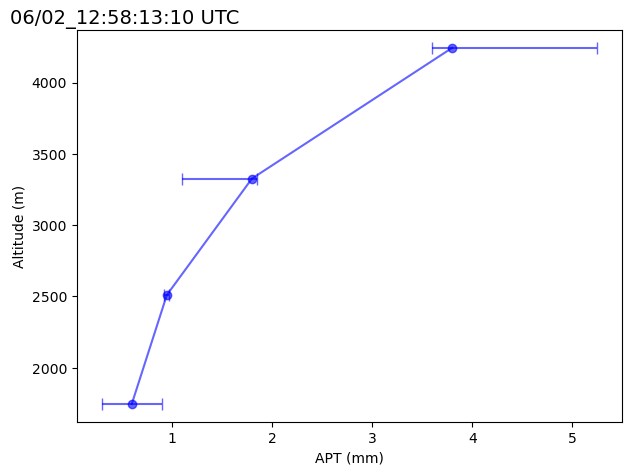

In [73]:
fig, ax = plt.subplots()
ax.errorbar(APT_22_subset_median['rain'], APT_22_subset_median['Altitude_AGL_m'], xerr=[APT_22_subset_25['rain'], APT_22_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/02_12:58:13:10 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


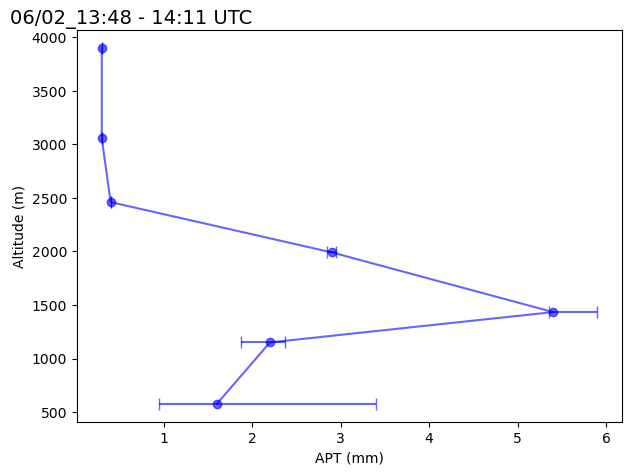

In [74]:
fig, ax = plt.subplots()
ax.errorbar(APT_2_subset_median['rain'], APT_2_subset_median['Altitude_AGL_m'], xerr=[APT_2_subset_25['rain'], APT_2_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/02_13:48 - 14:11 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


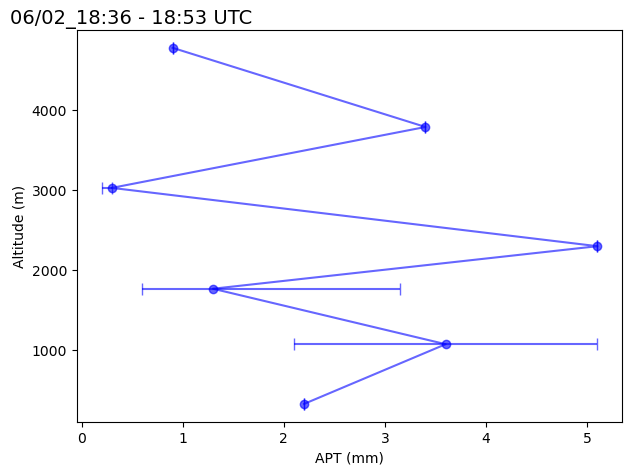

In [75]:
fig, ax = plt.subplots()
ax.errorbar(APT_2b_subset_median['rain'], APT_2b_subset_median['Altitude_AGL_m'], xerr=[APT_2b_subset_25['rain'], APT_2b_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/02_18:36 - 18:53 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


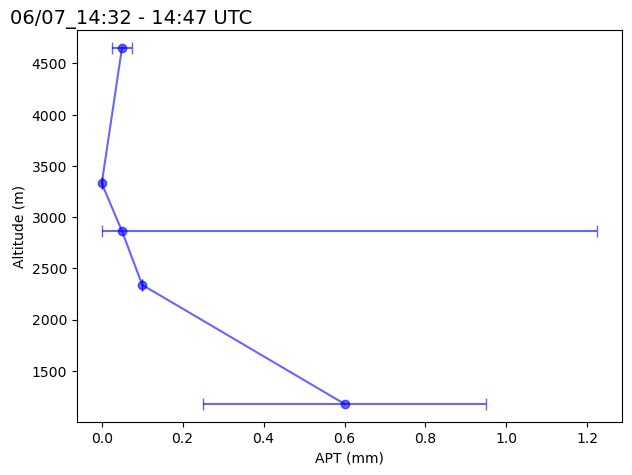

In [76]:
fig, ax = plt.subplots()
ax.errorbar(APT_7_subset_median['rain'], APT_7_subset_median['Altitude_AGL_m'], xerr=[APT_7_subset_25['rain'], APT_7_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/07_14:32 - 14:47 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


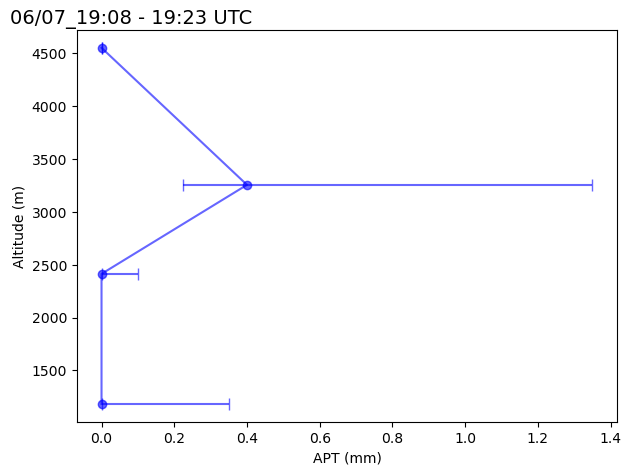

In [77]:
fig, ax = plt.subplots()
ax.errorbar(APT_7b_subset_median['rain'], APT_7b_subset_median['Altitude_AGL_m'], xerr=[APT_7b_subset_25['rain'], APT_7b_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/07_19:08 - 19:23 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


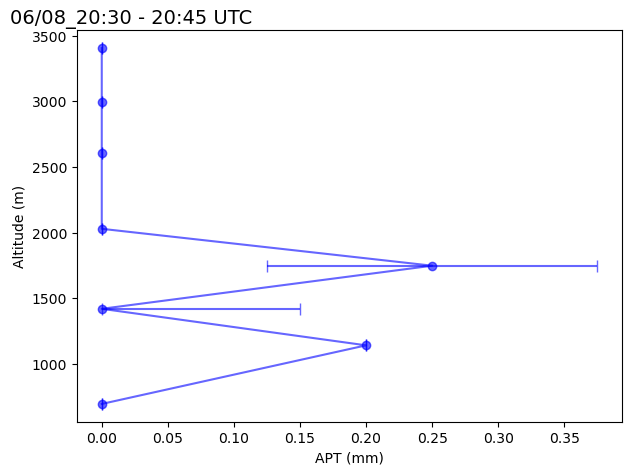

In [78]:
fig, ax = plt.subplots()
ax.errorbar(APT_8_subset_median['rain'], APT_8_subset_median['Altitude_AGL_m'], xerr=[APT_8_subset_25['rain'], APT_8_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/08_20:30 - 20:45 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


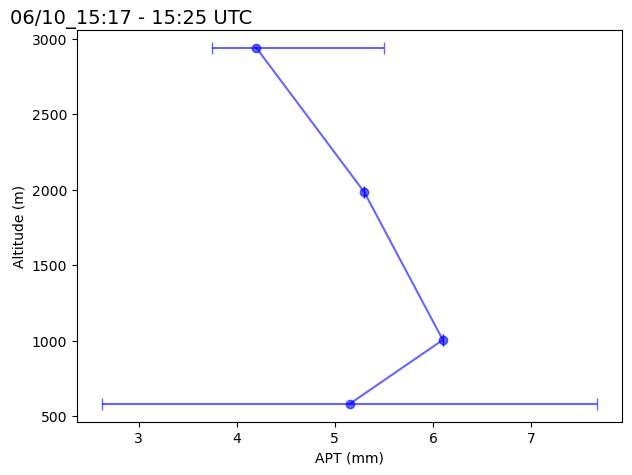

In [79]:
fig, ax = plt.subplots()
ax.errorbar(APT_10_subset_median['rain'], APT_10_subset_median['Altitude_AGL_m'], xerr=[APT_10_subset_25['rain'], APT_10_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/10_15:17 - 15:25 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


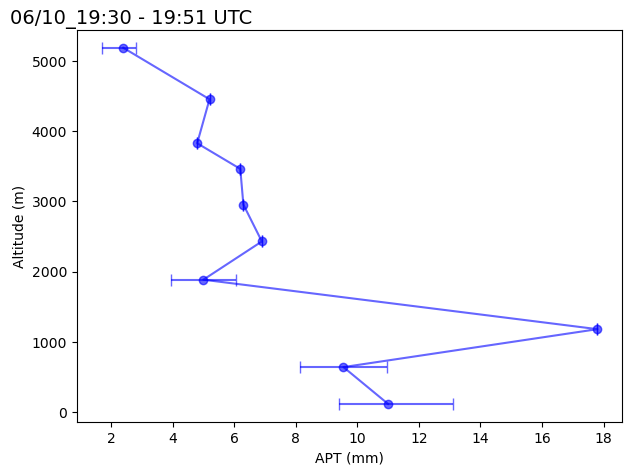

In [80]:
fig, ax = plt.subplots()
ax.errorbar(APT_10b_subset_median['rain'], APT_10b_subset_median['Altitude_AGL_m'], xerr=[APT_10b_subset_25['rain'], APT_10b_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/10_19:30 - 19:51 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


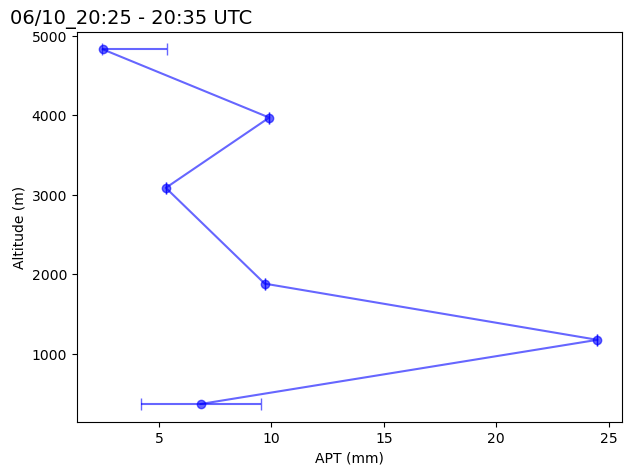

In [81]:
fig, ax = plt.subplots()
ax.errorbar(APT_10c_subset_median['rain'], APT_10c_subset_median['Altitude_AGL_m'], xerr=[APT_10c_subset_25['rain'], APT_10c_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/10_20:25 - 20:35 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


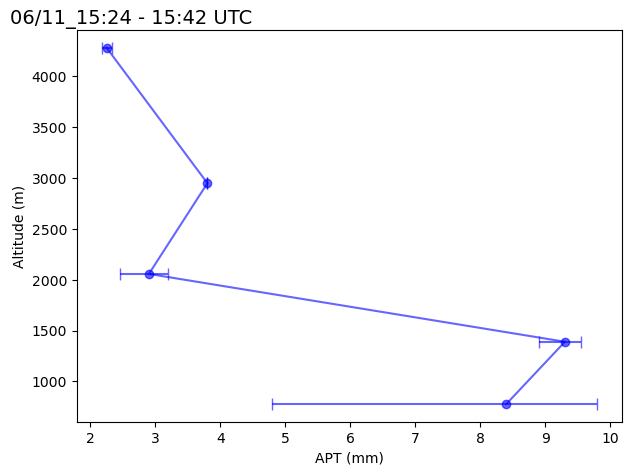

In [82]:
fig, ax = plt.subplots()
ax.errorbar(APT_11_subset_median['rain'], APT_11_subset_median['Altitude_AGL_m'], xerr=[APT_11_subset_25['rain'], APT_11_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/11_15:24 - 15:42 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


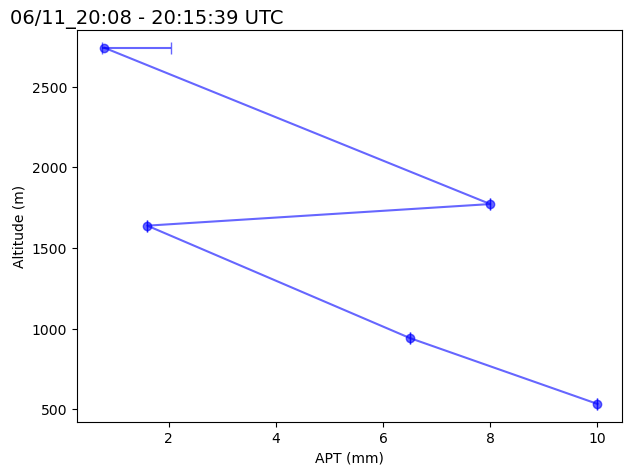

In [83]:
fig, ax = plt.subplots()
ax.errorbar(APT_11b_subset_median['rain'], APT_11b_subset_median['Altitude_AGL_m'], xerr=[APT_11b_subset_25['rain'], APT_11b_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/11_20:08 - 20:15:39 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


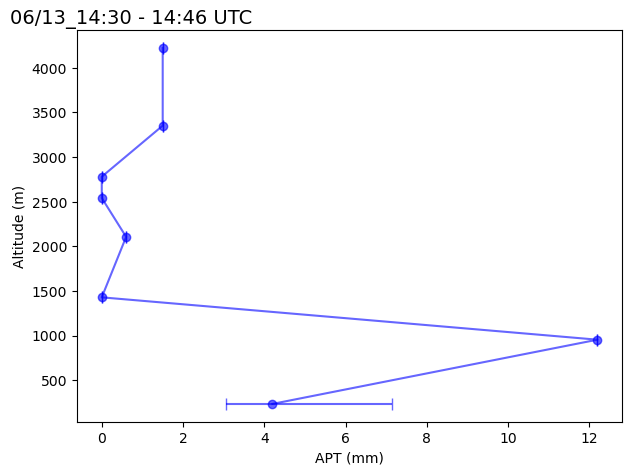

In [84]:
fig, ax = plt.subplots()
ax.errorbar(APT_13_subset_median['rain'], APT_13_subset_median['Altitude_AGL_m'], xerr=[APT_13_subset_25['rain'], APT_13_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/13_14:30 - 14:46 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


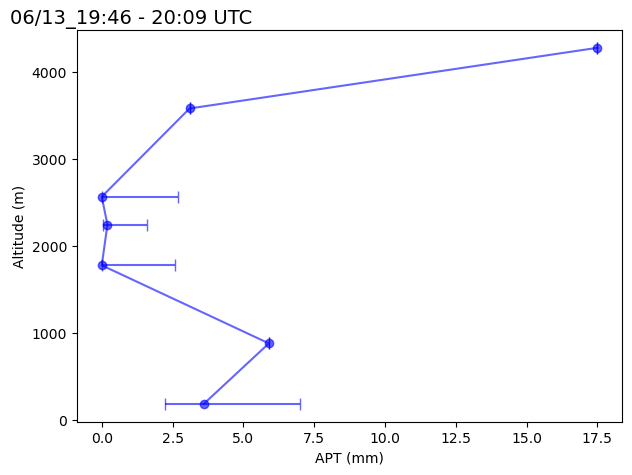

In [85]:
fig, ax = plt.subplots()
ax.errorbar(APT_13b_subset_median['rain'], APT_13b_subset_median['Altitude_AGL_m'], xerr=[APT_13b_subset_25['rain'], APT_13b_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/13_19:46 - 20:09 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


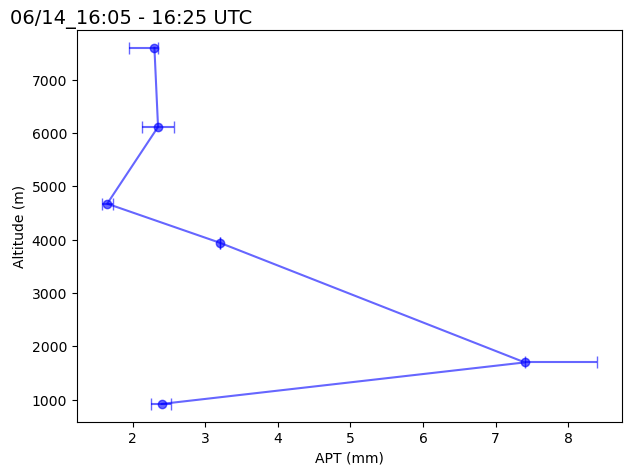

In [86]:
fig, ax = plt.subplots()
ax.errorbar(APT_14_subset_median['rain'], APT_14_subset_median['Altitude_AGL_m'], xerr=[APT_14_subset_25['rain'], APT_14_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/14_16:05 - 16:25 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


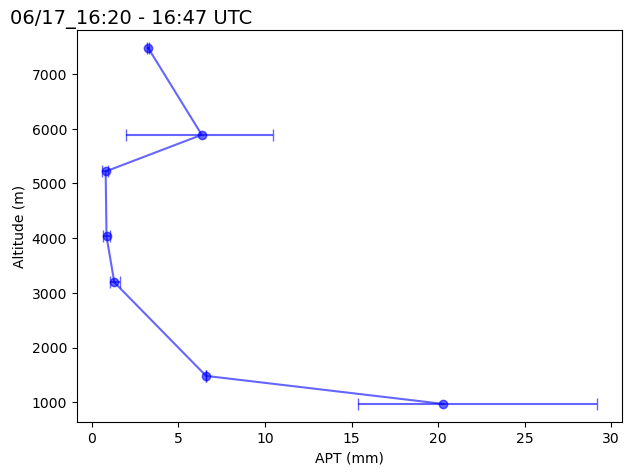

In [87]:
fig, ax = plt.subplots()
ax.errorbar(APT_17_subset_median['rain'], APT_17_subset_median['Altitude_AGL_m'], xerr=[APT_17_subset_25['rain'], APT_17_subset_75['rain']], marker='o', linestyle='-', capsize=4, alpha=.6, color="blue")
ax.set_xlabel('APT (mm)')
ax.set_ylabel('Altitude (m)')
fig.suptitle('')
fig.text(0.02, 0.98, '06/17_16:20 - 16:47 UTC', ha='left', va='top', fontsize=14)
plt.tight_layout()

plt.show()


In [88]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-02 14:10:00"))   
traj_all2_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all2_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-02 13:48:00    32.388    -65.874                 1906.7  \
1       -0.8 2022-06-02 13:48:00    32.375    -66.057                 1906.7   
2       -1.8 2022-06-02 13:48:00    32.355    -66.290                 1906.7   
3       -2.8 2022-06-02 13:48:00    32.332    -66.533                 1906.7   
4       -3.8 2022-06-02 13:48:00    32.309    -66.774                 1906.7   
..       ...                 ...       ...        ...                    ...   
68     -67.2 2022-06-02 14:09:00    34.920    -70.128                 2752.6   
69     -68.2 2022-06-02 14:09:00    34.990    -70.210                 2752.6   
70     -69.2 2022-06-02 14:09:00    35.063    -70.303                 2752.6   
71     -70.2 2022-06-02 14:09:00    35.139    -70.414                 2752.6   
72     -71.2 2022-06-02 14:09:00    35.216    -70.542                 2752.6   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0           1906.7        812.2  303.4  285.9   0.1  672.8  35.9       NaN  \
1           1865.4        816.1  303.2  286.0   0.1  675.3  38.7       NaN   
2           1824.9        820.0  302.9  286.2   0.2  684.1  37.3       NaN   
3           1789.5        823.0  302.6  286.2   0.0  672.0  46.3       NaN   
4           1760.4        825.9  302.2  286.1   0.0  657.4  58.1       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          4460.3        597.4  314.3  271.2   0.0  562.4  28.3       NaN   
69          4460.6        597.4  314.2  271.2   0.0  548.0  29.4       NaN   
70          4475.0        597.2  314.1  271.1   0.0  527.3  29.8       NaN   
71          4517.1        593.8  314.2  270.6   0.0  501.4  30.0       NaN   
72          4582.2        588.6  314.3  270.1   0.0  478.5  30.5       NaN   

    dswf   terr  
0    0.0  487.3  
1    0.0  314.7  
2    0.0   95.4  
3    0.0   61.3  
4    0.0   30.7  
..   ...    ...  
68   0.0  813.1  
69   0.0  847.6  
70   0.0  802.1  
71   0.0  753.8  
72   0.0  704.0  

[1606 rows x 15 columns]

In [89]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-02 12:58:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-02 13:10:00"))   
traj_all2a_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all2a_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-02 12:58:00    32.890    -69.449                  109.7  \
1       -1.0 2022-06-02 12:58:00    32.869    -69.637                  109.7   
2       -2.0 2022-06-02 12:58:00    32.848    -69.839                  109.7   
3       -3.0 2022-06-02 12:58:00    32.826    -70.037                  109.7   
4       -4.0 2022-06-02 12:58:00    32.805    -70.233                  109.7   
..       ...                 ...       ...        ...                    ...   
68     -67.2 2022-06-02 13:09:00    34.324    -69.893                 3810.8   
69     -68.2 2022-06-02 13:09:00    34.361    -69.971                 3810.8   
70     -69.2 2022-06-02 13:09:00    34.399    -70.049                 3810.8   
71     -70.2 2022-06-02 13:09:00    34.438    -70.129                 3810.8   
72     -71.2 2022-06-02 13:09:00    34.484    -70.208                 3810.8   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            109.7       1001.4  296.5  296.6   0.0  677.1  78.3       NaN  \
1            111.4       1001.7  296.4  296.6   0.0  705.1  78.4       NaN   
2            113.2       1000.5  296.4  296.5   0.0  726.1  78.1       NaN   
3            114.6        999.5  296.5  296.4   0.0  734.9  78.0       NaN   
4            115.1        998.5  296.5  296.4   0.0  745.7  77.9       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          4901.0        565.1  316.1  268.4   0.0  486.4  14.7       NaN   
69          4868.7        566.4  316.1  268.6   0.0  460.0  14.3       NaN   
70          4816.9        570.4  315.9  269.0   0.0  440.3  13.4       NaN   
71          4764.5        575.0  315.7  269.5   0.0  422.0  12.1       NaN   
72          4751.8        577.8  315.5  269.7   0.0  391.6  11.3       NaN   

    dswf   terr  
0    0.0  278.0  
1    0.0   76.9  
2    0.0   50.7  
3    0.0   25.3  
4    0.0    0.0  
..   ...    ...  
68   0.0  835.3  
69   0.0  786.4  
70   0.0  735.6  
71   0.0  681.8  
72   0.0  474.1  

[876 rows x 15 columns]

In [90]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-02 18:53:00"))
traj_all2b_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all2b_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-02 18:36:00    32.296    -65.033                  168.5  \
1       -0.6 2022-06-02 18:36:00    32.212    -65.164                  168.5   
2       -1.6 2022-06-02 18:36:00    32.083    -65.357                  168.5   
3       -2.6 2022-06-02 18:36:00    31.966    -65.520                  168.5   
4       -3.6 2022-06-02 18:36:00    31.867    -65.669                  168.5   
..       ...                 ...       ...        ...                    ...   
68     -67.9 2022-06-02 18:52:00    32.285    -67.328                 3531.0   
69     -68.9 2022-06-02 18:52:00    32.371    -67.311                 3531.0   
70     -69.9 2022-06-02 18:52:00    32.469    -67.314                 3531.0   
71     -70.9 2022-06-02 18:52:00    32.571    -67.336                 3531.0   
72     -71.9 2022-06-02 18:52:00    32.665    -67.371                 3531.0   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            168.5        993.9  296.5  296.0   0.0  683.1  81.9       NaN  \
1            153.4        996.0  296.5  296.1   0.0  671.6  81.3       NaN   
2            148.5        997.3  296.4  296.2   0.0  659.5  79.8       NaN   
3            159.1        996.1  296.3  296.0   0.0  656.4  80.6       NaN   
4            162.0        995.6  296.2  295.9   0.0  660.6  80.9       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          5304.0        535.0  317.8  265.7   0.0  532.9  26.4       NaN   
69          5335.5        532.1  317.9  265.4   0.0  472.0  27.7       NaN   
70          5288.9        534.9  317.6  265.6   0.0  423.0  31.4       NaN   
71          5220.5        544.3  317.1  266.5   0.0  465.2  28.9       NaN   
72          5201.5        544.9  317.1  266.5   0.2  473.6  28.2       NaN   

    dswf   terr  
0    0.0  838.5  
1    0.0  872.0  
2    0.0  831.2  
3    0.0  791.5  
4    0.0  753.4  
..   ...    ...  
68   0.0  444.6  
69   0.0  522.5  
70   0.0  598.9  
71   0.0  681.9  
72   0.0  762.2  

[1241 rows x 15 columns]

In [91]:
start_index= np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-03 14:30:00"))
stop_index= np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-03 15:00:00"))    
traj_all3_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all3_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-03 14:30:00    34.171    -67.302                 1564.3  \
1       -0.5 2022-06-03 14:30:00    34.146    -67.334                 1564.3   
2       -1.5 2022-06-03 14:30:00    34.093    -67.393                 1564.3   
3       -2.5 2022-06-03 14:30:00    34.038    -67.455                 1564.3   
4       -3.5 2022-06-03 14:30:00    33.989    -67.541                 1564.3   
..       ...                 ...       ...        ...                    ...   
68     -68.0 2022-06-03 14:59:00    25.258    -63.463                 2600.7   
69     -69.0 2022-06-03 14:59:00    25.196    -63.339                 2600.7   
70     -70.0 2022-06-03 14:59:00    25.135    -63.204                 2600.7   
71     -71.0 2022-06-03 14:59:00    25.088    -63.057                 2600.7   
72     -72.0 2022-06-03 14:59:00    25.053    -62.896                 2600.7   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0           1564.3        843.6  302.9  288.5   0.0  559.8  37.0       NaN  \
1           1560.0        843.9  302.9  288.5   0.0  560.9  37.7       NaN   
2           1494.8        846.5  302.8  288.7   0.0  553.7  37.4       NaN   
3           1337.2        860.7  302.4  289.7   0.0  536.2  36.5       NaN   
4           1173.3        887.8  301.1  291.1   0.0  549.8  42.7       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          1301.0        875.9  300.3  289.1   0.0  654.3  79.7       NaN   
69          1292.6        876.9  300.2  289.2   0.0  698.3  79.4       NaN   
70          1301.4        875.1  300.3  289.0   0.0  717.2  78.8       NaN   
71          1303.3        874.8  300.2  288.9   0.0  741.2  79.2       NaN   
72          1297.8        876.9  299.9  288.9   0.0  728.9  80.0       NaN   

    dswf   terr  
0    0.0  625.6  
1    0.0  522.2  
2    0.0  307.8  
3    0.0   92.7  
4    0.0   61.3  
..   ...    ...  
68   0.0  783.0  
69   0.0  866.9  
70   0.0  828.5  
71   0.0  795.1  
72   0.0  765.0  

[2190 rows x 15 columns]

In [92]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-07 14:47:00"))   
traj_all7_subset =traj_all[start_index[0][0]:stop_index[0][0]]
traj_all7_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-07 14:32:00    32.226    -64.980                  197.8  \
1       -0.5 2022-06-07 14:32:00    32.310    -64.905                  197.8   
2       -1.5 2022-06-07 14:32:00    32.480    -64.779                  197.8   
3       -2.5 2022-06-07 14:32:00    32.679    -64.668                  197.8   
4       -3.5 2022-06-07 14:32:00    32.896    -64.585                  197.8   
..       ...                 ...       ...        ...                    ...   
68     -67.8 2022-06-07 14:46:00    39.402    -92.433                 2663.1   
69     -68.8 2022-06-07 14:46:00    39.239    -92.730                 2663.1   
70     -69.8 2022-06-07 14:46:00    39.084    -92.995                 2663.1   
71     -70.8 2022-06-07 14:46:00    38.938    -93.254                 2663.1   
72     -71.8 2022-06-07 14:46:00    38.806    -93.509                 2663.1   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain    mixd  relh  sphumixr   
0            197.8        997.6  293.4  293.2   0.0   996.3  68.7       NaN  \
1            203.5        996.6  293.5  293.2   0.0  1037.0  67.4       NaN   
2            205.0        994.7  293.3  292.9   0.0  1088.9  66.8       NaN   
3            202.2        995.4  293.1  292.7   0.0  1067.2  68.7       NaN   
4            211.5        993.7  293.1  292.6   0.0  1121.3  65.9       NaN   
..             ...          ...    ...    ...   ...     ...   ...       ...   
68          4164.8        595.1  311.4  268.4   0.0  1502.9  59.3       NaN   
69          4190.4        593.5  311.4  268.2   0.0  1424.7  61.6       NaN   
70          4215.4        593.2  311.4  268.2   0.0  1140.6  60.7       NaN   
71          4253.9        587.5  311.6  267.7   0.0   780.0  62.8       NaN   
72          4252.4        587.7  311.6  267.7   0.0   426.0  63.5       NaN   

     dswf   terr  
0     0.0  539.9  
1     0.0  448.9  
2     0.0  272.6  
3     0.0   74.1  
4     0.0   56.4  
..    ...    ...  
68  247.4  669.8  
69  217.8  632.3  
70  215.4  561.0  
71  223.3  491.4  
72  240.5  429.9  

[1095 rows x 15 columns]

In [93]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-07 19:23:00"))
    
traj_all7b_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all7b_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-07 19:08:00    32.262    -64.981                  211.8  \
1       -0.1 2022-06-07 19:08:00    32.265    -64.955                  211.8   
2       -1.1 2022-06-07 19:08:00    32.301    -64.758                  211.8   
3       -2.1 2022-06-07 19:08:00    32.367    -64.569                  211.8   
4       -3.1 2022-06-07 19:08:00    32.471    -64.400                  211.8   
..       ...                 ...       ...        ...                    ...   
68     -67.4 2022-06-07 19:22:00    39.909    -90.628                 3356.8   
69     -68.4 2022-06-07 19:22:00    39.800    -91.064                 3356.8   
70     -69.4 2022-06-07 19:22:00    39.650    -91.452                 3356.8   
71     -70.4 2022-06-07 19:22:00    39.486    -91.854                 3356.8   
72     -71.4 2022-06-07 19:22:00    39.304    -92.238                 3356.8   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain    mixd  relh  sphumixr   
0            211.8        996.7  293.2  292.9   0.0  1120.3  64.9       NaN  \
1            211.8        996.6  293.2  292.9   0.0  1118.9  64.8       NaN   
2            210.2        995.9  293.1  292.7   0.0  1104.9  63.9       NaN   
3            209.9        997.1  293.0  292.8   0.0  1105.0  64.5       NaN   
4            216.1        996.3  292.9  292.6   0.0  1135.2  64.0       NaN   
..             ...          ...    ...    ...   ...     ...   ...       ...   
68          5008.6        536.1  313.5  262.3   0.0    18.3  63.7       NaN   
69          4995.6        535.2  313.4  262.1   0.0   681.2  64.6       NaN   
70          4992.0        537.1  313.7  262.6   0.0  1322.7  56.1       NaN   
71          5012.4        533.1  314.3  262.6   0.0  1735.3  50.8       NaN   
72          4937.2        537.4  313.6  262.6   0.0  1264.8  57.8       NaN   

     dswf   terr  
0     0.0  737.5  
1     0.0  743.4  
2     0.0  802.1  
3     0.0  743.8  
4     0.0  705.9  
..    ...    ...  
68  167.8  508.8  
69  208.9  640.2  
70  193.8  697.5  
71  217.2  755.5  
72  247.1  680.6  

[1095 rows x 15 columns]

In [94]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-08 20:45:00"))
    
traj_all8_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all8_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-08 20:30:00    32.291    -65.023                  157.5  \
1       -0.5 2022-06-08 20:30:00    32.196    -64.926                  157.5   
2       -1.5 2022-06-08 20:30:00    32.032    -64.723                  157.5   
3       -2.5 2022-06-08 20:30:00    31.903    -64.512                  157.5   
4       -3.5 2022-06-08 20:30:00    31.803    -64.292                  157.5   
..       ...                 ...       ...        ...                    ...   
68     -67.7 2022-06-08 20:44:00    34.487    -76.496                 3618.7   
69     -68.7 2022-06-08 20:44:00    34.675    -76.567                 3618.7   
70     -69.7 2022-06-08 20:44:00    34.860    -76.620                 3618.7   
71     -70.7 2022-06-08 20:44:00    35.045    -76.675                 3618.7   
72     -71.7 2022-06-08 20:44:00    35.232    -76.742                 3618.7   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain    mixd  relh  sphumixr   
0            157.5       1001.8  293.5  293.6   0.0  1131.1  67.1       NaN  \
1            157.3       1001.8  293.5  293.6   0.0  1122.9  67.0       NaN   
2            167.0       1001.0  293.4  293.5   0.0  1114.9  67.4       NaN   
3            183.7        998.4  293.3  293.2   0.0  1104.0  67.7       NaN   
4            191.3        998.3  293.2  293.0   0.0  1091.5  67.5       NaN   
..             ...          ...    ...    ...   ...     ...   ...       ...   
68          3364.4        675.0  311.0  277.9   0.0  1231.8  11.1       NaN   
69          3364.8        676.9  310.9  278.1   0.0   969.5   8.0       NaN   
70          3353.2        677.5  310.6  277.9   0.0   955.2   8.1       NaN   
71          3329.8        679.0  310.3  277.8   0.0  1198.3  10.3       NaN   
72          3290.4        681.8  310.0  277.8   0.0  1809.5   9.5       NaN   

    dswf   terr  
0    0.0  732.8  
1    0.0  745.9  
2    0.0  767.5  
3    0.0  810.8  
4    0.0  771.2  
..   ...    ...  
68   0.0  362.7  
69   0.0  550.2  
70   0.0  641.7  
71   2.9  734.0  
72  21.0  824.0  

[1095 rows x 15 columns]

In [95]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-10 15:25:00"))   
traj_all10_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all10_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-10 15:17:00    32.240    -65.003                  135.1  \
1       -0.3 2022-06-10 15:17:00    32.163    -65.010                  135.1   
2       -1.3 2022-06-10 15:17:00    31.896    -65.020                  135.1   
3       -2.3 2022-06-10 15:17:00    31.634    -65.013                  135.1   
4       -3.3 2022-06-10 15:17:00    31.379    -64.987                  135.1   
..       ...                 ...       ...        ...                    ...   
68     -67.4 2022-06-10 15:24:00    29.914    -73.800                 3349.5   
69     -68.4 2022-06-10 15:24:00    29.836    -73.900                 3349.5   
70     -69.4 2022-06-10 15:24:00    29.755    -74.010                 3349.5   
71     -70.4 2022-06-10 15:24:00    29.673    -74.126                 3349.5   
72     -71.4 2022-06-10 15:24:00    29.589    -74.243                 3349.5   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            135.1       1001.9  295.8  296.0   0.0  426.6  86.7       NaN  \
1            131.2       1002.4  295.8  296.0   0.0  409.9  86.7       NaN   
2            119.4       1003.6  295.8  296.1   0.0  365.4  85.3       NaN   
3            106.8       1005.1  295.9  296.3   0.0  359.9  83.5       NaN   
4             93.7       1006.4  295.9  296.4   0.0  360.0  82.4       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          2460.3        761.9  307.4  284.4   0.0  471.1  72.1       NaN   
69          2455.1        761.5  307.4  284.4   0.0  513.3  70.8       NaN   
70          2445.3        764.8  307.4  284.7   0.0  591.6  69.0       NaN   
71          2433.9        764.1  307.3  284.5   0.3  578.6  68.8       NaN   
72          2416.2        767.5  307.1  284.7   0.0  584.4  68.8       NaN   

    dswf   terr  
0    0.0  746.3  
1    0.0  736.0  
2    0.0  522.7  
3    0.0  310.5  
4    0.0   96.1  
..   ...    ...  
68   0.0  713.8  
69   0.0  729.6  
70   0.0  740.7  
71   0.0  686.3  
72   0.0  631.5  

[584 rows x 15 columns]

In [96]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-10 19:51:00"))    
traj_all110b_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all110b_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-10 19:30:00    31.650    -65.639                  117.2  \
1       -0.5 2022-06-10 19:30:00    31.577    -65.682                  117.2   
2       -1.5 2022-06-10 19:30:00    31.427    -65.771                  117.2   
3       -2.5 2022-06-10 19:30:00    31.277    -65.851                  117.2   
4       -3.5 2022-06-10 19:30:00    31.128    -65.915                  117.2   
..       ...                 ...       ...        ...                    ...   
68     -67.8 2022-06-10 19:50:00    31.333    -74.505                 4947.0   
69     -68.8 2022-06-10 19:50:00    31.365    -74.697                 4947.0   
70     -69.8 2022-06-10 19:50:00    31.383    -74.898                 4947.0   
71     -70.8 2022-06-10 19:50:00    31.382    -75.112                 4947.0   
72     -71.8 2022-06-10 19:50:00    31.365    -75.332                 4947.0   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            117.2       1003.2  296.6  296.8   0.0  323.7  84.1       NaN  \
1            116.8       1003.2  296.5  296.8   0.0  350.1  84.6       NaN   
2            116.6       1003.2  296.5  296.8   0.0  406.8  85.4       NaN   
3            117.6       1003.5  296.5  296.8   0.0  398.8  85.4       NaN   
4            118.4       1003.6  296.4  296.7   0.0  368.4  85.4       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          4754.1        575.0  317.1  270.6   0.3  569.2  46.6       NaN   
69          4739.3        574.7  316.8  270.4   0.2  503.9  51.8       NaN   
70          4704.6        578.6  316.3  270.5   0.1  438.9  58.1       NaN   
71          4698.1        578.1  316.2  270.3   0.1  401.1  58.9       NaN   
72          4682.0        579.8  315.9  270.3   0.5  503.4  62.8       NaN   

    dswf   terr  
0    0.0  773.0  
1    0.0  797.6  
2    0.0  848.0  
3    0.0  809.6  
4    0.0  769.8  
..   ...    ...  
68   0.0  504.0  
69   0.0  594.4  
70   0.0  686.9  
71   0.0  779.6  
72   0.0  784.1  

[1533 rows x 15 columns]

In [97]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-10 20:35:00"))    
traj_all10b_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all10b_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-10 20:25:00    31.227    -65.872                  124.5  \
1       -0.4 2022-06-10 20:25:00    31.177    -65.918                  124.5   
2       -1.4 2022-06-10 20:25:00    31.055    -66.023                  124.5   
3       -2.4 2022-06-10 20:25:00    30.934    -66.128                  124.5   
4       -3.4 2022-06-10 20:25:00    30.815    -66.230                  124.5   
..       ...                 ...       ...        ...                    ...   
68     -67.6 2022-06-10 20:34:00    27.689    -73.104                 4926.1   
69     -68.6 2022-06-10 20:34:00    27.443    -73.247                 4926.1   
70     -69.6 2022-06-10 20:34:00    27.207    -73.369                 4926.1   
71     -70.6 2022-06-10 20:34:00    27.017    -73.504                 4926.1   
72     -71.6 2022-06-10 20:34:00    26.780    -73.617                 4926.1   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            124.5       1002.4  296.8  297.0   0.0  406.8  83.9       NaN  \
1            125.2       1002.4  296.8  297.0   0.0  419.9  83.9       NaN   
2            129.7       1002.0  296.8  297.0   0.0  436.7  83.7       NaN   
3            138.9       1001.1  296.9  296.9   0.0  444.1  83.5       NaN   
4            147.6        999.8  296.7  296.7   0.0  402.6  84.4       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          3417.5        679.7  310.6  278.1   0.4  295.6  94.9       NaN   
69          3359.4        681.3  310.6  278.3   0.7  220.7  92.3       NaN   
70          3280.2        692.5  309.9  279.0   0.4  320.1  93.2       NaN   
71          3283.2        689.0  310.0  278.7   0.0  320.3  96.6       NaN   
72          3320.7        689.2  309.9  278.6   0.4  320.5  95.7       NaN   

    dswf   terr  
0    0.0  726.4  
1    0.0  746.7  
2    0.0  797.6  
3    0.0  848.0  
4    0.0  808.0  
..   ...    ...  
68   0.0  155.3  
69   0.0  176.1  
70   0.0  131.4  
71   0.0  110.7  
72   0.0  101.5  

[730 rows x 15 columns]

In [98]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-11 15:42:00"))   
traj_all11_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all11_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-11 15:24:00    32.208    -64.981                  139.3  \
1       -0.4 2022-06-11 15:24:00    32.120    -65.027                  139.3   
2       -1.4 2022-06-11 15:24:00    31.907    -65.135                  139.3   
3       -2.4 2022-06-11 15:24:00    31.705    -65.231                  139.3   
4       -3.4 2022-06-11 15:24:00    31.513    -65.309                  139.3   
..       ...                 ...       ...        ...                    ...   
68     -67.7 2022-06-11 15:41:00    29.588    -71.266                 4512.1   
69     -68.7 2022-06-11 15:41:00    29.597    -71.430                 4512.1   
70     -69.7 2022-06-11 15:41:00    29.594    -71.596                 4512.1   
71     -70.7 2022-06-11 15:41:00    29.590    -71.763                 4512.1   
72     -71.7 2022-06-11 15:41:00    29.588    -71.917                 4512.1   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            139.3       1003.5  296.2  296.5   0.0  302.1  84.8       NaN  \
1            145.7       1002.6  296.3  296.5   0.0  298.6  84.6       NaN   
2            155.6       1001.7  296.3  296.4   0.0  271.7  84.1       NaN   
3            156.9       1001.9  296.3  296.4   0.0  244.8  83.8       NaN   
4            146.5       1003.4  296.2  296.5   0.0  217.9  83.5       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          3404.1        681.8  310.4  278.2   0.2  280.3  81.4       NaN   
69          3349.8        681.2  310.5  278.2   0.2  336.4  82.2       NaN   
70          3253.4        692.1  309.9  278.9   0.3  406.1  79.3       NaN   
71          3188.5        701.6  309.3  279.5   0.1  429.4  79.8       NaN   
72          3137.2        701.2  309.4  279.5   0.2  461.4  80.2       NaN   

    dswf   terr  
0    0.0  758.3  
1    0.0  743.1  
2    0.0  525.1  
3    0.0  309.5  
4    0.0   96.0  
..   ...    ...  
68   0.0  773.3  
69   0.0  794.7  
70   0.0  815.0  
71   0.0  761.3  
72   0.0  675.8  

[1314 rows x 15 columns]

In [99]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-11 20:00:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-11 20:30:00")) 
traj_all11b_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all11b_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-11 20:00:00    30.880    -64.218                  129.6  \
1       -1.0 2022-06-11 20:00:00    30.728    -64.236                  129.6   
2       -2.0 2022-06-11 20:00:00    30.579    -64.260                  129.6   
3       -3.0 2022-06-11 20:00:00    30.427    -64.285                  129.6   
4       -4.0 2022-06-11 20:00:00    30.262    -64.299                  129.6   
..       ...                 ...       ...        ...                    ...   
68     -67.5 2022-06-11 20:29:00    26.627    -76.719                 3286.7   
69     -68.5 2022-06-11 20:29:00    26.643    -76.856                 3286.7   
70     -69.5 2022-06-11 20:29:00    26.660    -77.008                 3286.7   
71     -70.5 2022-06-11 20:29:00    26.668    -77.174                 3286.7   
72     -71.5 2022-06-11 20:29:00    26.672    -77.342                 3286.7   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            129.6       1005.0  296.5  297.0   0.0  521.2  83.6       NaN  \
1            119.5       1006.5  296.5  297.1   0.1  546.4  82.7       NaN   
2            110.8       1008.0  296.6  297.3   0.2  559.6  81.7       NaN   
3            106.0       1009.0  296.6  297.4   0.1  535.0  80.5       NaN   
4            104.9       1009.2  296.6  297.4   0.1  527.2  80.4       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          2708.3        741.8  308.2  283.0   0.0  184.4  71.2       NaN   
69          2709.2        740.0  308.4  282.9   0.0  215.7  68.8       NaN   
70          2665.3        741.6  308.2  283.0   0.4  304.8  71.7       NaN   
71          2573.4        752.1  307.7  283.6   0.1  489.1  73.3       NaN   
72          2488.6        762.1  307.4  284.4   0.0  617.5  73.1       NaN   

    dswf   terr  
0    0.0  725.3  
1    0.0  781.5  
2    0.0  824.3  
3    0.0  774.4  
4    0.0  724.3  
..   ...    ...  
68   0.0  346.7  
69   0.0  523.4  
70   0.0  618.7  
71   0.0  710.5  
72   0.0  804.5  

[2190 rows x 15 columns]

In [100]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-13 14:46:00"))   
traj_all13_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all13_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-13 14:30:00    32.214    -65.022                  139.6  \
1       -0.5 2022-06-13 14:30:00    32.147    -65.014                  139.6   
2       -1.5 2022-06-13 14:30:00    32.019    -64.985                  139.6   
3       -2.5 2022-06-13 14:30:00    31.899    -64.939                  139.6   
4       -3.5 2022-06-13 14:30:00    31.783    -64.884                  139.6   
..       ...                 ...       ...        ...                    ...   
68     -67.8 2022-06-13 14:45:00    22.965    -75.600                 4243.1   
69     -68.8 2022-06-13 14:45:00    22.810    -75.668                 4243.1   
70     -69.8 2022-06-13 14:45:00    22.667    -75.730                 4243.1   
71     -70.8 2022-06-13 14:45:00    22.533    -75.778                 4243.1   
72     -71.8 2022-06-13 14:45:00    22.409    -75.816                 4243.1   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            139.6       1007.5  295.8  296.4   0.0  435.3  89.7       NaN  \
1            135.7       1008.0  295.8  296.5   0.0  439.7  89.4       NaN   
2            134.7       1008.6  295.8  296.5   0.0  432.8  89.0       NaN   
3            139.2       1008.0  295.7  296.4   0.0  412.4  89.5       NaN   
4            144.8       1006.5  295.7  296.3   0.0  391.4  89.9       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          4327.9        607.0  315.0  273.1   0.0  666.5  76.4       NaN   
69          4334.8        605.8  315.0  272.9   0.0  693.7  76.9       NaN   
70          4334.1        606.5  314.9  272.9   0.0  762.4  74.2       NaN   
71          4329.7        606.8  314.9  273.0   0.0  796.0  71.5       NaN   
72          4318.8        607.7  314.9  273.1   0.0  783.6  69.7       NaN   

    dswf   terr  
0    0.0  625.3  
1    0.0  525.3  
2    0.0  314.3  
3    0.0   97.4  
4    0.0   63.1  
..   ...    ...  
68   0.0  784.9  
69   0.0  784.6  
70   0.0  726.0  
71   0.0  667.1  
72   0.0  605.9  

[1168 rows x 15 columns]

In [101]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-13 20:09:00")) 
traj_all13b_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all13b_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-13 19:46:00    32.232    -64.983                  136.4  \
1       -0.8 2022-06-13 19:46:00    32.123    -65.033                  136.4   
2       -1.8 2022-06-13 19:46:00    31.983    -65.074                  136.4   
3       -2.8 2022-06-13 19:46:00    31.848    -65.092                  136.4   
4       -3.8 2022-06-13 19:46:00    31.716    -65.089                  136.4   
..       ...                 ...       ...        ...                    ...   
68     -67.1 2022-06-13 20:08:00    22.508    -76.827                 4372.2   
69     -68.1 2022-06-13 20:08:00    22.384    -76.822                 4372.2   
70     -69.1 2022-06-13 20:08:00    22.251    -76.812                 4372.2   
71     -70.1 2022-06-13 20:08:00    22.099    -76.810                 4372.2   
72     -71.1 2022-06-13 20:08:00    21.941    -76.812                 4372.2   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain   mixd  relh  sphumixr   
0            136.4       1006.3  296.5  297.0   0.0  544.9  88.2       NaN  \
1            131.7       1006.8  296.5  297.1   0.0  529.2  87.4       NaN   
2            135.8       1006.8  296.5  297.1   0.0  502.7  86.8       NaN   
3            139.1       1005.5  296.4  296.9   0.0  496.5  87.4       NaN   
4            130.9       1007.4  296.3  297.0   0.0  504.5  86.6       NaN   
..             ...          ...    ...    ...   ...    ...   ...       ...   
68          4233.7        617.7  314.9  274.4   0.0  659.3  62.0       NaN   
69          4254.2        615.5  315.0  274.2   0.0  646.2  59.8       NaN   
70          4296.4        609.3  315.5  273.8   0.0  617.3  60.0       NaN   
71          4326.9        605.5  316.1  273.9   0.0  581.1  59.6       NaN   
72          4335.3        605.2  316.5  274.2   0.0  564.8  56.4       NaN   

    dswf   terr  
0    0.0  739.3  
1    0.0  782.3  
2    0.0  847.4  
3    0.0  811.9  
4    0.0  775.5  
..   ...    ...  
68   0.0  346.7  
69   0.0  520.0  
70   0.0  613.3  
71   0.0  706.7  
72   0.0  800.0  

[1679 rows x 15 columns]

In [102]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-14 16:25:00"))
traj_all14_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all14_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-14 16:05:00    30.639    -64.423                  180.6  \
1       -0.1 2022-06-14 16:05:00    30.630    -64.433                  180.6   
2       -1.1 2022-06-14 16:05:00    30.515    -64.552                  180.6   
3       -2.1 2022-06-14 16:05:00    30.398    -64.658                  180.6   
4       -3.1 2022-06-14 16:05:00    30.277    -64.742                  180.6   
..       ...                 ...       ...        ...                    ...   
68     -67.4 2022-06-14 16:24:00    24.096    -51.523                 8311.7   
69     -68.4 2022-06-14 16:24:00    24.018    -51.104                 8311.7   
70     -69.4 2022-06-14 16:24:00    23.985    -50.664                 8311.7   
71     -70.4 2022-06-14 16:24:00    23.998    -50.234                 8311.7   
72     -71.4 2022-06-14 16:24:00    24.048    -49.812                 8311.7   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain    mixd  relh  sphumixr   
0            180.6       1000.4  296.9  297.0   0.1   600.1  81.5       NaN  \
1            179.5       1000.6  297.0  297.0   0.1   600.2  81.5       NaN   
2            169.3       1001.7  297.0  297.2   0.1   652.1  81.3       NaN   
3            162.7       1002.6  297.0  297.2   0.2   651.9  80.9       NaN   
4            154.1       1003.5  297.0  297.3   0.0   658.5  81.0       NaN   
..             ...          ...    ...    ...   ...     ...   ...       ...   
68          9636.8        299.1  332.1  235.1   0.0  1162.6  12.9       NaN   
69          9558.8        303.3  331.7  235.8   0.0  1135.2  13.1       NaN   
70          9539.0        303.6  331.6  235.8   0.0  1159.3  13.2       NaN   
71          9450.3        307.8  331.9  236.9   0.0  1032.4  11.6       NaN   
72          9431.7        308.9  331.5  236.9   0.0  1173.5  12.7       NaN   

    dswf   terr  
0    0.0  772.3  
1    0.0  769.9  
2    0.0  730.1  
3    0.0  510.4  
4    0.0  291.6  
..   ...    ...  
68   0.0  520.3  
69   0.0  577.6  
70   0.0  569.0  
71   0.0  604.7  
72   0.0  626.3  

[1460 rows x 15 columns]

In [103]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-17 16:47:00")) 
traj_all17_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all17_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-17 16:20:00    32.214    -64.980                  129.7  \
1       -0.3 2022-06-17 16:20:00    32.205    -64.930                  129.7   
2       -1.3 2022-06-17 16:20:00    32.186    -64.770                  129.7   
3       -2.3 2022-06-17 16:20:00    32.186    -64.602                  129.7   
4       -3.3 2022-06-17 16:20:00    32.209    -64.436                  129.7   
..       ...                 ...       ...        ...                    ...   
68     -67.8 2022-06-17 16:46:00    35.163    -98.736                 7473.1   
69     -68.8 2022-06-17 16:46:00    34.829    -99.037                 7473.1   
70     -69.8 2022-06-17 16:46:00    34.506    -99.296                 7473.1   
71     -70.8 2022-06-17 16:46:00    34.190    -99.505                 7473.1   
72     -71.8 2022-06-17 16:46:00    33.858    -99.662                 7473.1   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain    mixd  relh  sphumixr   
0            129.7       1001.6  293.8  293.9   0.0   858.1  69.2       NaN  \
1            133.7       1001.4  293.8  293.9   0.0   865.9  69.5       NaN   
2            147.1       1000.6  293.5  293.6   0.0   901.1  70.1       NaN   
3            158.0        998.6  293.5  293.4   0.0   903.8  71.4       NaN   
4            163.8        998.0  293.5  293.3   0.0   923.7  71.5       NaN   
..             ...          ...    ...    ...   ...     ...   ...       ...   
68          8088.2        350.9  331.8  245.9   0.0  2172.6  49.5       NaN   
69          8051.1        353.4  331.7  246.4   0.0  2119.5  56.1       NaN   
70          8065.7        355.0  331.5  246.5   0.0  2037.9  55.5       NaN   
71          8056.9        354.3  331.7  246.5   0.0  1827.4  43.2       NaN   
72          8001.1        356.6  332.1  247.3   0.0  1671.7  46.9       NaN   

     dswf   terr  
0     0.0  818.5  
1     0.0  805.1  
2     0.0  762.5  
3     0.0  548.2  
4     0.0  328.6  
..    ...    ...  
68  439.4  935.8  
69  451.1  826.3  
70  414.0  704.0  
71  432.4  584.0  
72  428.2  498.7  

[1971 rows x 15 columns]

In [104]:
start_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-18 14:09:00"))
stop_index = np.where(traj_all["Launch_UTC"]==pd.to_datetime("2022-06-18 14:33:00"))    
traj_all18_subset = traj_all[start_index[0][0]:stop_index[0][0]]
traj_all18_subset

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-18 14:09:00    36.615    -71.990                  133.2  \
1       -0.2 2022-06-18 14:09:00    36.643    -72.028                  133.2   
2       -1.1 2022-06-18 14:09:00    36.810    -72.324                  133.2   
3       -2.2 2022-06-18 14:09:00    37.000    -72.617                  133.2   
4       -3.2 2022-06-18 14:09:00    37.213    -72.866                  133.2   
..       ...                 ...       ...        ...                    ...   
68     -67.5 2022-06-18 14:32:00    52.825   -165.013                 7854.3   
69     -68.5 2022-06-18 14:32:00    51.999   -166.286                 7854.3   
70     -69.5 2022-06-18 14:32:00    51.050   -167.597                 7854.3   
71     -70.5 2022-06-18 14:32:00    49.969   -168.783                 7854.3   
72     -71.5 2022-06-18 14:32:00    48.843   -169.895                 7854.3   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain    mixd   relh  sphumixr   
0            133.2        990.0  297.5  296.7   0.1   435.1   71.7       NaN  \
1            133.2        990.0  297.5  296.6   0.1   436.6   72.4       NaN   
2            136.3        989.8  297.1  296.3   0.1   437.8   77.5       NaN   
3            166.6        986.8  296.8  295.6   0.0   440.3   73.1       NaN   
4            166.8        983.5  297.6  296.2   0.0   301.7   64.0       NaN   
..             ...          ...    ...    ...   ...     ...    ...       ...   
68          8893.7        318.0  328.9  237.0   0.3   934.8  100.0       NaN   
69          8579.9        332.7  328.6  239.8   0.0  1005.5  100.0       NaN   
70          8242.7        348.6  327.8  242.5   1.0   870.5  100.0       NaN   
71          7830.1        369.5  326.2  245.3   1.6   736.3   99.8       NaN   
72          7360.8        395.0  326.4  250.2   3.3   654.9  100.0       NaN   

    dswf   terr  
0    0.0  498.7  
1    0.0  471.7  
2    0.0  272.0  
3    0.0   72.0  
4    0.0   48.0  
..   ...    ...  
68   0.0   48.7  
69   0.0    8.0  
70   0.0    0.0  
71   0.0    0.0  
72   0.0    0.0  

[1752 rows x 15 columns]

In [105]:
traj_all2_subset_mean = traj_all2_subset.resample('1T', on='Launch_UTC').median()
traj_all2b_subset_mean = traj_all2b_subset.resample('1T', on='Launch_UTC').median()
traj_all3_subset_mean = traj_all3_subset.resample('1T', on='Launch_UTC').median()
traj_all7_subset_mean = traj_all7_subset.resample('1T', on='Launch_UTC').median()
traj_all7b_subset_mean = traj_all7b_subset.resample('1T', on='Launch_UTC').median()
traj_all8_subset_mean = traj_all8_subset.resample('1T', on='Launch_UTC').median()
traj_all10_subset_mean = traj_all10_subset.resample('1T', on='Launch_UTC').median()
traj_all10b_subset_mean = traj_all10b_subset.resample('1T', on='Launch_UTC').median()
traj_all13_subset_mean = traj_all13_subset.resample('1T', on='Launch_UTC').median()
traj_all13b_subset_mean = traj_all13b_subset.resample('1T', on='Launch_UTC').median()
traj_all14_subset_mean = traj_all14_subset.resample('1T', on='Launch_UTC').median()
traj_all17_subset_mean = traj_all17_subset.resample('1T', on='Launch_UTC').median()

In [106]:
'''# Initialize an empty list
my_list = []

# Append the dataframes to the list
my_list.append(traj_all2_subset_mean)
my_list.append(traj_all2b_subset_mean)
my_list.append(traj_all3_subset_mean)
my_list.append(traj_all7_subset_mean)
my_list.append(traj_all7b_subset_mean)
my_list.append(traj_all8_subset_mean)
my_list.append(traj_all10_subset_mean)
my_list.append(traj_all10b_subset_mean)
my_list.append(traj_all11_subset_mean)
my_list.append(traj_all11b_subset_mean)
my_list.append(traj_all13_subset_mean)
my_list.append(traj_all13b_subset_mean)
my_list.append(traj_all14_subset_mean)
my_list.append(traj_all17_subset_mean)
# Access the dataframes in the list
for traj in my_list:
    print(traj)
    print('\n')'''

"# Initialize an empty list\nmy_list = []\n\n# Append the dataframes to the list\nmy_list.append(traj_all2_subset_mean)\nmy_list.append(traj_all2b_subset_mean)\nmy_list.append(traj_all3_subset_mean)\nmy_list.append(traj_all7_subset_mean)\nmy_list.append(traj_all7b_subset_mean)\nmy_list.append(traj_all8_subset_mean)\nmy_list.append(traj_all10_subset_mean)\nmy_list.append(traj_all10b_subset_mean)\nmy_list.append(traj_all11_subset_mean)\nmy_list.append(traj_all11b_subset_mean)\nmy_list.append(traj_all13_subset_mean)\nmy_list.append(traj_all13b_subset_mean)\nmy_list.append(traj_all14_subset_mean)\nmy_list.append(traj_all17_subset_mean)\n# Access the dataframes in the list\nfor traj in my_list:\n    print(traj)\n    print('\n')"

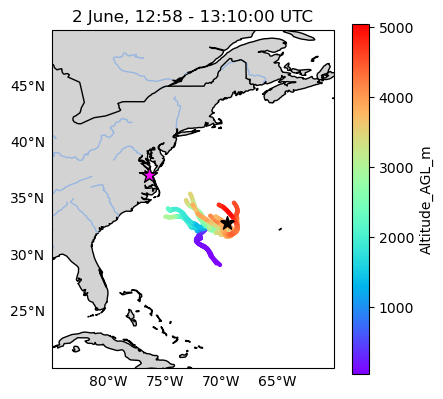

In [107]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all2a_subset['Longitude'], traj_all2a_subset['Latitude'], c=traj_all2a_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all2a_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('2 June, 12:58 - 13:10:00 UTC')

# Show the map
plt.show()

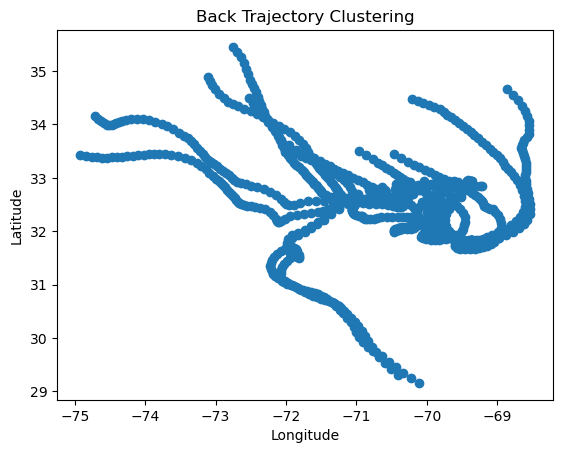

In [108]:
plt.scatter(traj_all2a_subset['Longitude'], traj_all2a_subset['Latitude'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Back Trajectory Clustering')
plt.show()

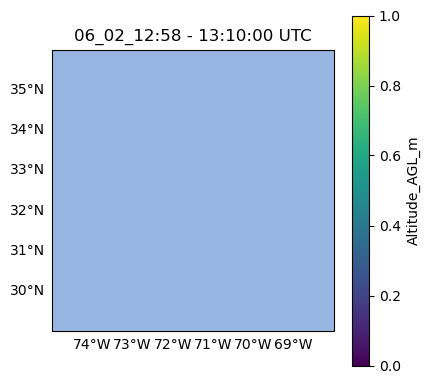

In [109]:

# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-75, -68, 29, 36], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all2a_subset['Timestep'], traj_all2a_subset['Altitude_AGL_m'], c=traj_all2a_subset['rain'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
sc = ax.scatter(traj_all2a_subset['Altitude_AGL_m'], traj_all2a_subset['rain'])
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all2a_subset.iloc[0]
#ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
# Set the title of the map
ax.set_title('06_02_12:58 - 13:10:00 UTC')

# Show the map
plt.show()

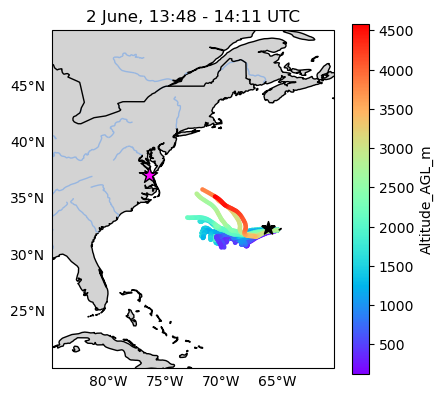

In [110]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all2_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('2 June, 13:48 - 14:11 UTC')

# Show the map
plt.show()


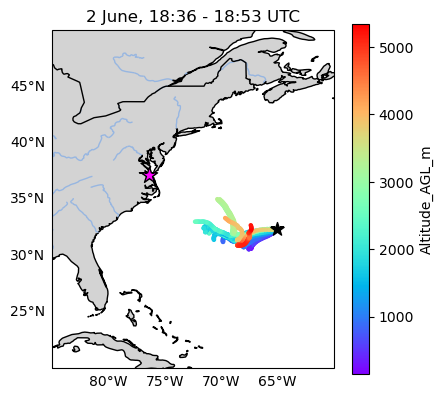

In [111]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all2b_subset['Longitude'], traj_all2b_subset['Latitude'], c=traj_all2b_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all2b_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')

# Set the title of the map
ax.set_title('2 June, 18:36 - 18:53 UTC')

# Show the map
plt.show()

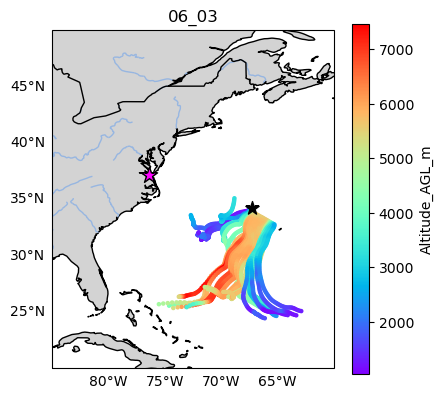

In [112]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all3_subset['Longitude'], traj_all3_subset['Latitude'], c=traj_all3_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all3_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('06_03')

# Show the map
plt.show()

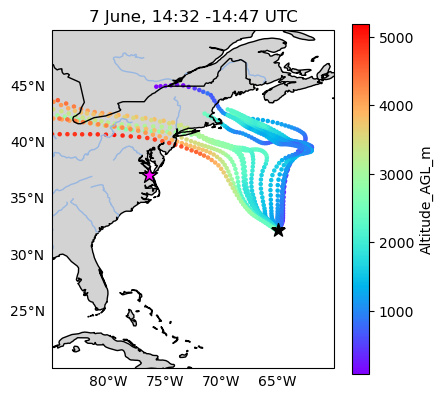

In [113]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all7_subset['Longitude'], traj_all7_subset['Latitude'], c=traj_all7_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all7_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')

# Set the title of the map
ax.set_title('7 June, 14:32 -14:47 UTC')

# Show the map
plt.show()

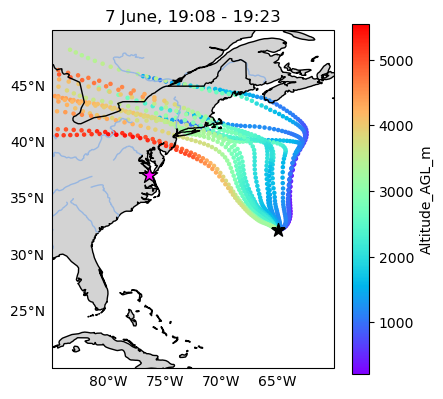

In [114]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all7b_subset['Longitude'], traj_all7b_subset['Latitude'], c=traj_all7b_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all7b_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('7 June, 19:08 - 19:23')

# Show the map
plt.show()

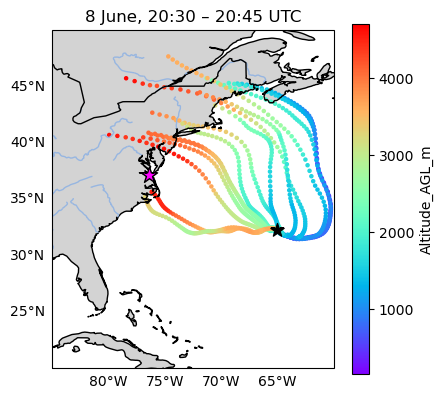

In [115]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all8_subset['Longitude'], traj_all8_subset['Latitude'], c=traj_all8_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all8_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('8 June, 20:30 – 20:45 UTC')

# Show the map
plt.show()

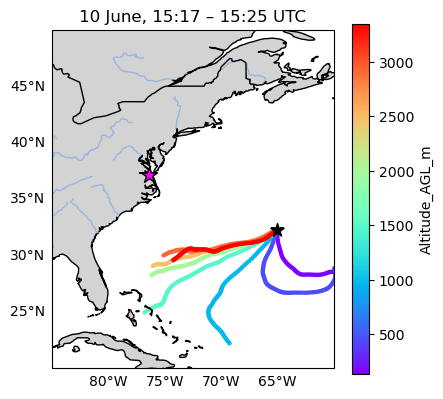

In [116]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all10_subset['Longitude'], traj_all10_subset['Latitude'], c=traj_all10_subset['Launch_Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all10_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('10 June, 15:17 – 15:25 UTC')

# Show the map
plt.show()

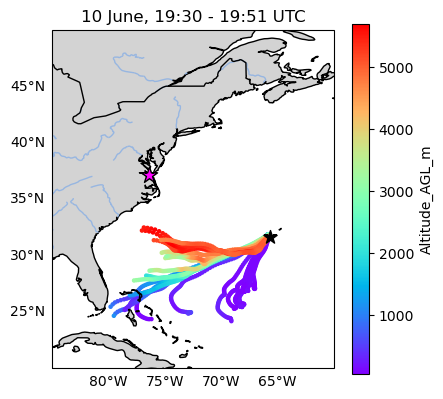

In [117]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all110b_subset['Longitude'], traj_all110b_subset['Latitude'], c=traj_all110b_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all110b_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
# Set the title of the map
ax.set_title('10 June, 19:30 - 19:51 UTC')
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Show the map
plt.show()

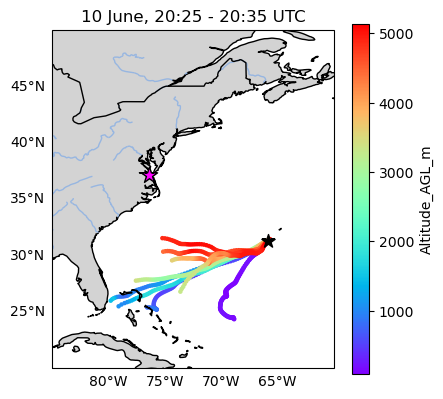

In [118]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all10b_subset['Longitude'], traj_all10b_subset['Latitude'], c=traj_all10b_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all10b_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('10 June, 20:25 - 20:35 UTC')

# Show the map
plt.show()

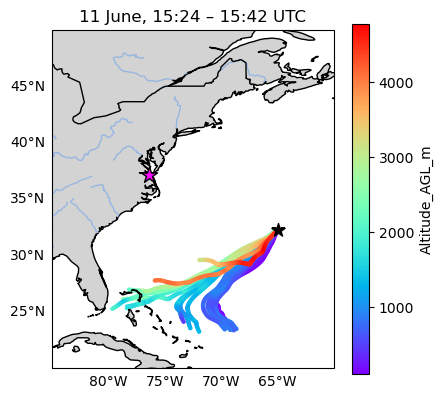

In [119]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all11_subset['Longitude'], traj_all11_subset['Latitude'], c=traj_all11_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all11_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('11 June, 15:24 – 15:42 UTC')

# Show the map
plt.show()

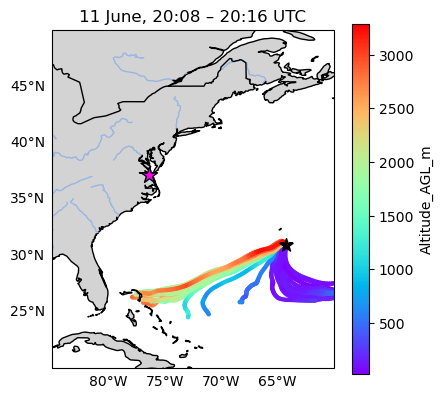

In [120]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all11b_subset['Longitude'], traj_all11b_subset['Latitude'], c=traj_all11b_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all11b_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('11 June, 20:08 – 20:16 UTC')

# Show the map
plt.show()

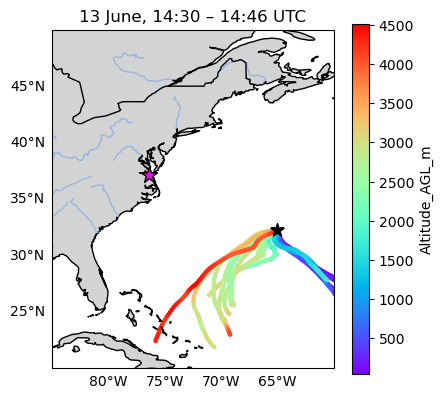

In [121]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all13_subset['Longitude'], traj_all13_subset['Latitude'], c=traj_all13_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all13_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('13 June, 14:30 – 14:46 UTC')

# Show the map
plt.show()

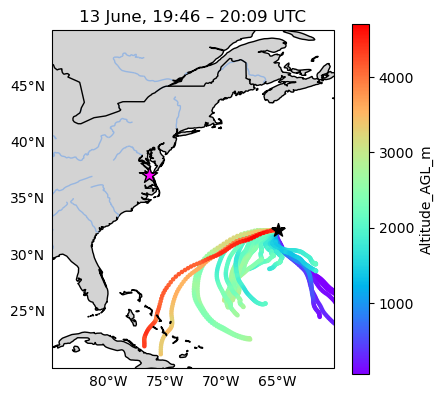

In [122]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all13b_subset['Longitude'], traj_all13b_subset['Latitude'], c=traj_all13b_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all13b_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('13 June, 19:46 – 20:09 UTC')

# Show the map
plt.show()

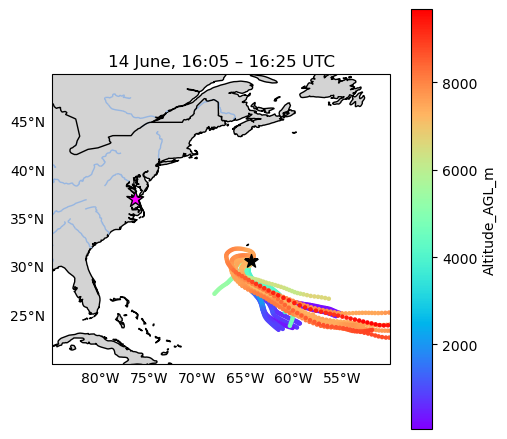

In [123]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -50, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all14_subset['Longitude'], traj_all14_subset['Latitude'], c=traj_all14_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all14_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('14 June, 16:05 – 16:25 UTC')

# Show the map
plt.show()

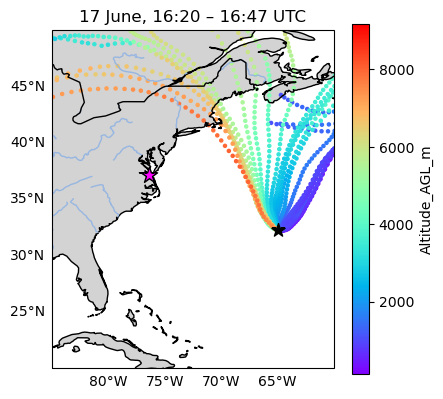

In [124]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all17_subset['Longitude'], traj_all17_subset['Latitude'], c=traj_all17_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all17_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
nasa_langley_latitude = 37.0985
nasa_langley_longitude = -76.3869
ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder = 35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
# Set the title of the map
ax.set_title('17 June, 16:20 – 16:47 UTC')

# Show the map
plt.show()

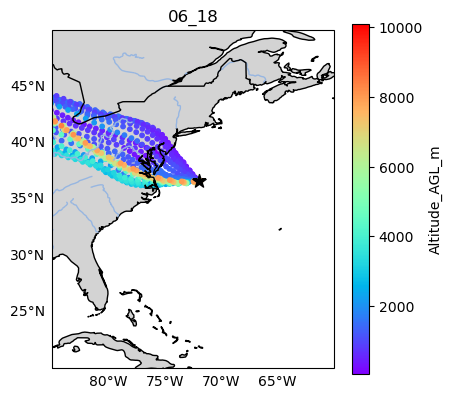

In [125]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(traj_all18_subset['Longitude'], traj_all18_subset['Latitude'], c=traj_all18_subset['Altitude_AGL_m'], cmap='rainbow', s=10, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Altitude_AGL_m')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
single_point = traj_all18_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())

# Set the title of the map
ax.set_title('06_18')


# Show the map
plt.show()

In [126]:
'''# Create the density plot
plt.scatter(traj_all18_subset['Timestep'], traj_all18_subset['Altitude_AGL_m'], c=traj_all18_subset['Altitude_AGL_m'], cmap='rainbow')

# Set the labels and title
plt.xlabel('Time Step')
plt.ylabel('Altitude')
plt.title('Density Plot of Altitude vs. Time Step')

# Add a color bar
#cbar = plt.colorbar()
#cbar.set_label('Altitude')

# Show the plot
plt.show()'''


"# Create the density plot\nplt.scatter(traj_all18_subset['Timestep'], traj_all18_subset['Altitude_AGL_m'], c=traj_all18_subset['Altitude_AGL_m'], cmap='rainbow')\n\n# Set the labels and title\nplt.xlabel('Time Step')\nplt.ylabel('Altitude')\nplt.title('Density Plot of Altitude vs. Time Step')\n\n# Add a color bar\n#cbar = plt.colorbar()\n#cbar.set_label('Altitude')\n\n# Show the plot\nplt.show()"

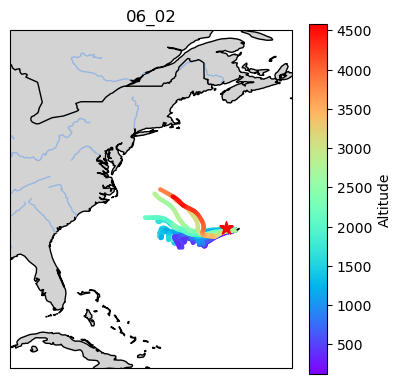

In [127]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
sc = ax.scatter(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())

# Add a colorbar with label
cbar = plt.colorbar(sc)
cbar.set_label('Altitude')

# Add a star marker for a single point
single_point = traj_all2_subset.iloc[0]
ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='red', s=100, transform=ccrs.PlateCarree())

# Set the title of the map
ax.set_title('06_02')

# Show the map
plt.show()


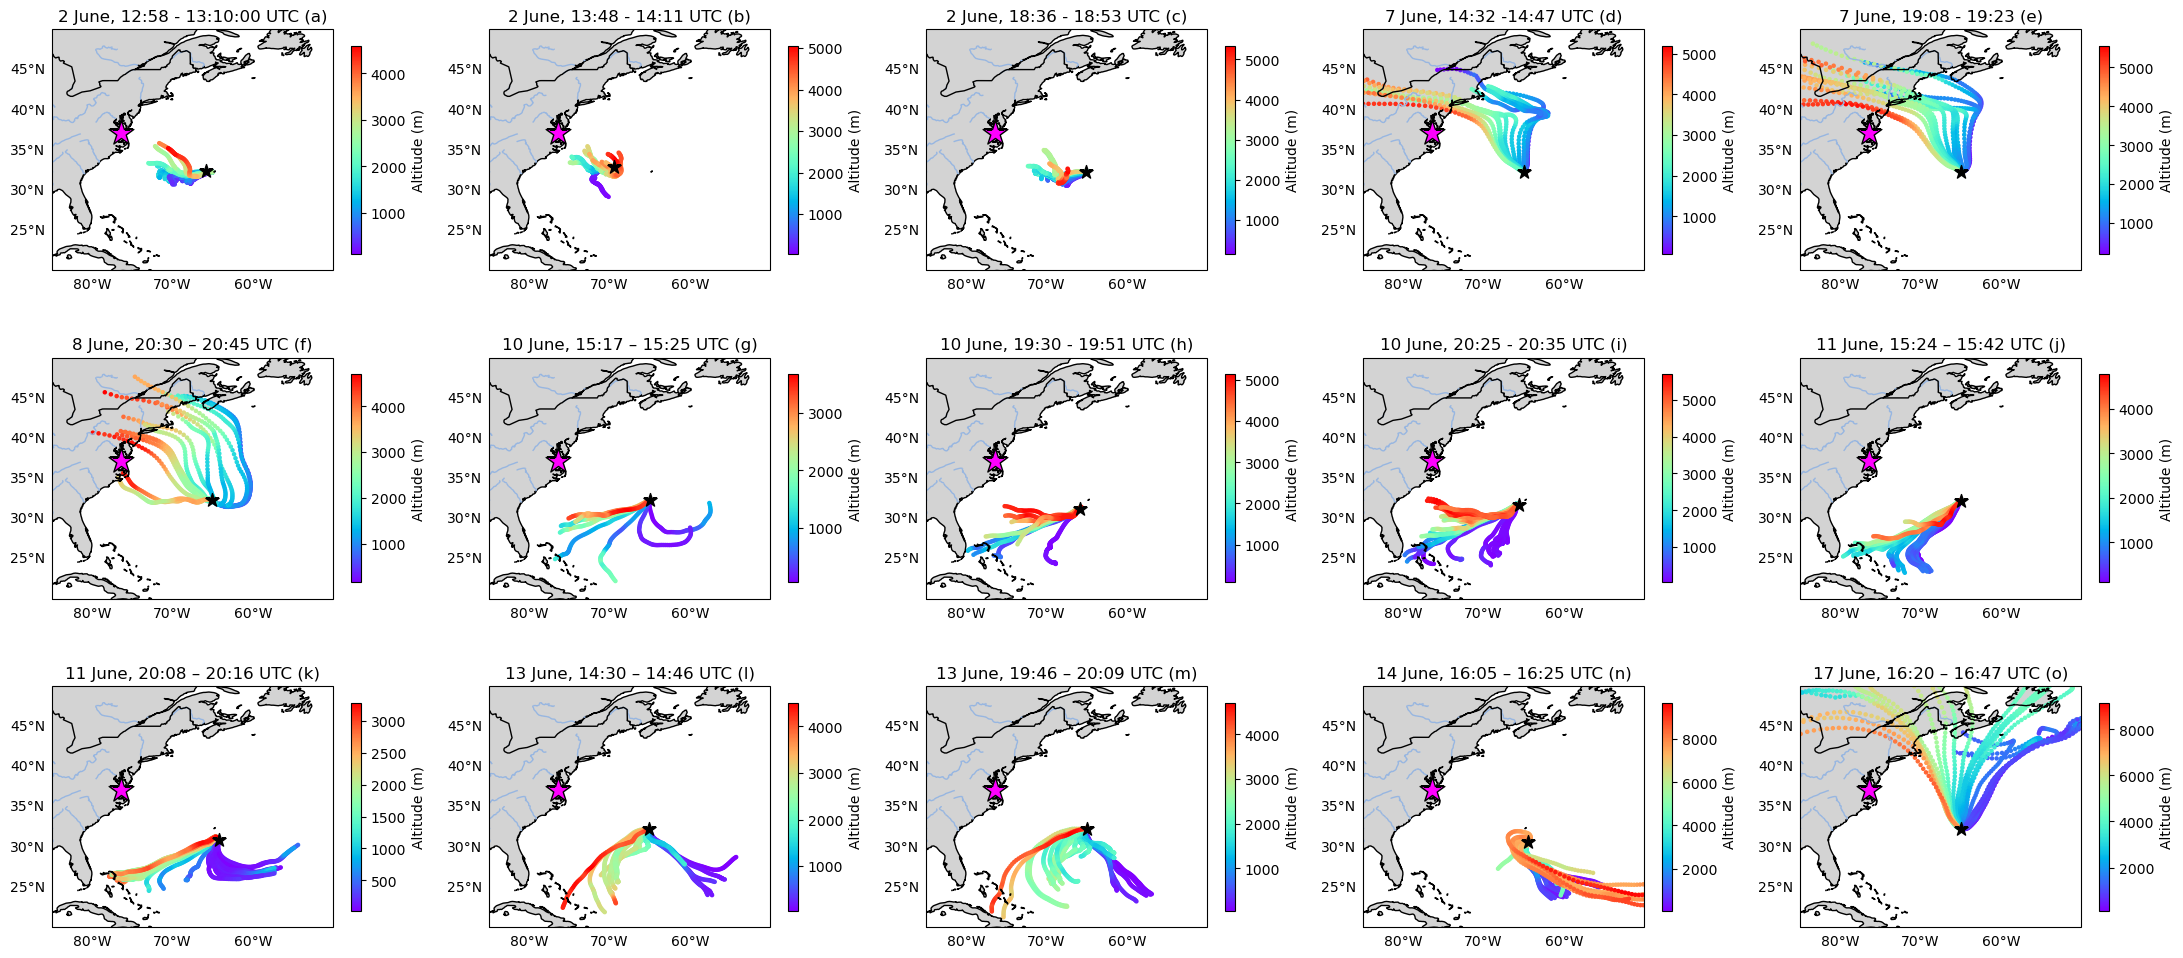

In [128]:
# Define the data and titles for each subplot
subplot_data = [
    (traj_all2_subset, '2 June, 12:58 - 13:10:00 UTC', 'a'),
    (traj_all2a_subset, '2 June, 13:48 - 14:11 UTC', 'b'),
    (traj_all2b_subset, '2 June, 18:36 - 18:53 UTC', 'c'),
    (traj_all7_subset, '7 June, 14:32 -14:47 UTC', 'd'),
    (traj_all7b_subset, '7 June, 19:08 - 19:23', 'e'),
    (traj_all8_subset, '8 June, 20:30 – 20:45 UTC', 'f'),
    (traj_all10_subset, '10 June, 15:17 – 15:25 UTC', 'g'),
    (traj_all10b_subset, '10 June, 19:30 - 19:51 UTC', 'h'),
    (traj_all110b_subset, '10 June, 20:25 - 20:35 UTC', 'i'),
    (traj_all11_subset, '11 June, 15:24 – 15:42 UTC', 'j'),
    (traj_all11b_subset, '11 June, 20:08 – 20:16 UTC', 'k'),
    (traj_all13_subset, '13 June, 14:30 – 14:46 UTC', 'l'),
    (traj_all13b_subset, '13 June, 19:46 – 20:09 UTC', 'm'),
    (traj_all14_subset, '14 June, 16:05 – 16:25 UTC', 'n'),
    (traj_all17_subset, '17 June, 16:20 – 16:47 UTC', 'o')
]

# Create a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the 3x5 grid of axes for easy indexing
axes = axes.flatten()

# Loop through the data and titles, and create subplots
for ax, (data, title, label) in zip(axes, subplot_data):
    # Customize the map projection and extent
    ax.set_extent([-85, -50, 20, 50], crs=ccrs.PlateCarree())
    ax.coastlines()
    
    # Add additional map features
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    
    # Optionally, plot data or markers on the map
    sc = ax.scatter(data['Longitude'], data['Latitude'], c=data['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(sc, ax=ax, shrink=0.7)
    cbar.set_label('Altitude (m)')
    
    # Set gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    
    # Add a star marker for a single point
    single_point = data.iloc[0]
    ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
    
    nasa_langley_latitude = 37.0985
    nasa_langley_longitude = -76.3869
    ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder=35, s=350, transform=ccrs.PlateCarree(), label='NASA Langley Station')
    
    # Set the title of the subplot
    ax.set_title(f'{title} ({label})')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


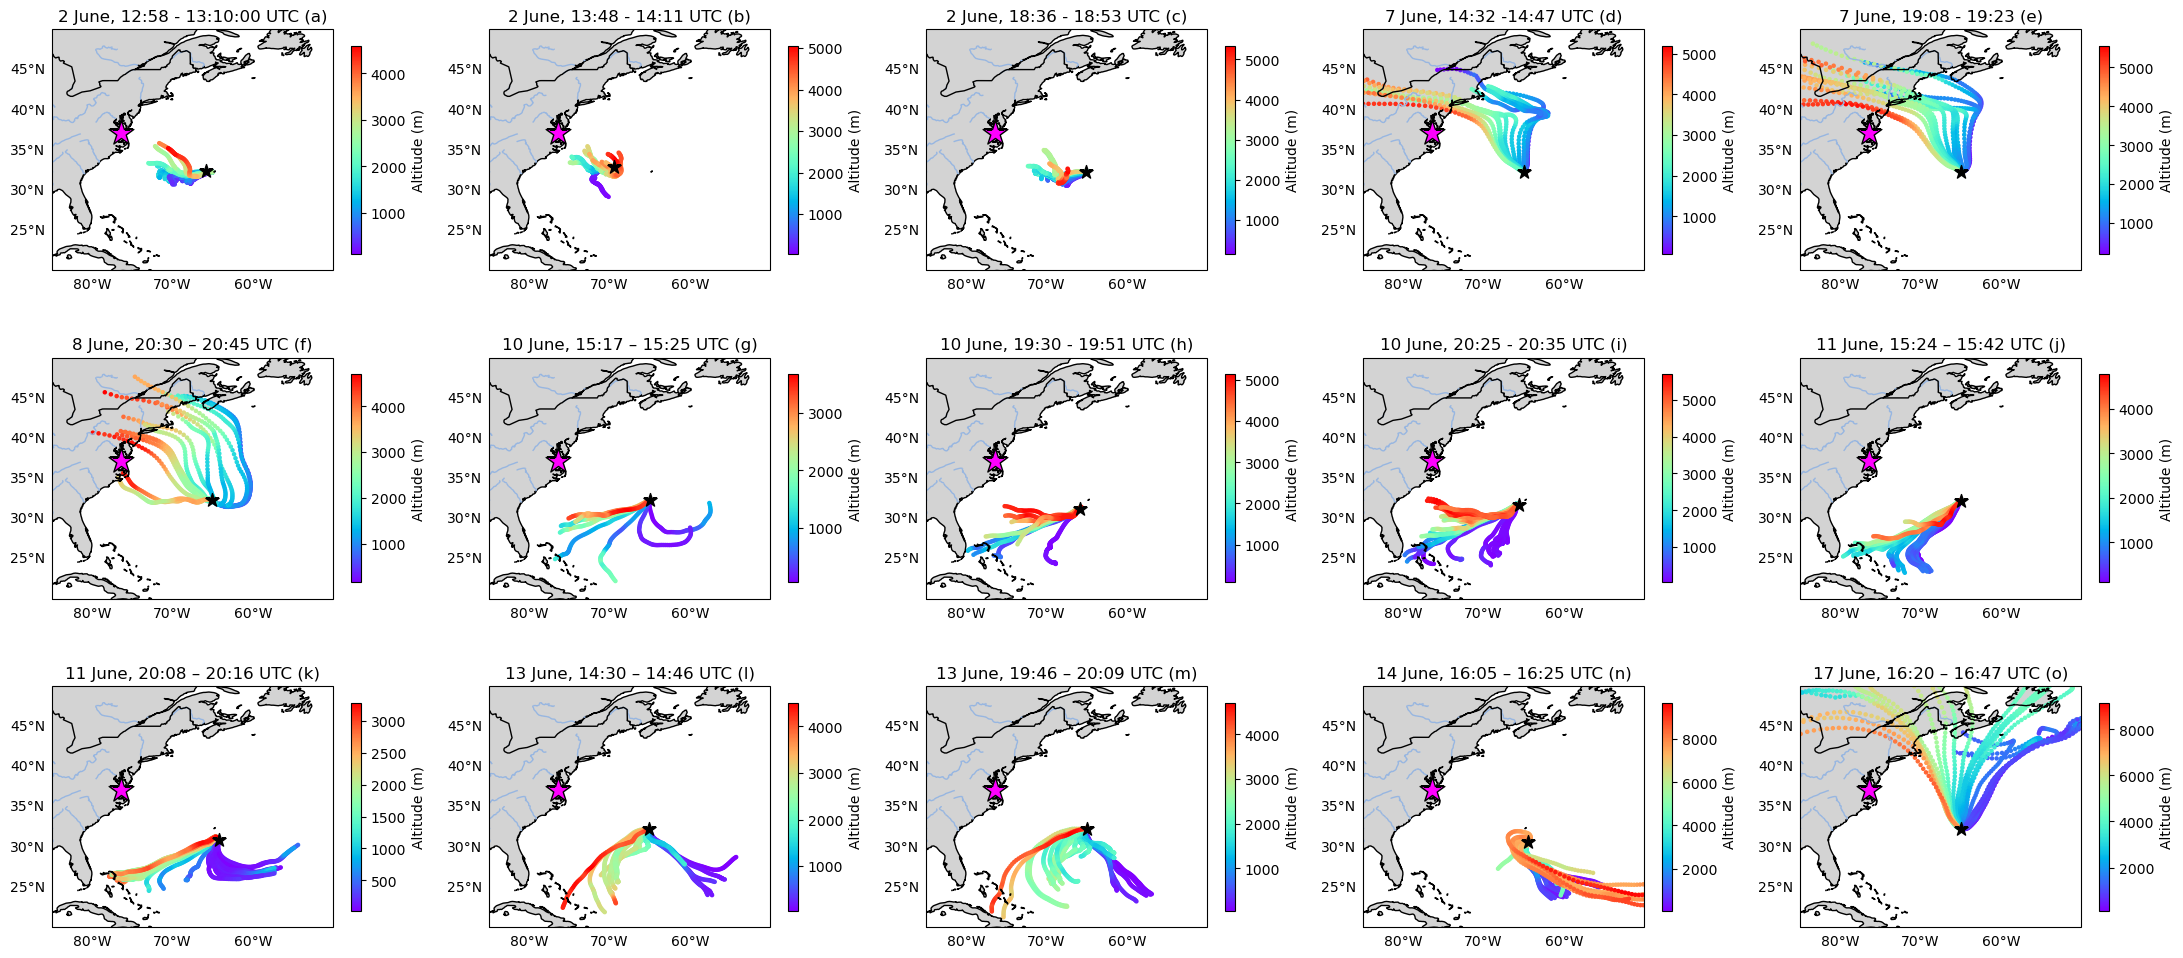

In [129]:
from matplotlib.transforms import ScaledTranslation
# Define the data and titles for each subplot
subplot_data = [
    (traj_all2_subset, '2 June, 12:58 - 13:10:00 UTC', 'a'),
    (traj_all2a_subset, '2 June, 13:48 - 14:11 UTC', 'b'),
    (traj_all2b_subset, '2 June, 18:36 - 18:53 UTC', 'c'),
    (traj_all7_subset, '7 June, 14:32 -14:47 UTC', 'd'),
    (traj_all7b_subset, '7 June, 19:08 - 19:23', 'e'),
    (traj_all8_subset, '8 June, 20:30 – 20:45 UTC', 'f'),
    (traj_all10_subset, '10 June, 15:17 – 15:25 UTC', 'g'),
    (traj_all10b_subset, '10 June, 19:30 - 19:51 UTC', 'h'),
    (traj_all110b_subset, '10 June, 20:25 - 20:35 UTC', 'i'),
    (traj_all11_subset, '11 June, 15:24 – 15:42 UTC', 'j'),
    (traj_all11b_subset, '11 June, 20:08 – 20:16 UTC', 'k'),
    (traj_all13_subset, '13 June, 14:30 – 14:46 UTC', 'l'),
    (traj_all13b_subset, '13 June, 19:46 – 20:09 UTC', 'm'),
    (traj_all14_subset, '14 June, 16:05 – 16:25 UTC', 'n'),
    (traj_all17_subset, '17 June, 16:20 – 16:47 UTC', 'o')
]

# Create a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the 3x5 grid of axes for easy indexing
axes = axes.flatten()

# Loop through the data and titles, and create subplots
for ax, (data, title, label) in zip(axes, subplot_data):
    # Customize the map projection and extent
    ax.set_extent([-85, -50, 20, 50], crs=ccrs.PlateCarree())
    ax.coastlines()
    
    # Add additional map features
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    
    # Optionally, plot data or markers on the map
    sc = ax.scatter(data['Longitude'], data['Latitude'], c=data['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(sc, ax=ax, shrink=0.7)
    cbar.set_label('Altitude (m)')
    
    # Set gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    
    # Add a star marker for a single point
    single_point = data.iloc[0]
    ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
    
    nasa_langley_latitude = 37.0985
    nasa_langley_longitude = -76.3869
    ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder=35, s=350, transform=ccrs.PlateCarree(), label='NASA Langley Station')
    
    # Set the title of the subplot
    ax.set_title(f'{title} ({label})')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


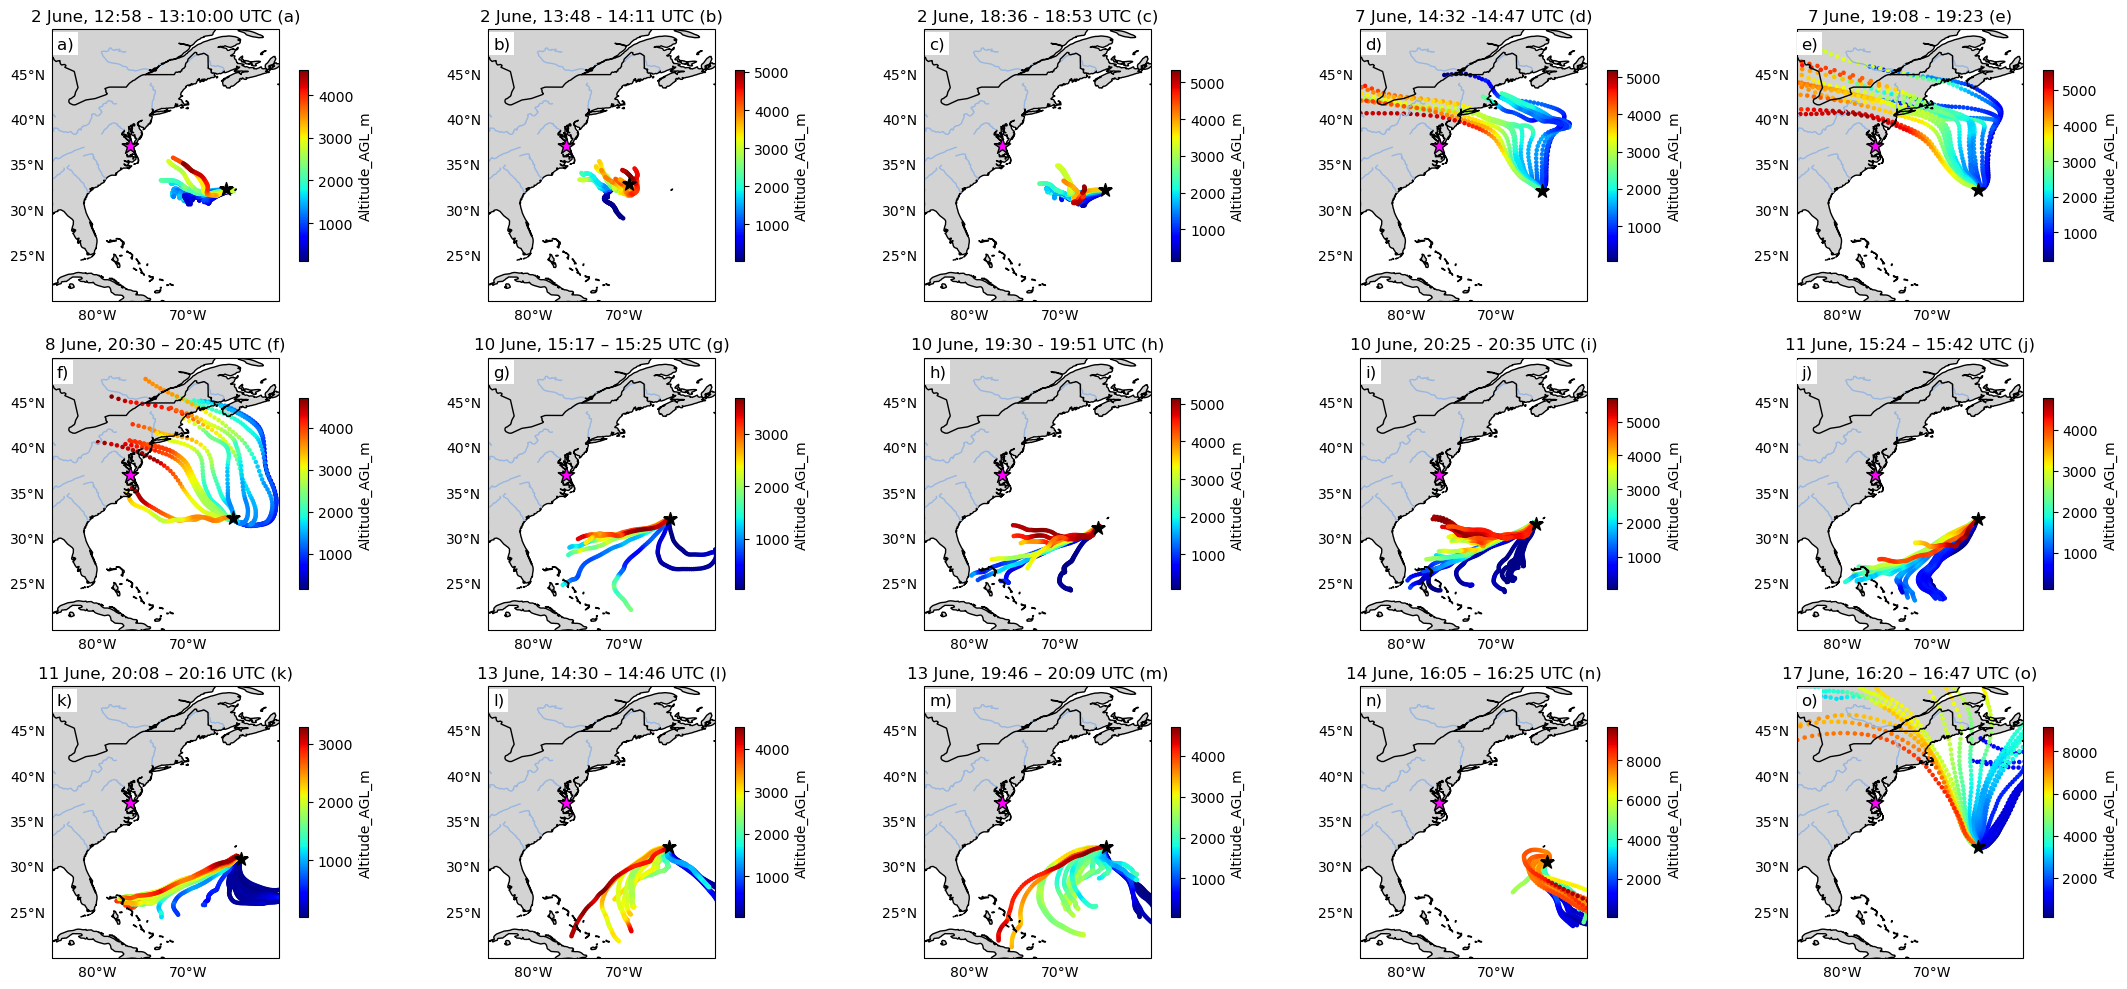

In [130]:
from matplotlib.transforms import ScaledTranslation

# Define the data and titles for each subplot
subplot_data = [
    (traj_all2_subset, '2 June, 12:58 - 13:10:00 UTC', 'a'),
    (traj_all2a_subset, '2 June, 13:48 - 14:11 UTC', 'b'),
    (traj_all2b_subset, '2 June, 18:36 - 18:53 UTC', 'c'),
    (traj_all7_subset, '7 June, 14:32 -14:47 UTC', 'd'),
    (traj_all7b_subset, '7 June, 19:08 - 19:23', 'e'),
    (traj_all8_subset, '8 June, 20:30 – 20:45 UTC', 'f'),
    (traj_all10_subset, '10 June, 15:17 – 15:25 UTC', 'g'),
    (traj_all10b_subset, '10 June, 19:30 - 19:51 UTC', 'h'),
    (traj_all110b_subset, '10 June, 20:25 - 20:35 UTC', 'i'),
    (traj_all11_subset, '11 June, 15:24 – 15:42 UTC', 'j'),
    (traj_all11b_subset, '11 June, 20:08 – 20:16 UTC', 'k'),
    (traj_all13_subset, '13 June, 14:30 – 14:46 UTC', 'l'),
    (traj_all13b_subset, '13 June, 19:46 – 20:09 UTC', 'm'),
    (traj_all14_subset, '14 June, 16:05 – 16:25 UTC', 'n'),
    (traj_all17_subset, '17 June, 16:20 – 16:47 UTC', 'o')
]

# Create a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the 3x5 grid of axes for easy indexing
axes = axes.flatten()

# Loop through the data and titles, and create subplots
for i, (data, title, label) in enumerate(subplot_data):
    # Customize the map projection and extent
    ax = axes[i]
    ax.set_extent([-85, -60, 20, 50], crs=ccrs.PlateCarree())
    ax.coastlines()
    
    # Add additional map features
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    
    # Optionally, plot data or markers on the map
    sc = ax.scatter(data['Longitude'], data['Latitude'], c=data['Altitude_AGL_m'], cmap='jet', s=5, transform=ccrs.PlateCarree())
    
    # Create a colorbar with a reduced height
    cbar = plt.colorbar(sc, ax=ax, shrink=0.7)
    cbar.set_label('Altitude_AGL_m')
    
    # Set gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    
    # Add a star marker for a single point
    single_point = data.iloc[0]
    ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
    
    nasa_langley_latitude = 37.0985
    nasa_langley_longitude = -76.3869
    ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder=35, s=150, transform=ccrs.PlateCarree(), label='NASA Langley Station')
    
    # Set the title of the subplot
    ax.set_title(f'{title} ({label})')

# Add labels 'a' to 'o' to the subplots
labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)']
for i, ax in enumerate(axes):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax.text(
        -0.04, 1, labels[i],
        transform=ax.transAxes + trans,
        fontsize='large', verticalalignment='top',
        bbox=dict(facecolor='1', edgecolor='none', pad=3.0)
    )

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


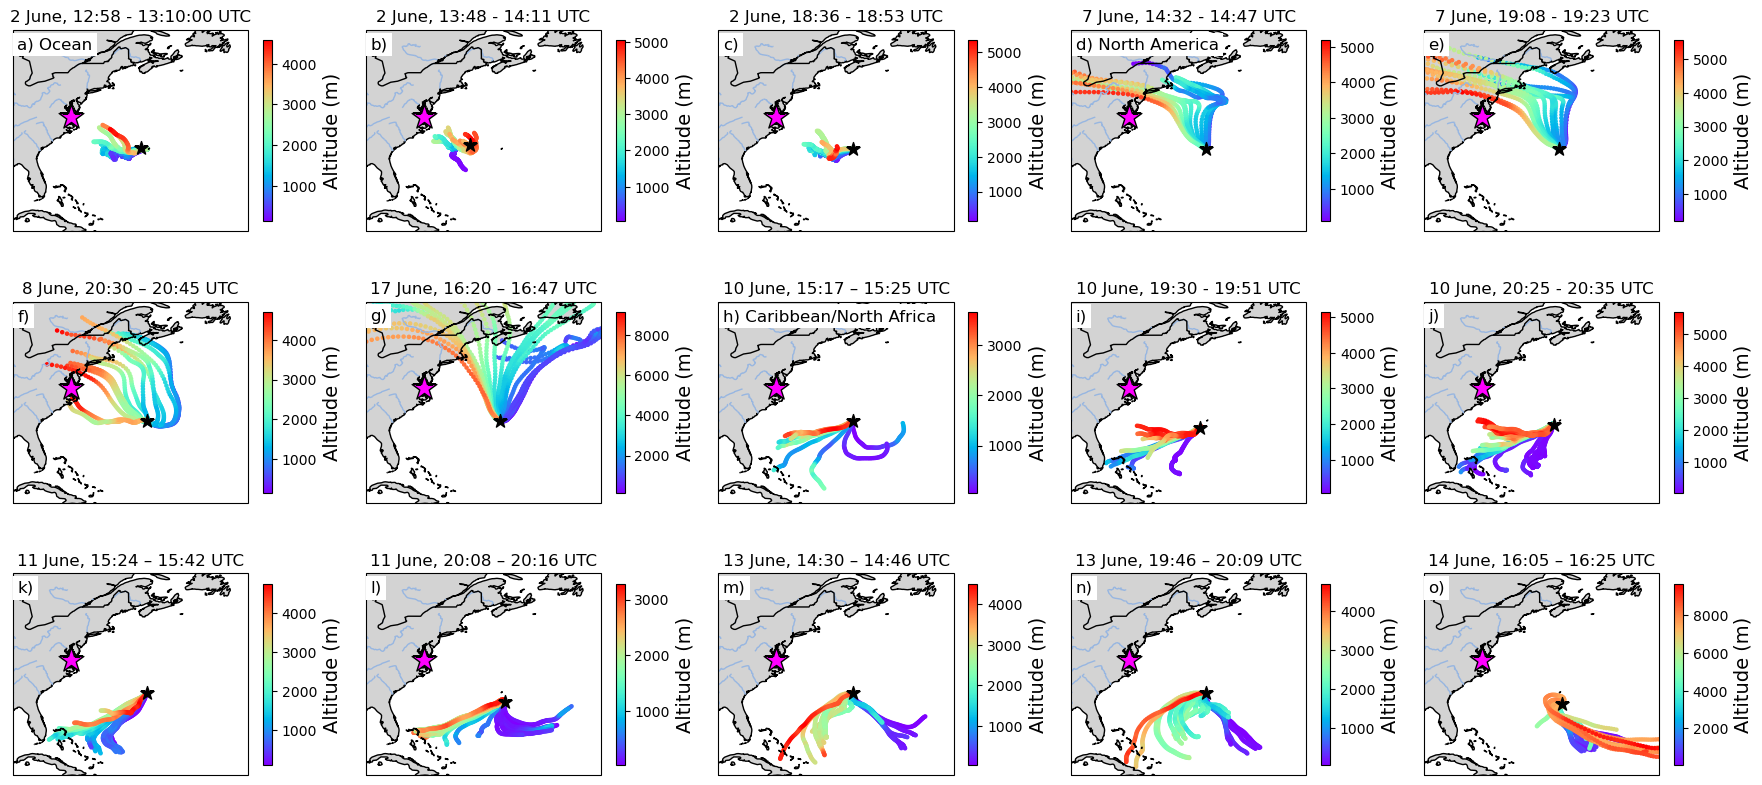

In [162]:
# Create a figure with 3 rows and 5 columns of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 10), subplot_kw={'projection': ccrs.PlateCarree()})
#fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Data for your subplots (replace with your actual data)
subplots_data = [
    (traj_all2_subset, '2 June, 12:58 - 13:10:00 UTC'),
    (traj_all2a_subset, '2 June, 13:48 - 14:11 UTC'),
    (traj_all2b_subset, '2 June, 18:36 - 18:53 UTC'),
    (traj_all7_subset, '7 June, 14:32 - 14:47 UTC'),
    (traj_all7b_subset, '7 June, 19:08 - 19:23 UTC'),
    (traj_all8_subset, '8 June, 20:30 – 20:45 UTC'),
    (traj_all17_subset, '17 June, 16:20 – 16:47 UTC'),
    (traj_all10_subset, '10 June, 15:17 – 15:25 UTC'),
    (traj_all10b_subset, '10 June, 19:30 - 19:51 UTC'),
    (traj_all110b_subset, '10 June, 20:25 - 20:35 UTC'),
    (traj_all11_subset, '11 June, 15:24 – 15:42 UTC'),
    (traj_all11b_subset, '11 June, 20:08 – 20:16 UTC'),
    (traj_all13_subset, '13 June, 14:30 – 14:46 UTC'),
    (traj_all13b_subset, '13 June, 19:46 – 20:09 UTC'),
    (traj_all14_subset, '14 June, 16:05 – 16:25 UTC')
]

# Labels for subplots
labels = ['a) Ocean', 'b)', 'c)', 'd) North America', 'e)', 'f)', 'g)', 'h) Caribbean/North Africa', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)']

# Loop through subplots data and create each subplot
for i, (subset, title) in enumerate(subplots_data):
    row = i // 5  # Determine the row for the subplot
    col = i % 5   # Determine the column for the subplot
    
    ax = axes[row, col]  # Get the current subplot
    
    # Customize the map projection and extent
    ax.set_extent([-85, -50, 20, 50], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    # Plot data or markers on the map (replace with your data)
    sc = ax.scatter(subset['Longitude'], subset['Latitude'], c=subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
        # Create a colorbar with a reduced height
    cbar = plt.colorbar(sc, ax=ax, shrink=0.8)
    cbar.set_label('Altitude (m)', fontsize = 14)
    #cbar.ax.tick_params(labelsize=14)
    
    # Add a star marker for a single point (replace with your data)
    single_point = subset.iloc[0]
    ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
    
    # Add a marker for NASA Langley Station (replace with your data)
    nasa_langley_latitude = 37.0985
    nasa_langley_longitude = -76.3869
    ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder=35, s=350, transform=ccrs.PlateCarree(), label='NASA Langley Station')
    
    # Set the title of the map
    ax.set_title(title)
    
    # Add labels to subplots
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax.text(
        -0.04, 1, labels[i],
        transform=ax.transAxes + trans,
        fontsize='large', verticalalignment='top',
        bbox=dict(facecolor='1', edgecolor='none', pad=3.0))

# Show the entire plot
plt.show()


In [132]:
traj_all

Timestep          Launch_UTC  Latitude  Longitude  Launch_Altitude_AGL_m   
0        0.0 2022-06-02 11:23:00    32.437    -64.956                 1531.6  \
1       -0.4 2022-06-02 11:23:00    32.442    -65.065                 1531.6   
2       -1.4 2022-06-02 11:23:00    32.440    -65.350                 1531.6   
3       -2.4 2022-06-02 11:23:00    32.426    -65.638                 1531.6   
4       -3.4 2022-06-02 11:23:00    32.403    -65.924                 1531.6   
..       ...                 ...       ...        ...                    ...   
68     -67.4 2022-06-18 15:23:00    55.507   -100.548                   25.4   
69     -68.4 2022-06-18 15:23:00    55.378   -100.447                   25.4   
70     -69.4 2022-06-18 15:23:00    55.171   -100.353                   25.4   
71     -70.4 2022-06-18 15:23:00    54.916   -100.291                   25.4   
72     -71.4 2022-06-18 15:23:00    54.612   -100.313                   25.4   

    Altitude_AGL_m  Pressure_mb   tpot   tamb  rain    mixd  relh  sphumixr   
0           1531.6        848.7  300.8  287.0   0.0   646.9  71.6       NaN  \
1           1501.1        851.7  300.7  287.2   0.0   643.6  72.6       NaN   
2           1404.4        861.6  300.3  287.8   0.1   702.5  70.7       NaN   
3           1305.4        869.9  299.9  288.2   0.2   739.0  72.8       NaN   
4           1203.6        883.7  299.3  288.9   0.0   748.6  74.6       NaN   
..             ...          ...    ...    ...   ...     ...   ...       ...   
68          1850.9        769.0  296.3  274.9   1.0  1486.8  94.4       NaN   
69          1826.7        768.7  296.0  274.6   0.9  1808.9  93.8       NaN   
70          1789.2        768.2  296.0  274.5   0.0  2381.5  90.4       NaN   
71          1799.9        772.4  296.2  275.1   0.0  1840.1  81.9       NaN   
72          1894.6        763.6  296.5  274.5   0.0  1095.1  71.2       NaN   

     dswf   terr  
0     0.0   79.4  
1     0.0   66.7  
2     0.0   33.2  
3     0.0    0.0  
4     0.0    0.0  
..    ...    ...  
68  311.4  459.9  
69  311.4  462.0  
70  311.4  504.6  
71  302.4  471.5  
72  283.0  418.6  

[227687 rows x 15 columns]

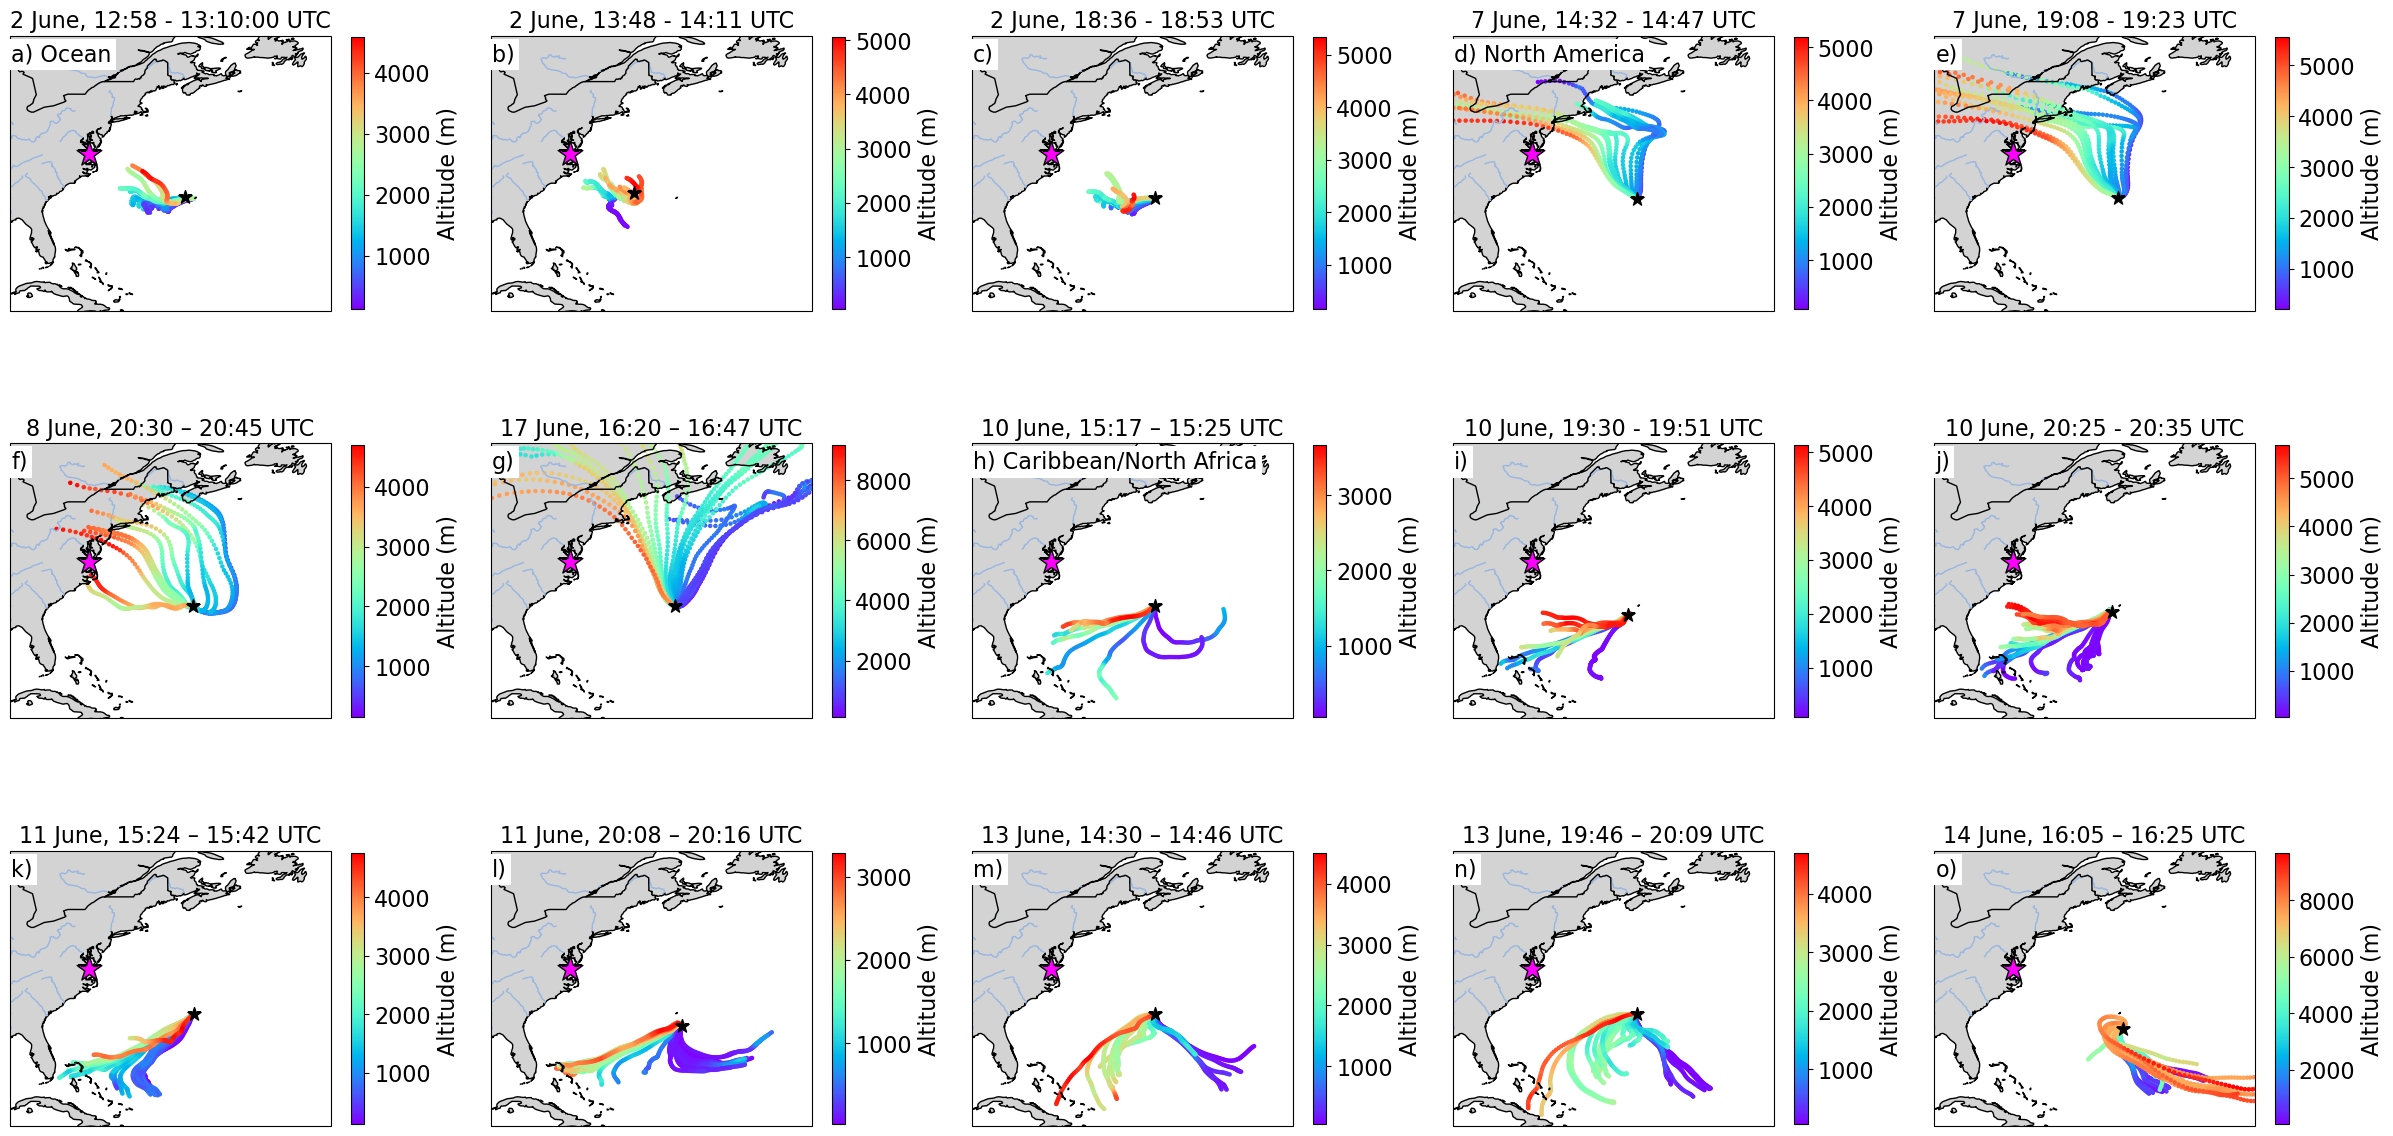

In [165]:
# Create a figure with 3 rows and 5 columns of subplots
fig, axes = plt.subplots(3, 5, figsize=(30, 15), subplot_kw={'projection': ccrs.PlateCarree()})
#fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Data for your subplots (replace with your actual data)
subplots_data = [
    (traj_all2_subset, '2 June, 12:58 - 13:10:00 UTC'),
    (traj_all2a_subset, '2 June, 13:48 - 14:11 UTC'),
    (traj_all2b_subset, '2 June, 18:36 - 18:53 UTC'),
    (traj_all7_subset, '7 June, 14:32 - 14:47 UTC'),
    (traj_all7b_subset, '7 June, 19:08 - 19:23 UTC'),
    (traj_all8_subset, '8 June, 20:30 – 20:45 UTC'),
    (traj_all17_subset, '17 June, 16:20 – 16:47 UTC'),
    (traj_all10_subset, '10 June, 15:17 – 15:25 UTC'),
    (traj_all10b_subset, '10 June, 19:30 - 19:51 UTC'),
    (traj_all110b_subset, '10 June, 20:25 - 20:35 UTC'),
    (traj_all11_subset, '11 June, 15:24 – 15:42 UTC'),
    (traj_all11b_subset, '11 June, 20:08 – 20:16 UTC'),
    (traj_all13_subset, '13 June, 14:30 – 14:46 UTC'),
    (traj_all13b_subset, '13 June, 19:46 – 20:09 UTC'),
    (traj_all14_subset, '14 June, 16:05 – 16:25 UTC')
]

# Labels for subplots
labels = ['a) Ocean', 'b)', 'c)', 'd) North America', 'e)', 'f)', 'g)', 'h) Caribbean/North Africa', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)']

# Loop through subplots data and create each subplot
for i, (subset, title) in enumerate(subplots_data):
    row = i // 5  # Determine the row for the subplot
    col = i % 5   # Determine the column for the subplot
    
    ax = axes[row, col]  # Get the current subplot
    
    # Customize the map projection and extent
    ax.set_extent([-85, -50, 20, 50], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    # Plot data or markers on the map (replace with your data)
    sc = ax.scatter(subset['Longitude'], subset['Latitude'], c=subset['Altitude_AGL_m'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
        # Create a colorbar with a reduced height
    cbar = plt.colorbar(sc, ax=ax, shrink=0.8)
    cbar.set_label('Altitude (m)', fontsize = 16)
    cbar.ax.tick_params(labelsize=16)
    
    # Add a star marker for a single point (replace with your data)
    single_point = subset.iloc[0]
    ax.scatter(single_point['Longitude'], single_point['Latitude'], marker='*', color='black', s=100, transform=ccrs.PlateCarree())
    
    # Add a marker for NASA Langley Station (replace with your data)
    nasa_langley_latitude = 37.0985
    nasa_langley_longitude = -76.3869
    ax.scatter(nasa_langley_longitude, nasa_langley_latitude, marker='*', color='magenta', edgecolor='black', zorder=35, s=350, transform=ccrs.PlateCarree(), label='NASA Langley Station')
    
    # Set the title of the map
    ax.set_title(title, fontsize = 16)
    
    # Add labels to subplots
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax.text(
        -0.04, 1, labels[i],
        transform=ax.transAxes + trans,
        fontsize='16', verticalalignment='top',
        bbox=dict(facecolor='1', edgecolor='none', pad=3.0))

# Show the entire plot
plt.show()
